## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline


from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
# import machine learning and stats libraries:



import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from xgboost import XGBClassifier
from xgboost import plot_importance
# Import:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

## Exploratory data analysis

In [2]:
df = pd.read_csv(r"C:\Users\kandu\creditcard.csv\creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [85]:
df.shape

(284807, 30)

In [3]:
#observe the different feature type present in the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# check for nan values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [6]:
# lets see corelation and plot heatmap
corr = df.corr()
corr

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.124348  2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16   
V13    -0.065902 -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16   
V14    -0.098757 -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16   
V15    -0.183453  3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16   
V16     0.011903  7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16   
V17    -0.073297 -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16   
V18     0.090438  3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16   
V19     0.028975  1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16   
V20    -0.050866  4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16   
V21     0.044736 -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16   
V22     0.144059 -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17   
V23     0.051142  6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17   
V24    -0.016182 -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16   
V25    -0.233083 -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16   
V26    -0.041407 -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16   
V27    -0.005135  1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17   
V28    -0.009413  2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      1.812612e-17 -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16   
V2      5.157519e-16  2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17   
V3     -6.539009e-17  1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16   
V4     -1.719944e-15 -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16   
V5      1.000000e+00  2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16   
V6      2.408382e-16  1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16   
V7      2.715541e-16  1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15   
V8      7.437229e-16 -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16   
V9      7.391702e-16  4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00   
V10    -5.202306e-16  5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16   
V11     7.203963e-16  1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16   
V12     7.412552e-16  2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15   
V13     5.886991e-16 -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15   
V14     6.565143e-16  2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15   
V15    -8.720275e-16 -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15   
V16     2.246261e-15  2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15   
V17     1.281914e-16  2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15   
V18     5.308590e-16  1.223814e-16  7.604126e-17 -3.667974e

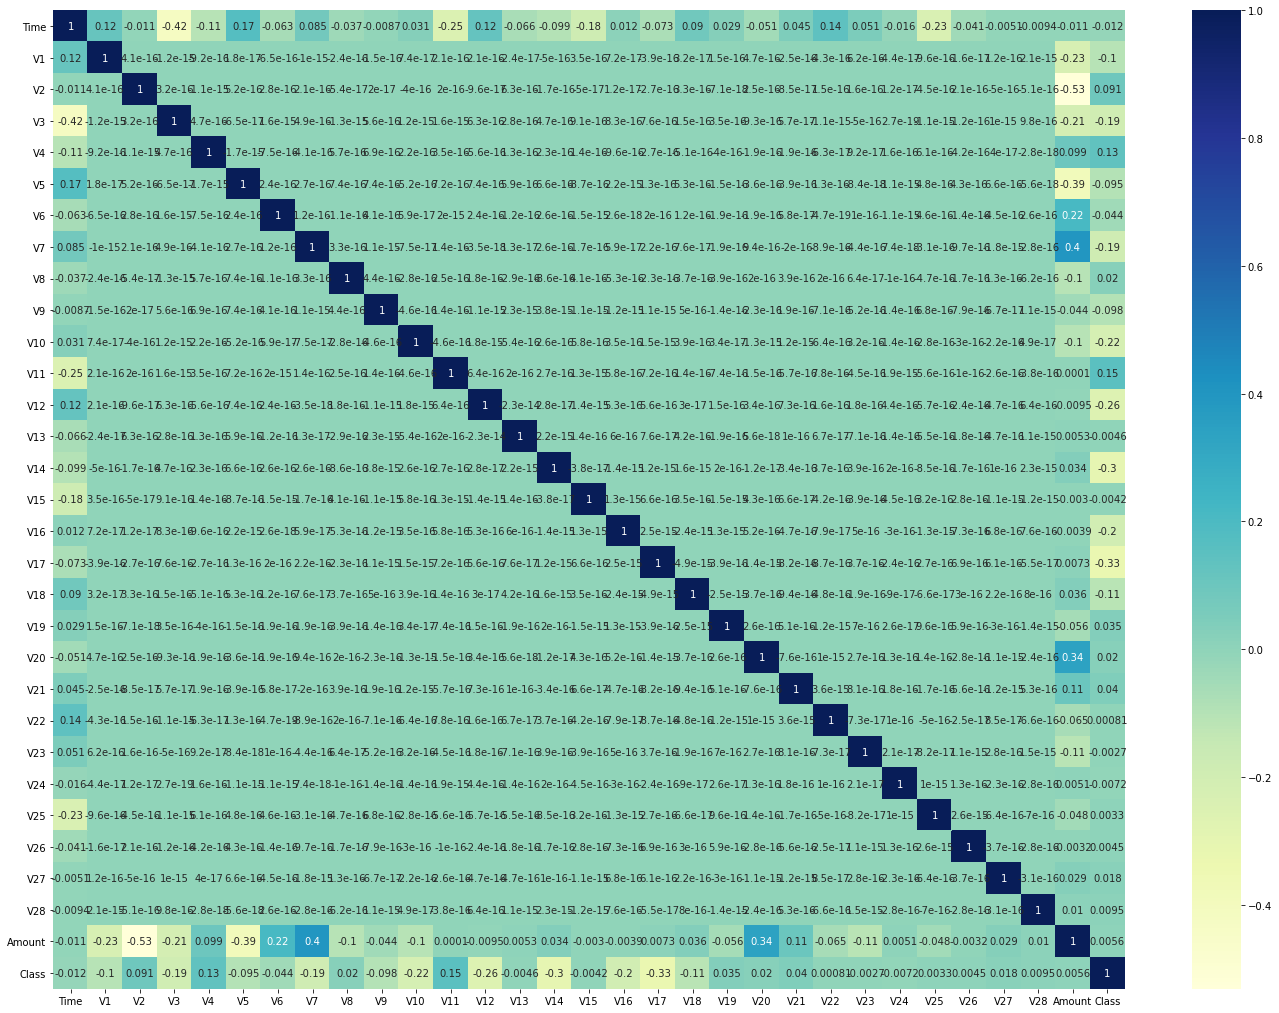

In [7]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

Here we will observe the distribution of our classes

In [8]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [9]:
classes

0    284315
1       492
Name: Class, dtype: int64

In [10]:
normal_share

99.82725143693798

In [11]:
fraud_share

0.1727485630620034

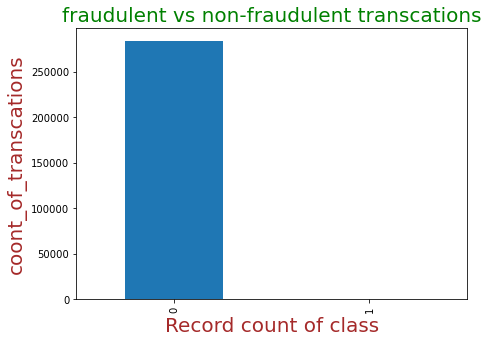

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
count_classes=pd.value_counts(df['Class'],sort = False)
plt.figure(figsize=(7,5))
count_classes.plot(kind='bar')
plt.title('fraudulent vs non-fraudulent transcations',fontdict={'fontsize':20,'fontweight':5,'color':'green'})
plt.ylabel('coont_of_transcations',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
plt.xlabel('Record count of class',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
plt.show()


In [13]:
# we have time column in our data fro that we can extract days,hours,minutes for visulazation but we can aslo drop time column as time is not much important for modelbuliding
# we use pandas timedelta functionality

Delta_time =pd.to_timedelta(df['Time'],unit='s')

df['time_day']=(Delta_time.dt.components.days).astype(int)
df['time_hour']=(Delta_time.dt.components.hours).astype(int)
df['time_min']=(Delta_time.dt.components.minutes).astype(int)

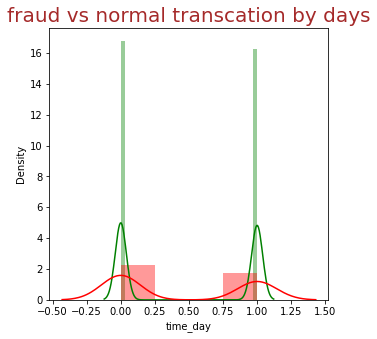

In [14]:
# fraud vs normaltransaction for day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class']==0]['time_day'],color='green')
sns.distplot(df[df['Class']==1]['time_day'],color='red')
plt.title('fraud vs normal transcation by days',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
plt.show()

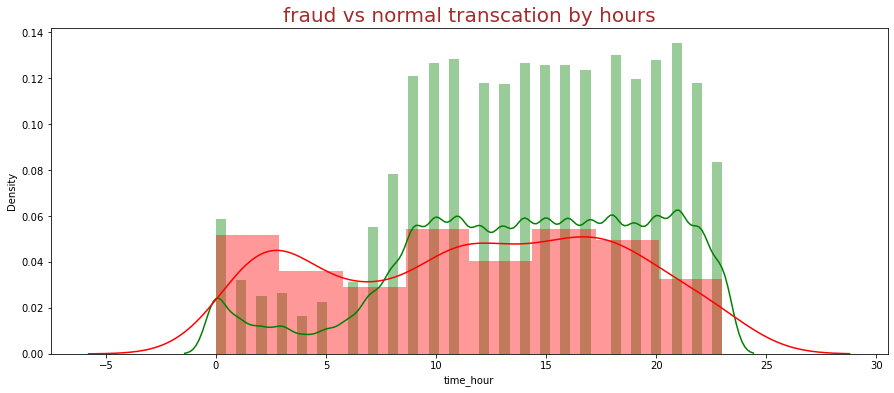

In [15]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Class']==0]['time_hour'],color='green')
sns.distplot(df[df['Class']==1]['time_hour'],color='red')
plt.title('fraud vs normal transcation by hours',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
plt.show()

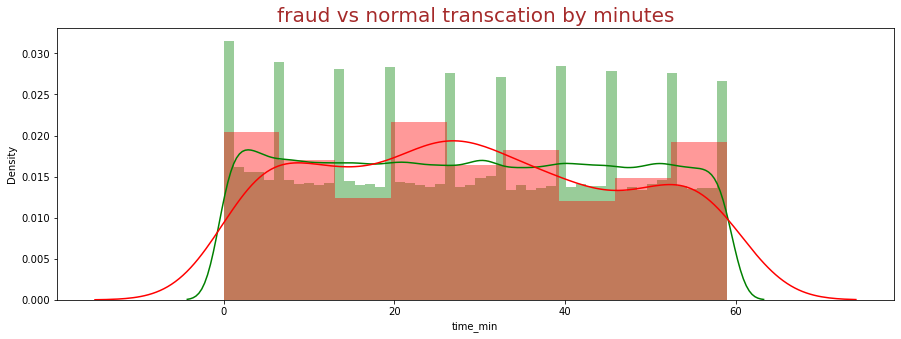

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class']==0]['time_min'],color='green')
sns.distplot(df[df['Class']==1]['time_min'],color='red')
plt.title('fraud vs normal transcation by minutes',fontdict={'fontsize':20,'fontweight':5,'color':'brown'})
plt.show()

Text(0.5, 1.05, 'Time vs Class Distribution')

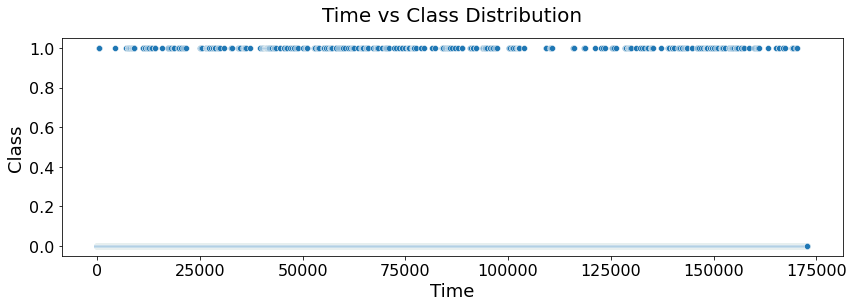

In [17]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(14,4))
cmap = sns.color_palette('Set2')

sns.scatterplot(x=df['Time'], y='Class',palette=cmap, data=df)
plt.xlabel('Time', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Time vs Class Distribution', size=20, y=1.05)





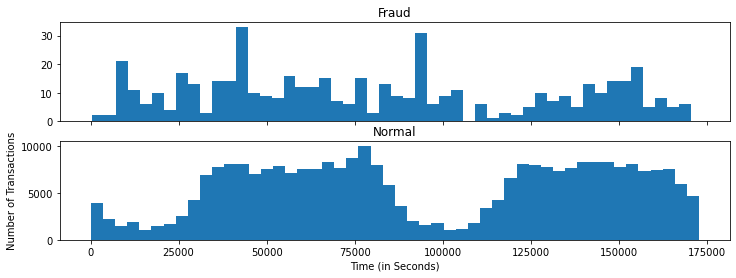

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Text(0.5, 1.05, 'Amount vs Class Distribution')

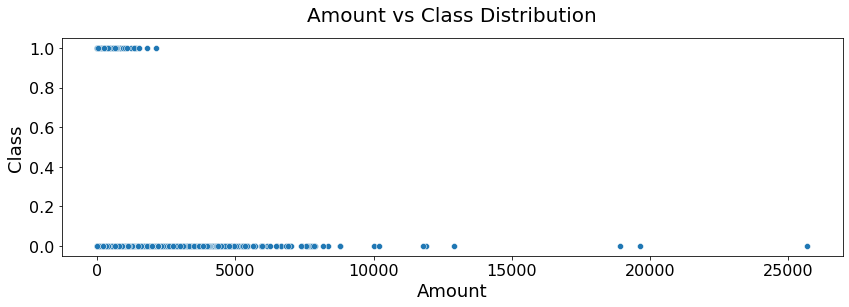

In [19]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(14,4))
cmap = sns.color_palette('Set2')

sns.scatterplot(x=df['Amount'], y='Class',palette=cmap, data=df)
plt.xlabel('Amount', size=18)
plt.ylabel('Class', size=18)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16) 
plt.title('Amount vs Class Distribution', size=20, y=1.05)


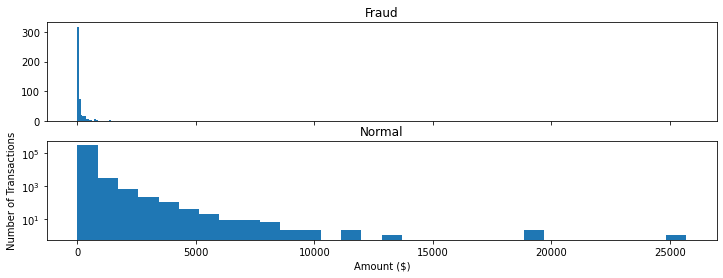

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [21]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

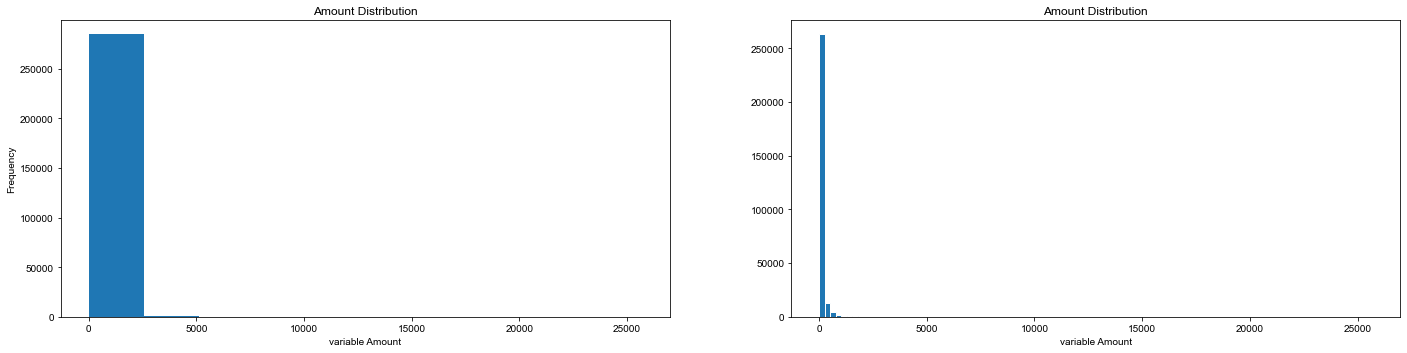

In [22]:
plt.figure(figsize=(24, 12))

plt.subplot(2,2,1)
plt.title('Amount Distribution')
df['Amount'].astype(int).plot.hist();
plt.xlabel("variable Amount")
#plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.title('Amount Distribution')
sns.set()
plt.xlabel("variable Amount")
plt.hist(df['Amount'],bins=100)
plt.show()

In [23]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('CASE AMOUNT STATISTICS')
print('\nNON-FRAUD CASE AMOUNT STATS')
print(nonfraud_cases['Amount'].describe())
print('\nFRAUD CASE AMOUNT STATS')
print(fraud_cases['Amount'].describe())

CASE AMOUNT STATISTICS

NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [24]:
# Drop unnecessary columns like time, day, minutes and hours column
df.drop(['Time','time_day','time_min','time_hour'],axis=1,inplace=True)



In [25]:
from sklearn.preprocessing import StandardScaler 
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Amount'].head(10)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64

In [26]:
df.Amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [27]:
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  0.244964      0  
1  0.167170  0.125895 -0.008983  0.014724 -0.342475      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  1.160686      0  
3  0.647376 -0.221929  0.062723  0.061458  0.140534      0  
4 -0.206010  0.502292  0.219422  0.215153 -0.073403      0  

[5 rows x 30 columns]

### Splitting the data into train & test data

In [28]:
#Create X and y dataset for independent and dependent data
y= df['Class']
X = df.drop(['Class'], axis=1)



In [29]:
X.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403  

[5 rows x 29 columns]

In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.20)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [33]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [34]:
df.skew()

V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

### Plotting the distribution of a variable

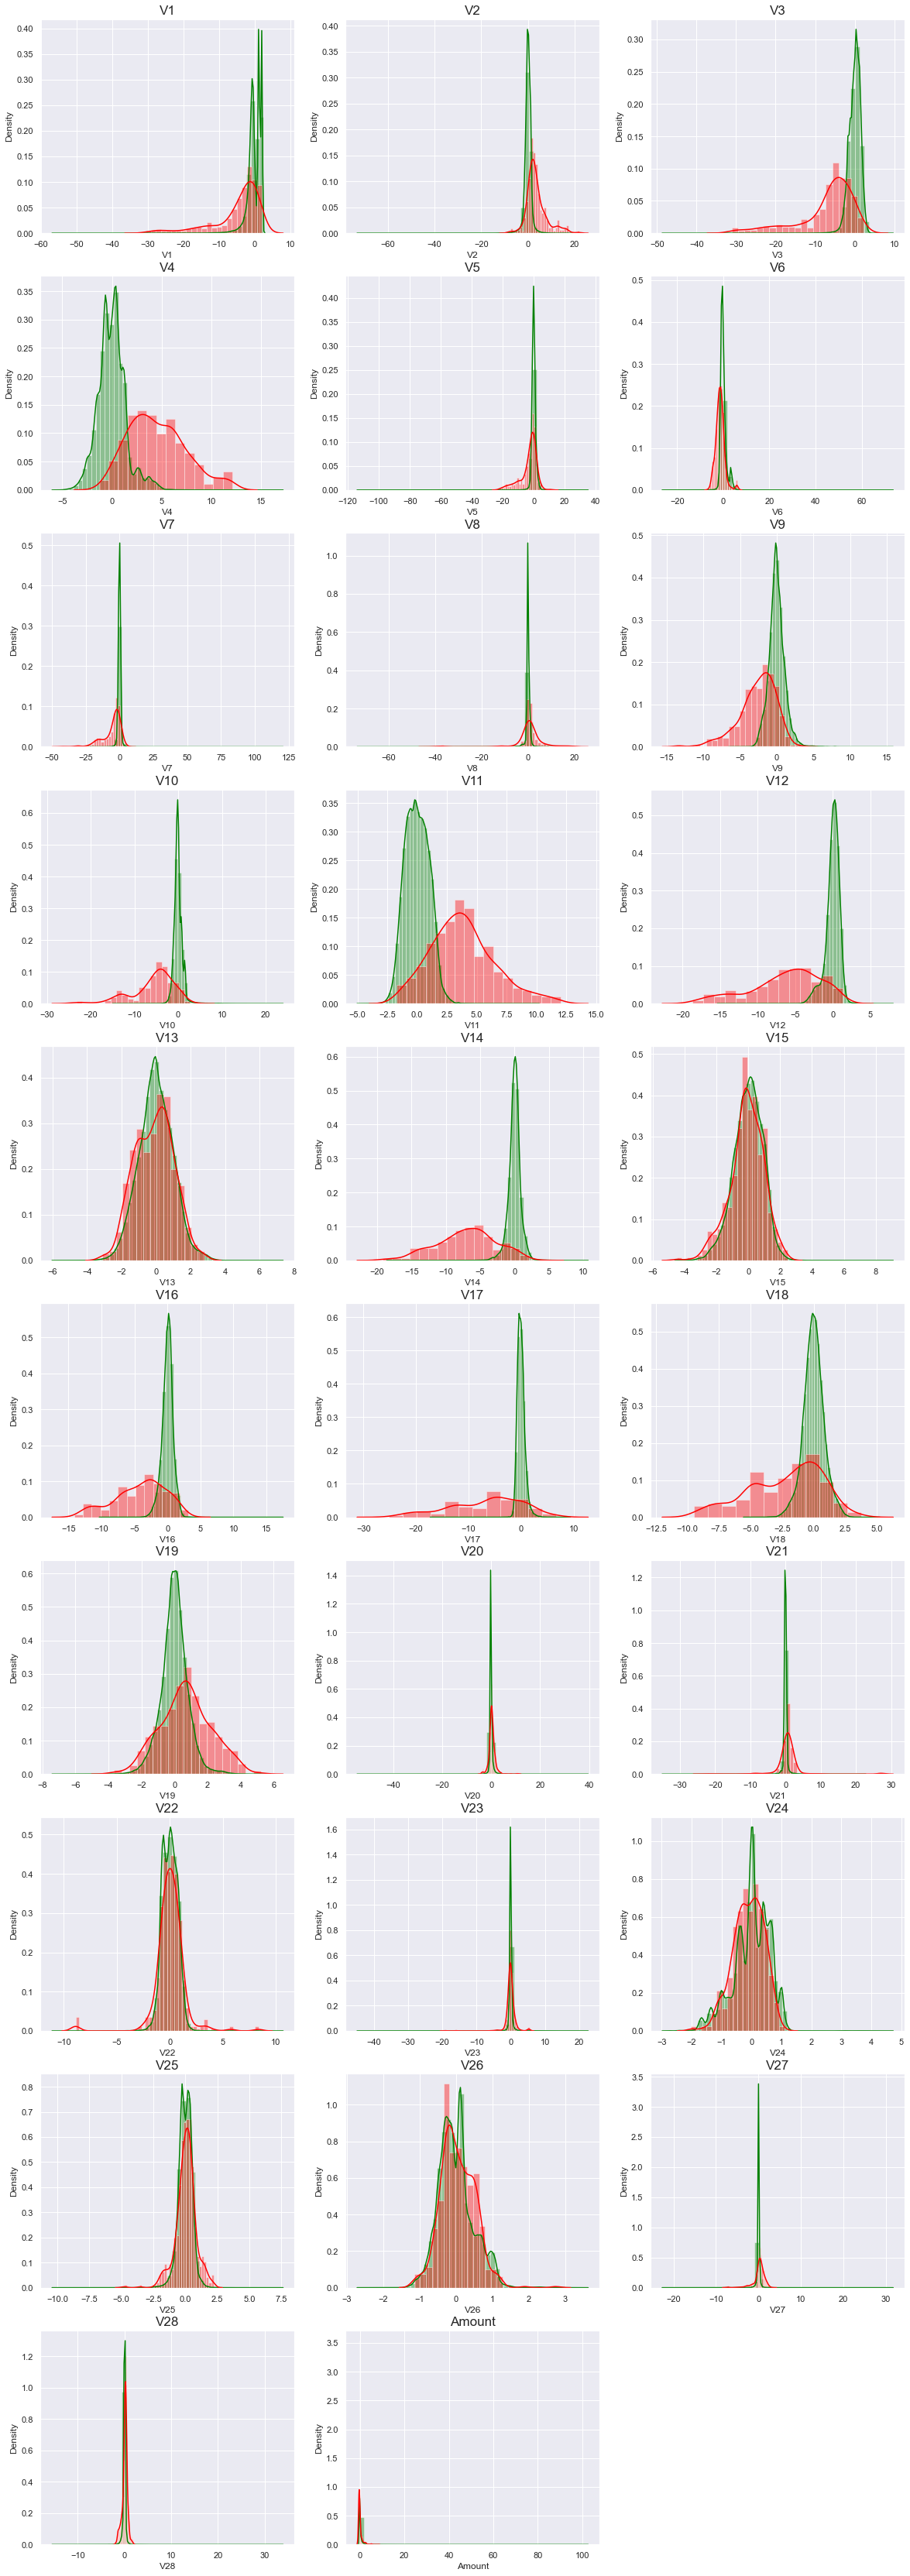

In [35]:
# plot the histogram of a variable from the dataset to see the skewness
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [36]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)

In [37]:
X_train_pt


array([[ 1.41434095, -0.3520372 , -0.59921896, ..., -0.01122659,
        -0.13370341, -1.0481669 ],
       [-0.34333298,  0.42756942,  0.25677989, ..., -0.02688758,
         0.45951523,  0.00477445],
       [-1.47426175, -1.17556098,  0.85594951, ..., -0.26068387,
        -1.13728188,  1.57911983],
       ...,
       [-1.08049598, -0.41791114, -0.33512011, ..., -0.59545179,
         0.23360426,  2.0422603 ],
       [-0.45881044,  0.58064986,  0.03090141, ..., -0.70882989,
         0.06535926, -1.00457383],
       [ 0.16985151, -0.62614039,  0.85585917, ...,  0.1296204 ,
         0.23292331,  1.74655457]])

In [38]:
#Create Dataframe
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

In [39]:
X_train_pt_df.shape

(227845, 29)

In [40]:
X_train_pt_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  1.414341 -0.352037 -0.599219 -0.067550 -0.129205  0.326372 -0.541033   
1 -0.343333  0.427569  0.256780  0.679871  0.243257  0.179406  0.503851   
2 -1.474262 -1.175561  0.855950  0.569615  0.787904 -0.049687 -0.370444   
3  1.241902 -0.686705 -1.042562 -0.081862 -0.419771 -1.002720  0.200703   
4  1.636001 -0.424955 -1.004673 -0.627617 -0.300834 -1.209461 -0.095084   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.115625  1.025773  0.005709  ... -0.223245 -0.256588 -0.668354  0.543815   
1 -0.125500 -0.649147  0.314539  ...  0.263948 -0.156535 -0.378679 -0.188657   
2  0.923863 -0.529840 -0.907168  ...  1.087460  0.396218 -0.454678  0.334451   
3 -0.572151 -0.729926  0.745982  ... -0.255596 -0.557964 -1.230034  0.211300   
4 -0.493504 -0.633904  0.803305  ... -0.061150  0.087590  0.156477  0.338766   

        V24       V25       V26       V27       V28    Amount  
0  0.000923 -0.840953 -0.574979 -0.011227 -0.133703 -1.048167  
1 -0.776852 -0.981064  1.417840 -0.026888  0.459515  0.004774  
2 -0.530882  0.437817  0.722656 -0.260684 -1.137282  1.579120  
3  0.029927 -0.499203  0.970393 -0.244245 -0.085740  1.583489  
4 -0.233768 -0.160767 -0.599292 -0.117488 -0.186304 -0.791337  

[5 rows x 29 columns]

In [41]:
y_train

201788    0
179369    0
73138     0
208679    0
206534    0
         ..
212912    0
65615     0
253799    0
210755    0
56088     0
Name: Class, Length: 227845, dtype: int64

In [42]:
X_test_pt_df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.659542 -0.233654 -0.561392  0.370204  1.315390  2.549487 -0.719290   
1  1.407380 -0.141301 -1.746728 -0.024158  1.977052  2.170887 -0.523047   
2  0.097973 -0.938840  0.531205  0.347000 -1.035043  0.388178 -0.400021   
3  1.521872 -0.159419 -1.049837  0.196778  0.249270 -0.347533  0.094357   
4  0.115287  1.081172 -1.466710  3.070695  1.596924 -0.312184  0.850740   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  1.063281  0.710228 -0.097852  ... -0.077251 -0.221050 -0.412899 -0.220148   
1  0.729273  1.697680 -0.967276  ... -0.192674 -0.240958 -0.141136  0.129797   
2  0.232059  0.957934 -0.377877  ...  0.562484  0.056443 -0.542848 -0.217122   
3 -0.283326  0.654474  0.115477  ... -0.295092 -0.488160 -1.237974  0.351752   
4 -0.318420 -1.925026  0.886989  ...  0.319153 -0.031413  0.360358  0.611544   

        V24       V25       V26       V27       V28    Amount  
0  1.951477  1.709096 -0.514158  0.138782  0.067590 -1.004574  
1  0.968209  0.160661  1.254388 -0.132660 -0.120926 -0.831769  
2  0.411313 -0.298681  1.725945 -0.217809  0.173409  1.869543  
3 -1.633606 -0.395924  0.627852 -0.189052 -0.212339 -1.040264  
4  0.497076 -0.666162  0.958511  0.411501  0.027014 -0.141966  

[5 rows x 29 columns]

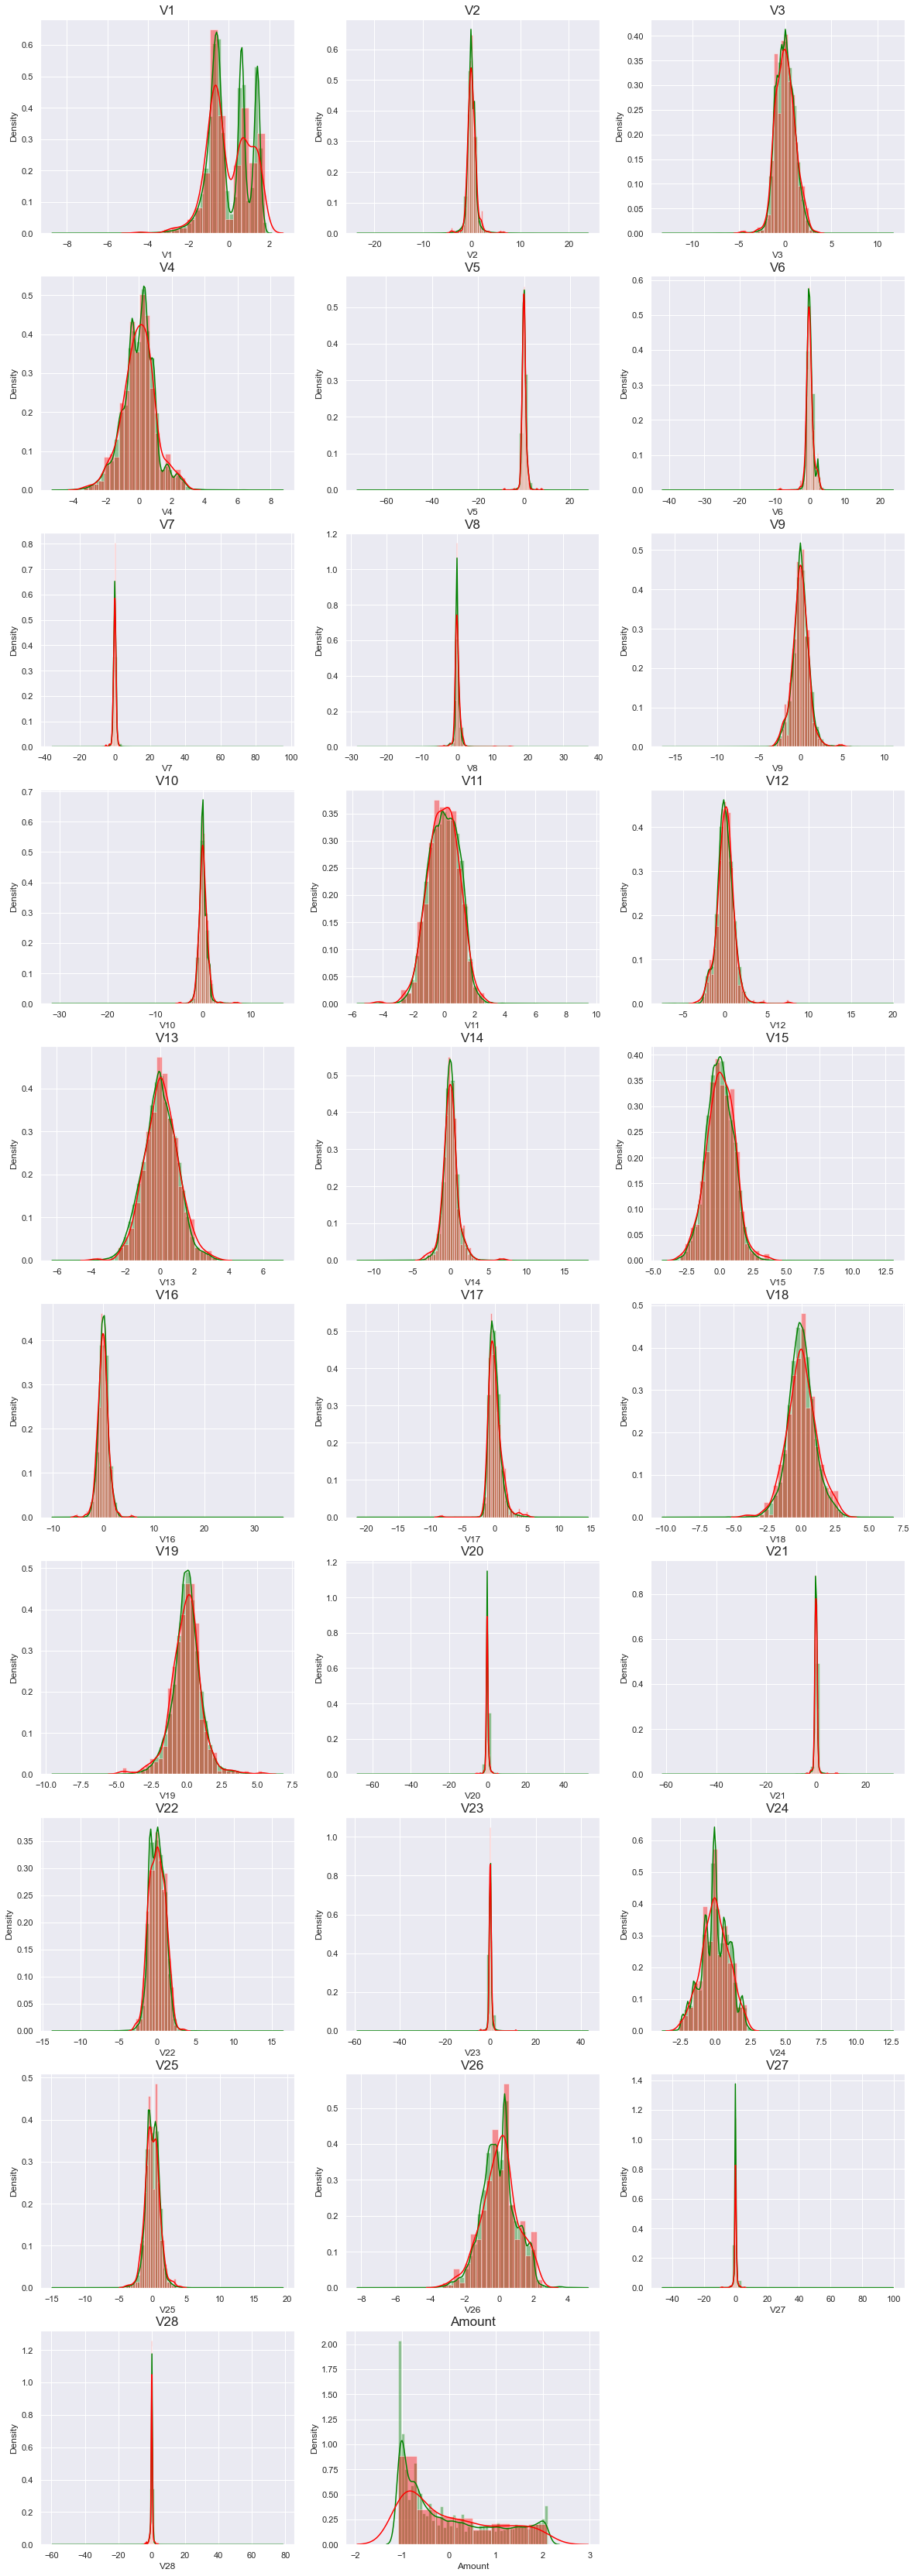

In [43]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()


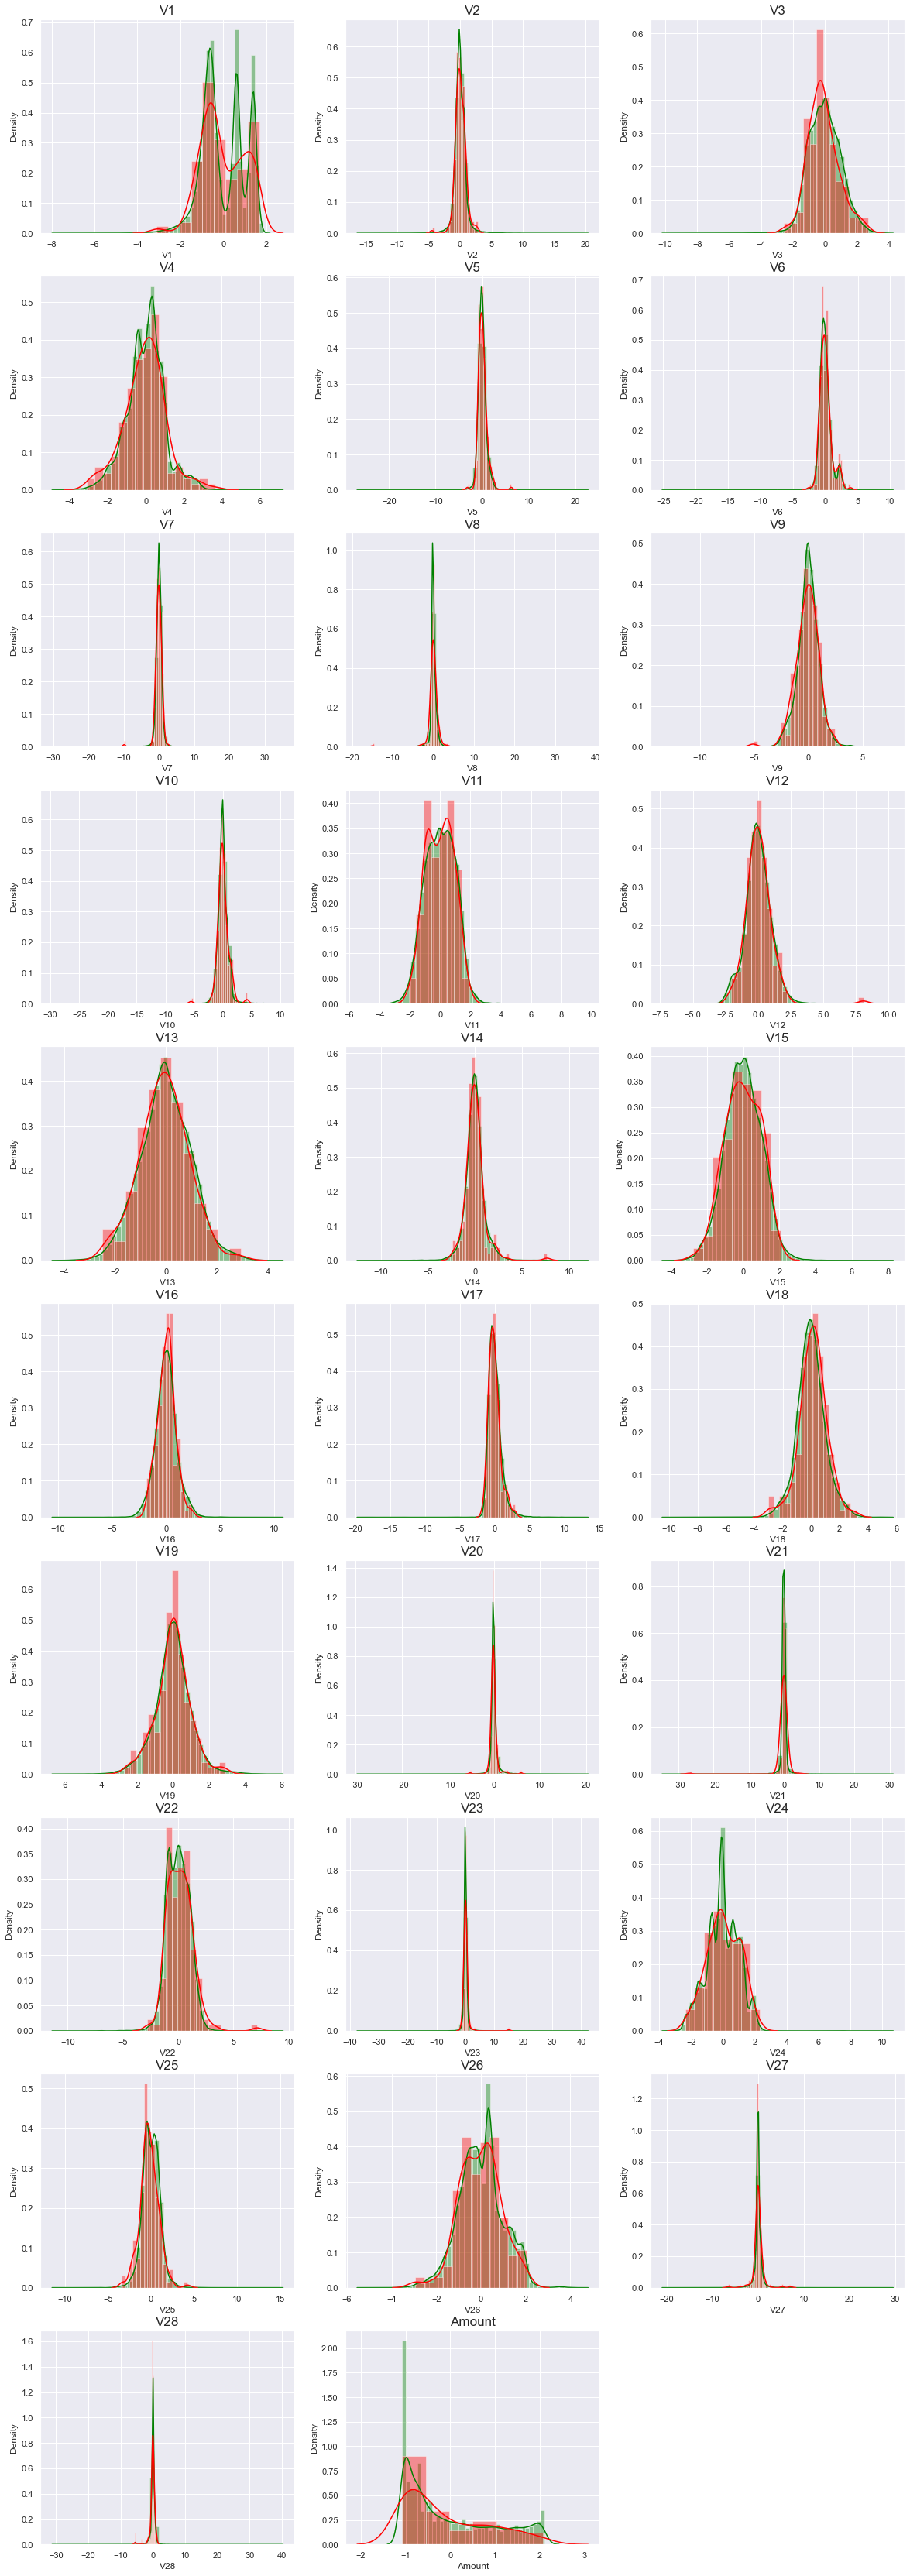

In [44]:
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [45]:
# Logistic Regression
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))  #--> list of values
cv_num =KFold(n_splits=10, shuffle=True, random_state=42)   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [46]:

for train_index, test_index in cv_num.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [    11     12     33 ... 227829 227835 227836]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [     4      6     22 ... 227796 227804 227806]
TRAIN: [     0      1      2 ... 227841 227842 227843] TEST: [    31     87    107 ... 227809 227810 227844]
TRAIN: [     1      2      3 ... 227841 227842 227844] TEST: [     0     20     30 ... 227827 227828 227843]
TRAIN: [     0      2      3 ... 227842 227843 227844] TEST: [     1     21     23 ... 227832 227837 227841]
TRAIN: [     0      1      2 ... 227841 227843 227844] TEST: [     3     48     58 ... 227823 227839 227842]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [     7      8     14 ... 227825 227830 227834]
TRAIN: [     0      1      3 ... 227842 227843 227844] TEST: [     2      9     13 ... 227812 227813 227815]
TRAIN: [     0      1      2 ... 227842 227843 227844] TEST: [    10     16     18 ... 227814 227833 227840]
TRAIN: [     0     

In [47]:
X_train_cv.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V20       V21       V22       V23  \
0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403  

[5 rows x 29 columns]

In [48]:
print(X_train_cv.shape)
print(y_train_cv.shape)
print(X_test_cv.shape)
print(y_test_cv.shape)

(205061, 29)
(205061,)
(22784, 29)
(22784,)


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train_cv) 
  

LogisticRegression()

In [50]:
y_pred = logreg.predict(X_test_cv)

In [51]:
logreg.score(X_train_cv, y_train_cv)

0.9991173358171471

In [52]:
print(metrics.classification_report(y_test_cv, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.84      0.55      0.67        38

    accuracy                           1.00     22784
   macro avg       0.92      0.78      0.83     22784
weighted avg       1.00      1.00      1.00     22784



In [53]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test_cv))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test_cv , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test_cv , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test_cv , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test_cv , y_pred)))

Accuracy :0.99908
AUC : 0.77623
Precision : 0.84000
Recall : 0.55263
F1 : 0.66667


In [54]:
#Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    22759
1       25
dtype: int64

In [55]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test_cv).value_counts()

0    22746
1       38
Name: Class, dtype: int64

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test_cv,y_pred)
cnf_matrix

array([[22742,     4],
       [   17,    21]], dtype=int64)

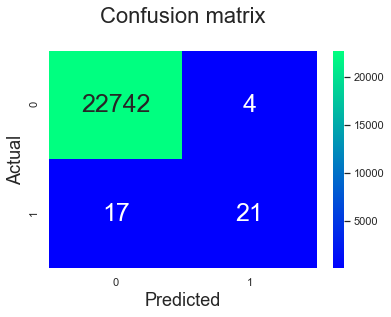

In [57]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

In [58]:
metrics.roc_auc_score(y_test_cv , y_pred) 

0.7762278619259835

In [59]:
y_pred_proba = logreg.predict_proba(X_test_cv)
y_pred_proba

array([[9.99859160e-01, 1.40839809e-04],
       [9.99883105e-01, 1.16894566e-04],
       [9.99572691e-01, 4.27309222e-04],
       ...,
       [9.99806202e-01, 1.93797743e-04],
       [9.99660702e-01, 3.39297752e-04],
       [9.99767890e-01, 2.32110425e-04]])

AUC -  0.7762278619259835 



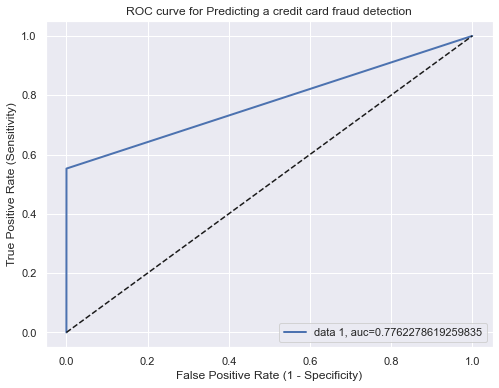

In [60]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test_cv, y_pred)

auc = metrics.roc_auc_score(y_test_cv, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.667


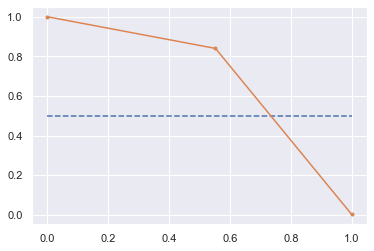

In [61]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test_cv, y_pred)

# calculate F1 score
f1 = metrics.f1_score(y_test_cv, y_pred)

print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

In [62]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [63]:
def Plot_confusion_matrix(y_test, pred_test):
    
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [64]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handiling','Model','Accuracy','roc_value','threshold'])

In [65]:
def Plot_confusion_matrix(y_test, pred_test):
    
    cm = confusion_matrix(y_test, pred_test)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
    classNames = ['Non-Fraudalent','Fraudalent']
    plt.title('Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
  
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
    plt.show()

In [72]:
def KNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
    
  #Evaluate KNN  model
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_auc_score
  #create KNN model and fit the model with train dataset
    knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("model score")
    print(score)
  
  #Accuracy
    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))


    knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    knn_roc_value = roc_auc_score(y_test, knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,
                                                 'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [73]:
def SVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  #Evaluate SVM model with sigmoid kernel  model
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel='sigmoid', random_state=42)
    clf.fit(X_train,y_train)
    y_pred_SVM = clf.predict(X_test)
    SVM_Score = accuracy_score(y_test,y_pred_SVM)
    print("accuracy_score : {0}".format(SVM_Score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred_SVM)
    print("classification Report")
    print(classification_report(y_test, y_pred_SVM))



  # Run classifier
    classifier = SVC(kernel='sigmoid' , probability=True)
    svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
    roc_value = roc_auc_score(y_test, svm_probs)
  
    print("SVM roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("SVM threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,
                                                 'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [74]:
def TreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Decision Tree model with 'gini' & 'entropy'
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score
    criteria = ['gini', 'entropy'] 
    scores = {} 
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion = c, random_state=42) 
        dt.fit(X_train, y_train) 
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test) 
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        scores = test_score 
        print(c + " score: {0}" .format(test_score))
        print("Confusion Matrix")
        Plot_confusion_matrix(y_test, y_pred)
        print("classification Report")
        print(classification_report(y_test, y_pred))
        print(c + " tree_roc_value: {0}" .format(tree_roc_value))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr-fpr)]
        print("Tree threshold: {0}".format(threshold))
        roc_auc = metrics.auc(fpr, tpr)
        print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
        plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
        plt.legend(loc=4)
        plt.show()
  
        df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,
                                                     'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,
                                                     'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [75]:
def RandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
    #Evaluate Random Forest model
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
    RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
    RF_model.fit(X_train, y_train)
    RF_test_score = RF_model.score(X_test, y_test)
    RF_model.predict(X_test)

    print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, rf_predictions)
    print("classification Report")
    print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
    rf_probs = RF_model.predict_proba(X_test)[:, 1]
    
  # Calculate roc auc
    roc_value = roc_auc_score(y_test, rf_probs)

    print("Random Forest roc_value: {0}" .format(roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest',
                                                'Accuracy': RF_test_score,'roc_value': roc_value,
                                                'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

In [76]:

def XGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):
    #Evaluate XGboost model
    from xgboost import XGBClassifier
    from sklearn.metrics import roc_auc_score
  # fit model no training data
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train, y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test, y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
  # Probabilities for each class
    XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
    XGB_roc_value = roc_auc_score(y_test, XGB_probs)

    print("XGboost roc_value: {0}" .format(XGB_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr, tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
  
    df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

    return df_Results

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN Model
model score
0.9996488764044944
Confusion Matrix


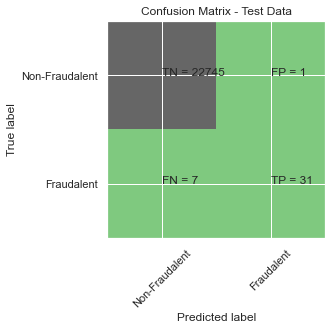

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.97      0.82      0.89        38

    accuracy                           1.00     22784
   macro avg       0.98      0.91      0.94     22784
weighted avg       1.00      1.00      1.00     22784

KNN roc_value: 0.9472828073877652
KNN threshold: 0.2
ROC for the test dataset 94.7%


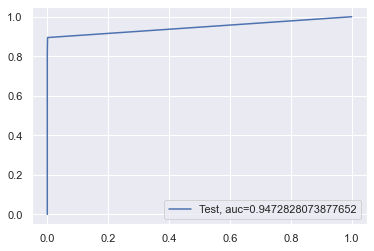

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992977528089888
Confusion Matrix


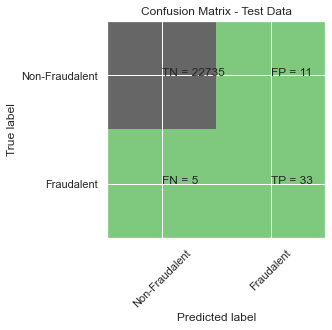

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.75      0.87      0.80        38

    accuracy                           1.00     22784
   macro avg       0.87      0.93      0.90     22784
weighted avg       1.00      1.00      1.00     22784

gini tree_roc_value: 0.9339687255596125
Tree threshold: 1.0
ROC for the test dataset 93.4%


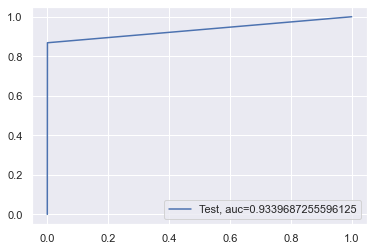

entropy score: 0.9991660814606742
Confusion Matrix


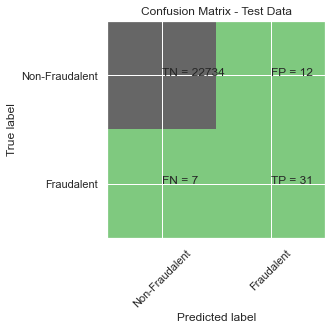

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.72      0.82      0.77        38

    accuracy                           1.00     22784
   macro avg       0.86      0.91      0.88     22784
weighted avg       1.00      1.00      1.00     22784

entropy tree_roc_value: 0.9076309541990032
Tree threshold: 1.0
ROC for the test dataset 90.8%


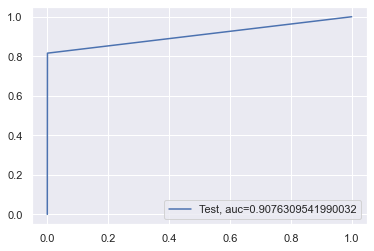

--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9997366573033708
Confusion Matrix


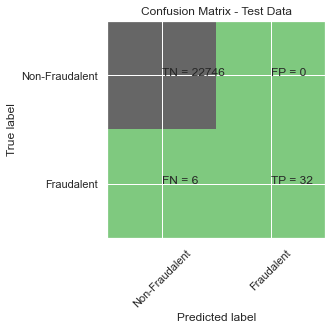

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       1.00      0.84      0.91        38

    accuracy                           1.00     22784
   macro avg       1.00      0.92      0.96     22784
weighted avg       1.00      1.00      1.00     22784

Random Forest roc_value: 0.959377472962279
Random Forest threshold: 0.02
ROC for the test dataset 95.9%


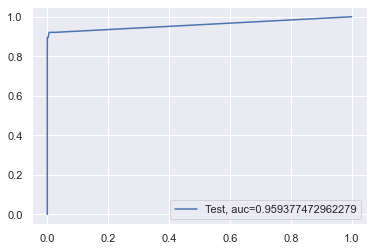

--------------------------------------------------------------------------------
XGBoost Model
[11:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9996927668539326
Confusion Matrix


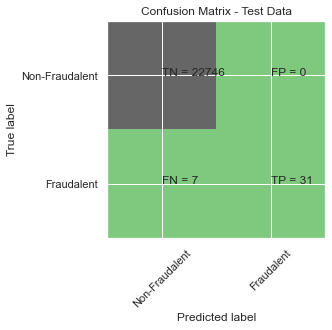

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       1.00      0.82      0.90        38

    accuracy                           1.00     22784
   macro avg       1.00      0.91      0.95     22784
weighted avg       1.00      1.00      1.00     22784

XGboost roc_value: 0.9983490445977777
XGBoost threshold: 0.0002641411265358329
ROC for the test dataset 99.8%


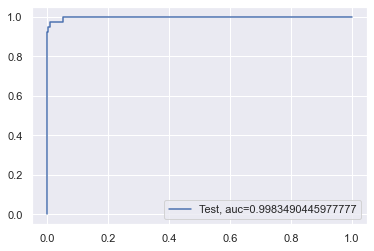

--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9978054775280899
Confusion Matrix


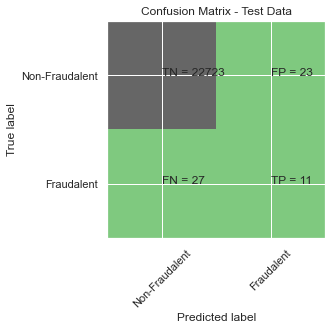

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.32      0.29      0.31        38

    accuracy                           1.00     22784
   macro avg       0.66      0.64      0.65     22784
weighted avg       1.00      1.00      1.00     22784

SVM roc_value: 0.7505472332902952
SVM threshold: 0.000991963937535027
ROC for the test dataset 75.1%


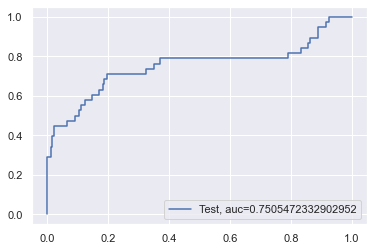

In [77]:



print("KNN Model")
df_Results = KNNModels(df_Results,"imbalance",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = TreeModels(df_Results,"imbalance",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
df_Results = RandomForestModels(df_Results,"imbalance",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")

df_Results = XGBoostModels(df_Results,"imbalance",X_train_cv,y_train_cv, X_test_cv, y_test_cv)

print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")

df_Results = SVMModels(df_Results,"imbalance",X_train_cv,y_train_cv, X_test_cv, y_test_cv)


In [78]:
df_Results

Data_Imbalance_Handiling                             Model  Accuracy  \
0                imbalance                               KNN  0.999649   
1                imbalance     Tree Model with gini criteria  0.999298   
2                imbalance  Tree Model with entropy criteria  0.999166   
3                imbalance                     Random Forest  0.999737   
4                imbalance                           XGBoost  0.999693   
5                imbalance                               SVM  0.997805   

   roc_value  threshold  
0   0.947283   0.200000  
1   0.933969   1.000000  
2   0.907631   1.000000  
3   0.959377   0.020000  
4   0.998349   0.000264  
5   0.750547   0.000992

## logestic regresssion on powertransform data on imbalance data

In [86]:
logreg = LogisticRegression()
logreg.fit(X_train_pt_df, y_train)
y_pred = logreg.predict(X_test_pt_df)

In [87]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.59      0.67        96

    accuracy                           1.00     56962
   macro avg       0.88      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [88]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
print("\n")

Accuracy :0.99902
AUC : 0.79673
Precision : 0.77027
Recall : 0.59375
F1 : 0.67059




In [89]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[56849,    17],
       [   39,    57]], dtype=int64)

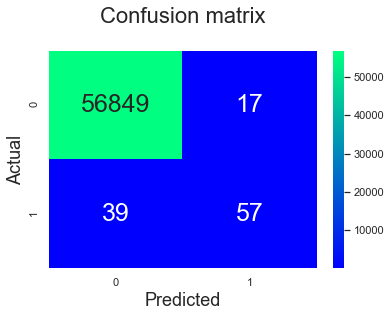

In [90]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

In [91]:
metrics.roc_auc_score(y_test , y_pred) 

0.7967255257974889

In [94]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99658489e-01, 3.41510802e-04],
       [9.98336544e-01, 1.66345585e-03],
       [9.99887766e-01, 1.12234216e-04],
       ...,
       [9.99915238e-01, 8.47618884e-05],
       [9.99967974e-01, 3.20255960e-05],
       [9.96386445e-01, 3.61355504e-03]])

AUC -  0.7967255257974889 



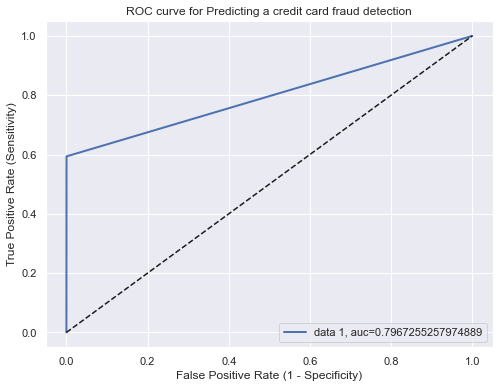

In [95]:
#plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

--------------------------------------------------------------------------------
KNN Model
model score
0.9993328885923949
Confusion Matrix


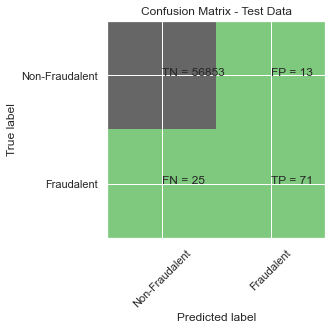

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.85      0.74      0.79        96

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.9008387957361752
KNN threshold: 0.2
ROC for the test dataset 90.1%


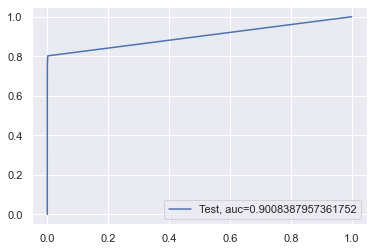

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989993328885924
Confusion Matrix


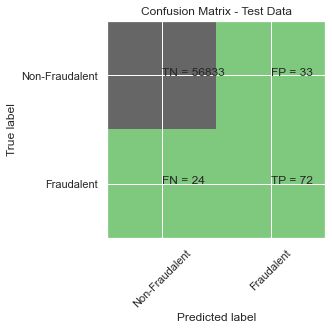

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.69      0.75      0.72        96

    accuracy                           1.00     56962
   macro avg       0.84      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8747098441951253
Tree threshold: 1.0
ROC for the test dataset 87.5%


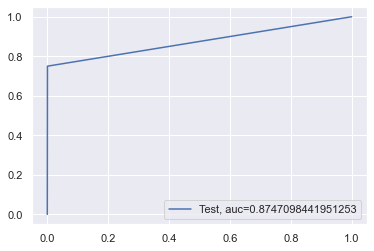

entropy score: 0.9991046662687406
Confusion Matrix


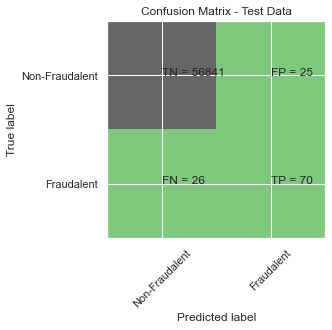

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.74      0.73      0.73        96

    accuracy                           1.00     56962
   macro avg       0.87      0.86      0.87     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643635183296404
Tree threshold: 1.0
ROC for the test dataset 86.4%


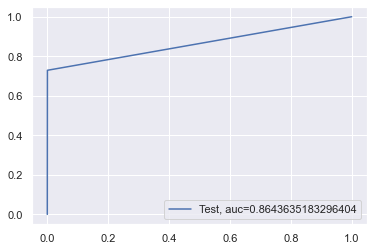

--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


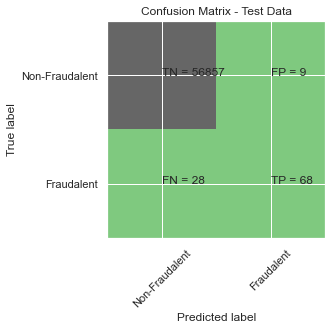

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.925011393744358
Random Forest threshold: 0.01
ROC for the test dataset 92.5%


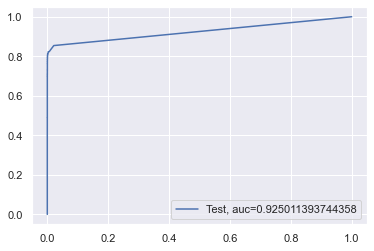

--------------------------------------------------------------------------------
XGBoost Model
[12:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557775359011
Confusion Matrix


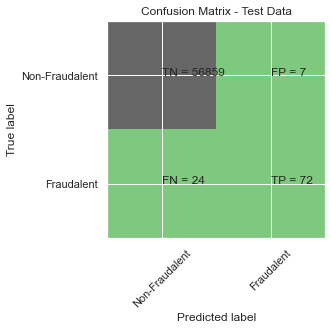

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9785370798602564
XGBoost threshold: 7.432205165969208e-05
ROC for the test dataset 97.9%


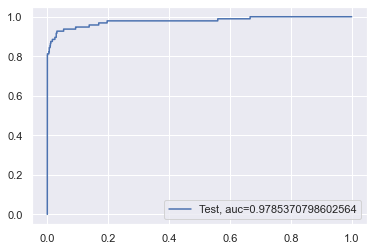

--------------------------------------------------------------------------------
SVM Model with Sigmoid Kernel
accuracy_score : 0.9985779993679997
Confusion Matrix


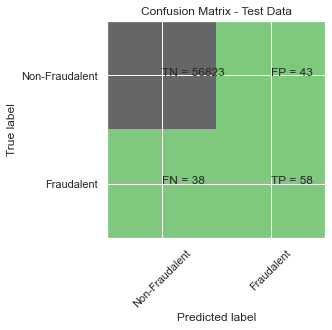

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.79      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.884296159685342
SVM threshold: 0.0011323715965381336
ROC for the test dataset 88.4%


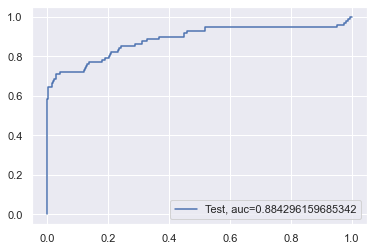

In [97]:


print('-'*80 )
#Run KNN Model
print("KNN Model")
df_Results = KNNModels(df_Results,"power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = TreeModels(df_Results,"power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

print('-'*80 )
#Run Random Forest Model
print("Random Forest Model")
df_Results = RandomForestModels(df_Results,"power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

print('-'*80 )
#Run XGBoost Modela
print("XGBoost Model")

df_Results = XGBoostModels(df_Results,"power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)

print('-'*80 )
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")

df_Results = SVMModels(df_Results,"power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)


In [100]:
df_Results

Data_Imbalance_Handiling                             Model  Accuracy  \
0                 imbalance                               KNN  0.999649   
1                 imbalance     Tree Model with gini criteria  0.999298   
2                 imbalance  Tree Model with entropy criteria  0.999166   
3                 imbalance                     Random Forest  0.999737   
4                 imbalance                           XGBoost  0.999693   
5                 imbalance                               SVM  0.997805   
6         power Transformer                               KNN  0.999333   
7         power Transformer     Tree Model with gini criteria  0.998999   
8         power Transformer  Tree Model with entropy criteria  0.999105   
9         power Transformer                     Random Forest  0.999350   
10        power Transformer                           XGBoost  0.999456   
11        power Transformer                               SVM  0.998578   

    roc_value  threshold  
0    0.947283   0.200000  
1    0.933969   1.000000  
2    0.907631   1.000000  
3    0.959377   0.020000  
4    0.998349   0.000264  
5    0.750547   0.000992  
6    0.900839   0.200000  
7    0.874710   1.000000  
8    0.864364   1.000000  
9    0.925011   0.010000  
10   0.978537   0.000074  
11   0.884296   0.001132

# with power transform data we got Xgboost as best

In [102]:
from sklearn.metrics import roc_auc_score

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_train_pt_df, y_train ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test_pt_df,y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test_pt_df)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[12:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999420666409185
XGboost roc_value: 0.9794412522421131
XGBoost threshold: 0.000484397285617888


Top var = 17
2nd Top var = 14
3rd Top var = 10


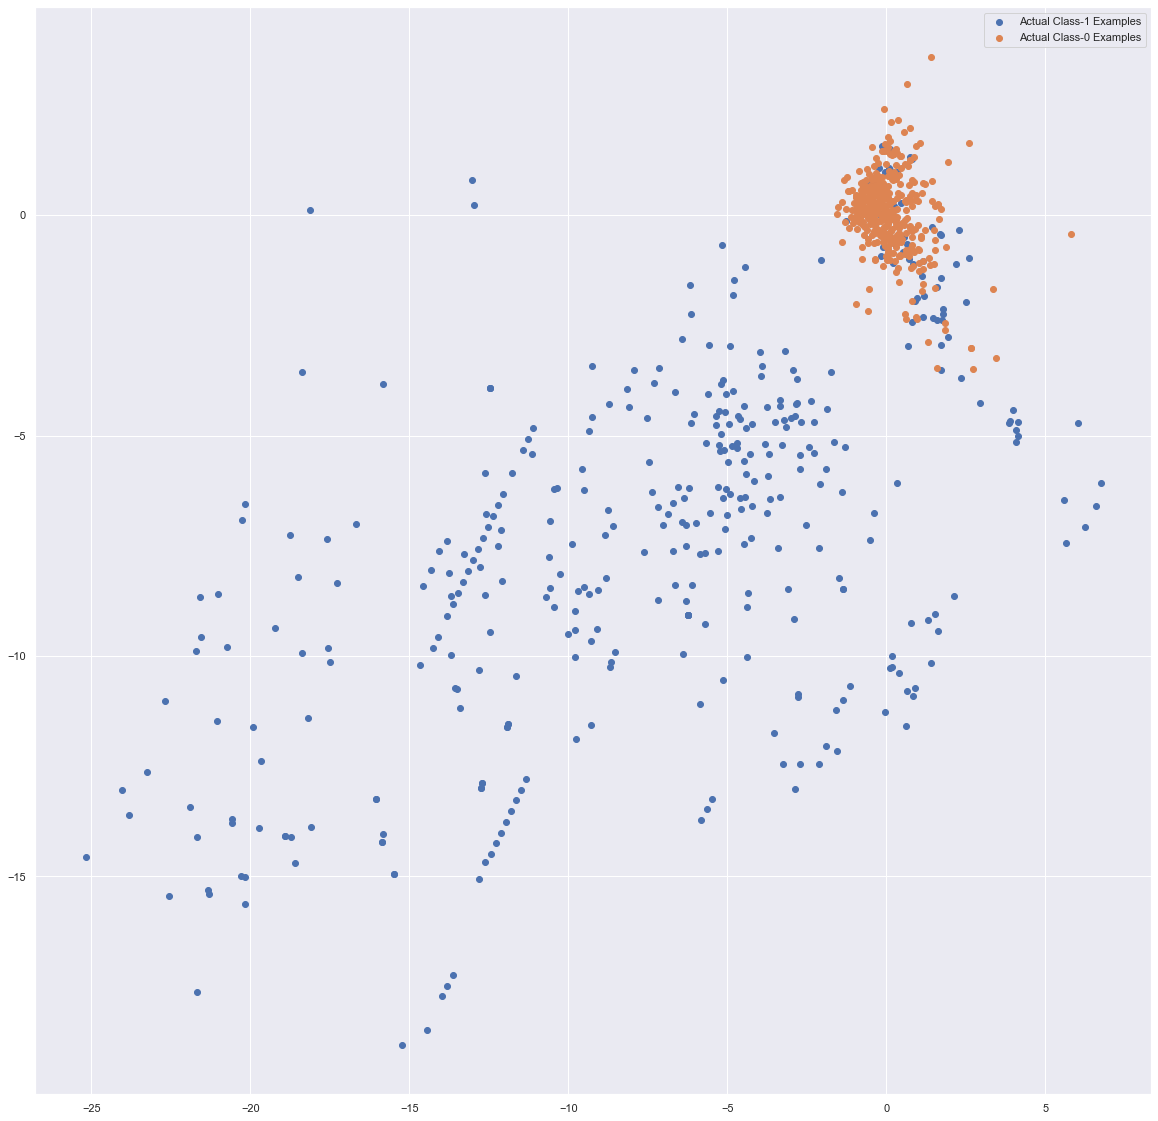

In [103]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building 
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [104]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y)):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over,   columns=cols)

In [105]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227846, 29)
(227846,)
(56961, 29)
(56961,)


In [106]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))


print('Resampled dataset shape %s' % Counter(y_over))

Original dataset shape Counter({0: 227452, 1: 394})
Resampled dataset shape Counter({0: 227452, 1: 113726})


## logestic regression with randomoversampler

In [107]:
logreg = LogisticRegression()
logreg.fit(X_over, y_over) 
y_pred = logreg.predict(X_test)
logreg.score(X_over, y_over)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.13      0.87      0.23        98

    accuracy                           0.99     56961
   macro avg       0.56      0.93      0.61     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy :0.98976
AUC : 0.92866
Precision : 0.12977
Recall : 0.86735
F1 : 0.22576


In [108]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[56293,   570],
       [   13,    85]], dtype=int64)

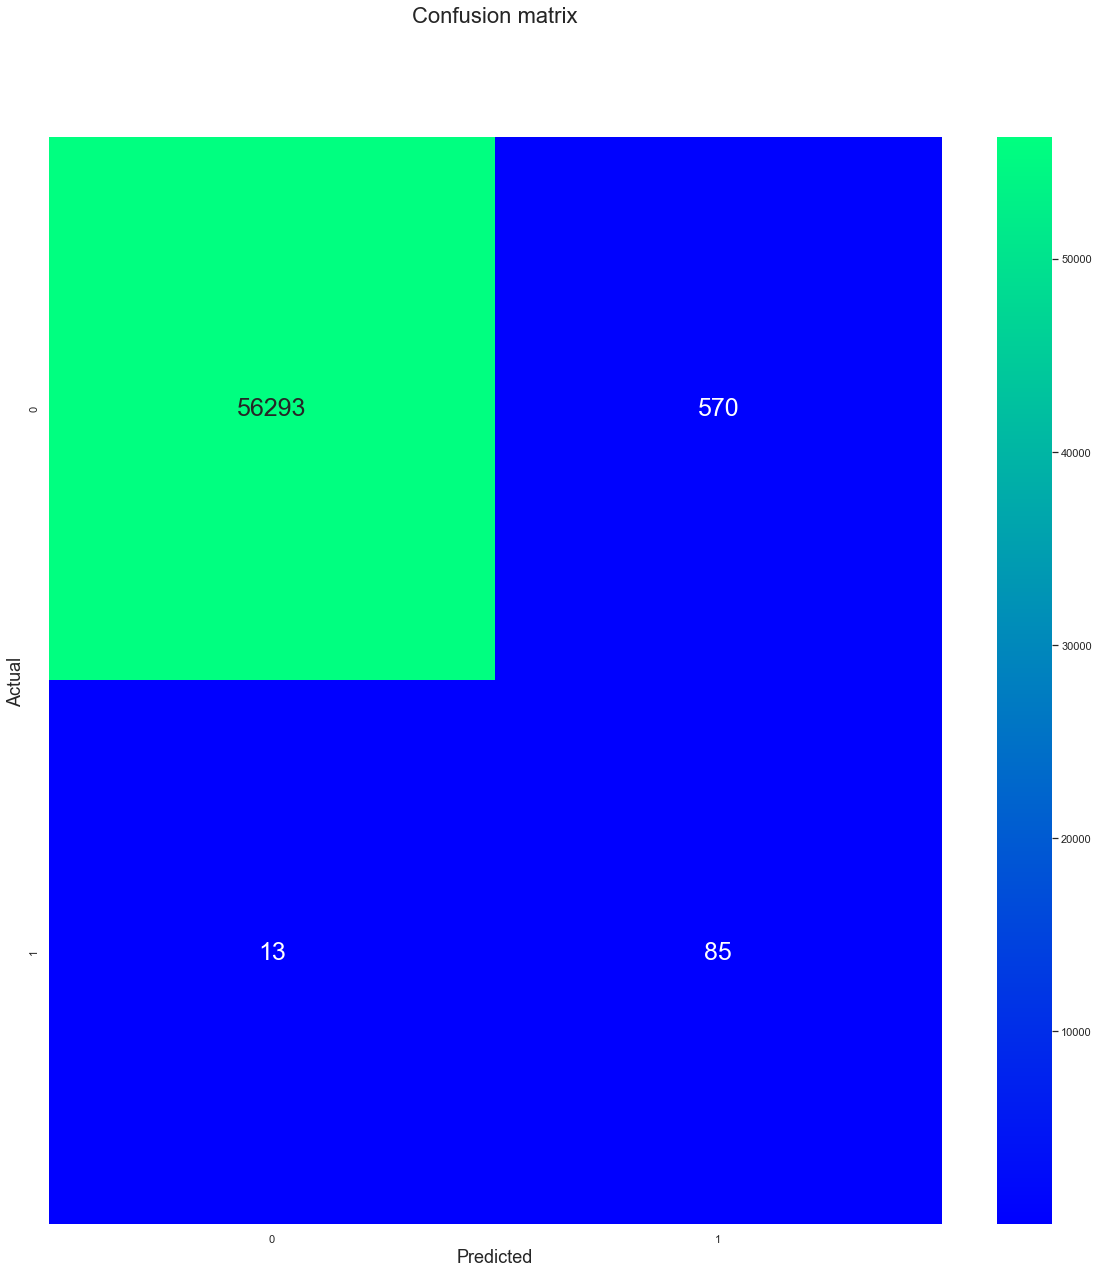

In [110]:
# Heatmap for Confusion Matrix

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

In [111]:
metrics.roc_auc_score(y_test , y_pred) 

0.9286614228900325

AUC -  0.9286614228900325 



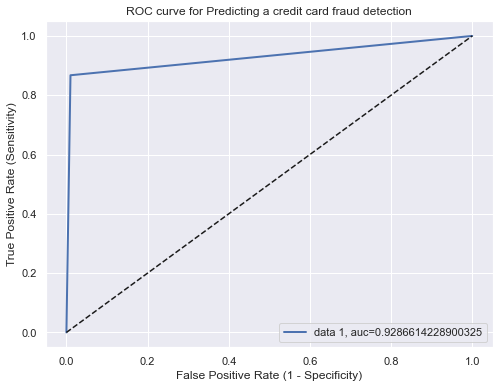

In [112]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

--------------------------------------------------------------------------------
KNN Model
model score
0.9992450975228665
Confusion Matrix


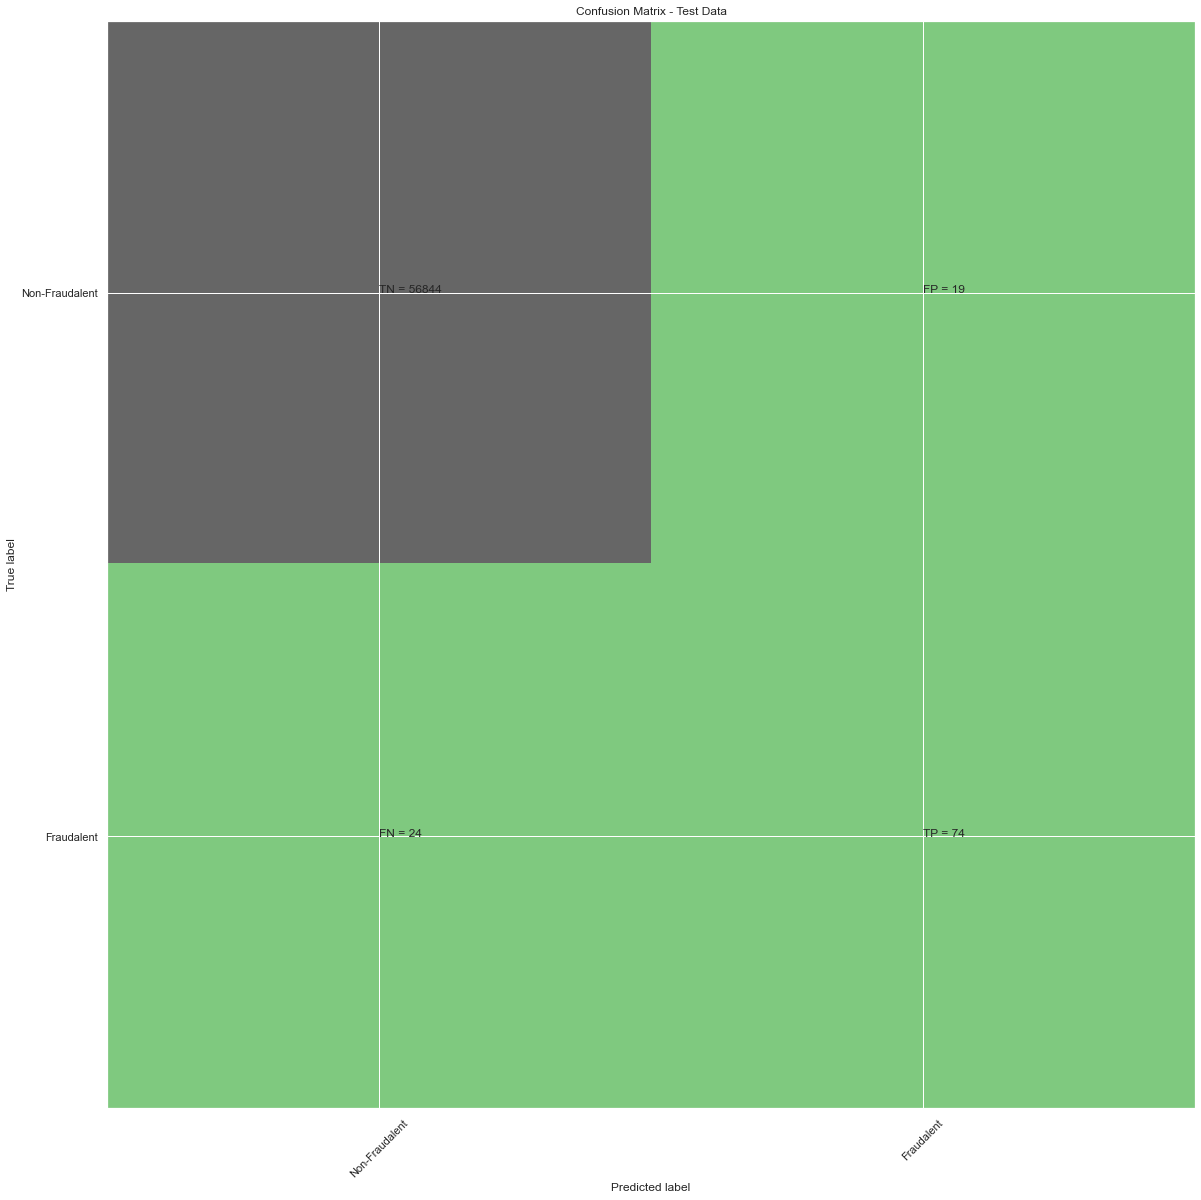

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.76      0.77        98

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8825340856846406
KNN threshold: 0.4
ROC for the test dataset 88.3%


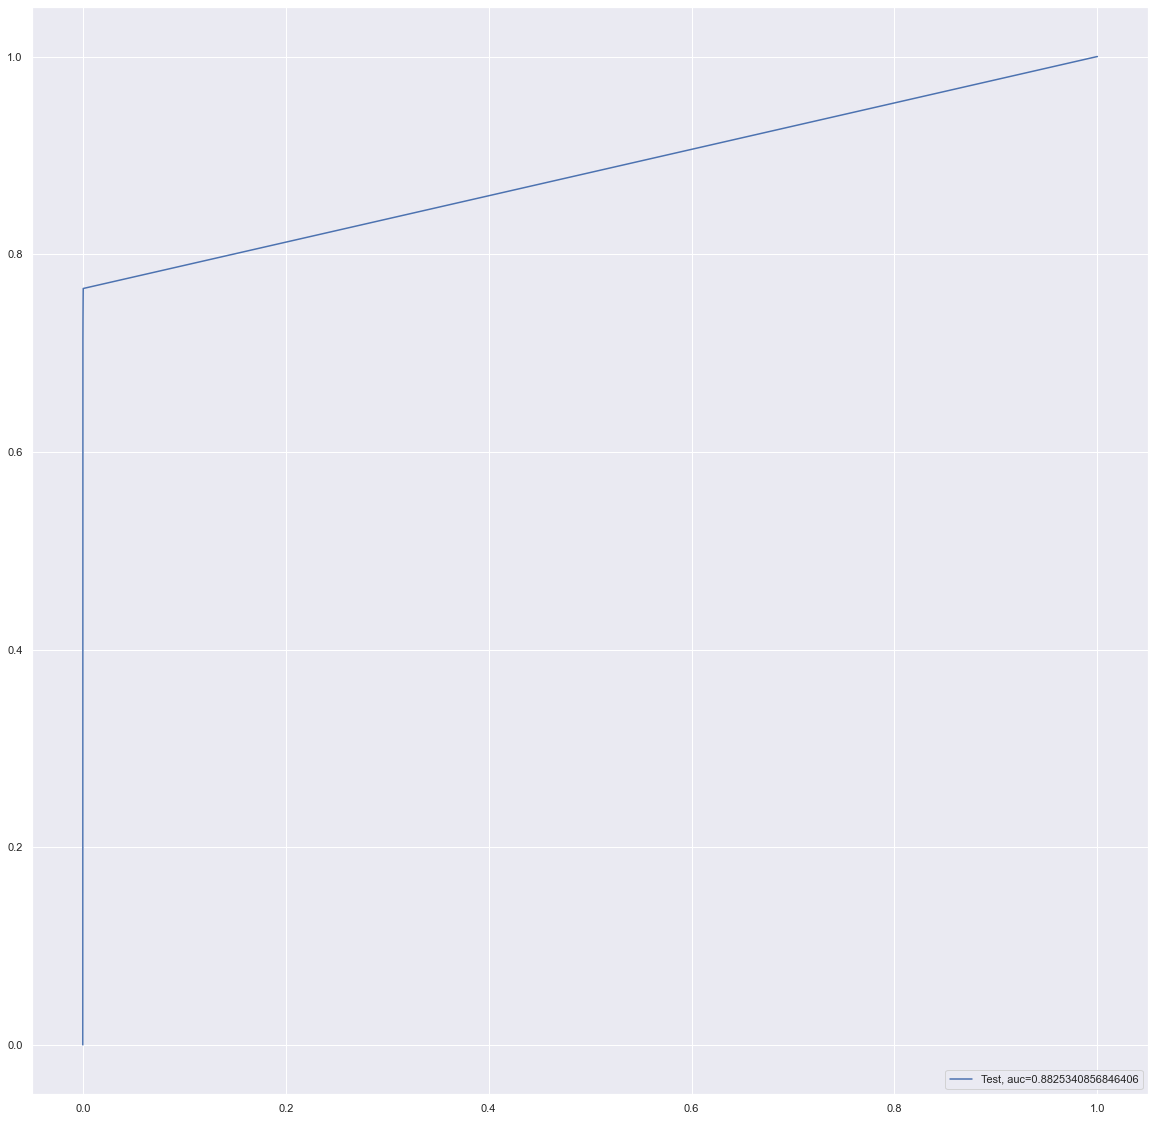

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9990344270641316
Confusion Matrix


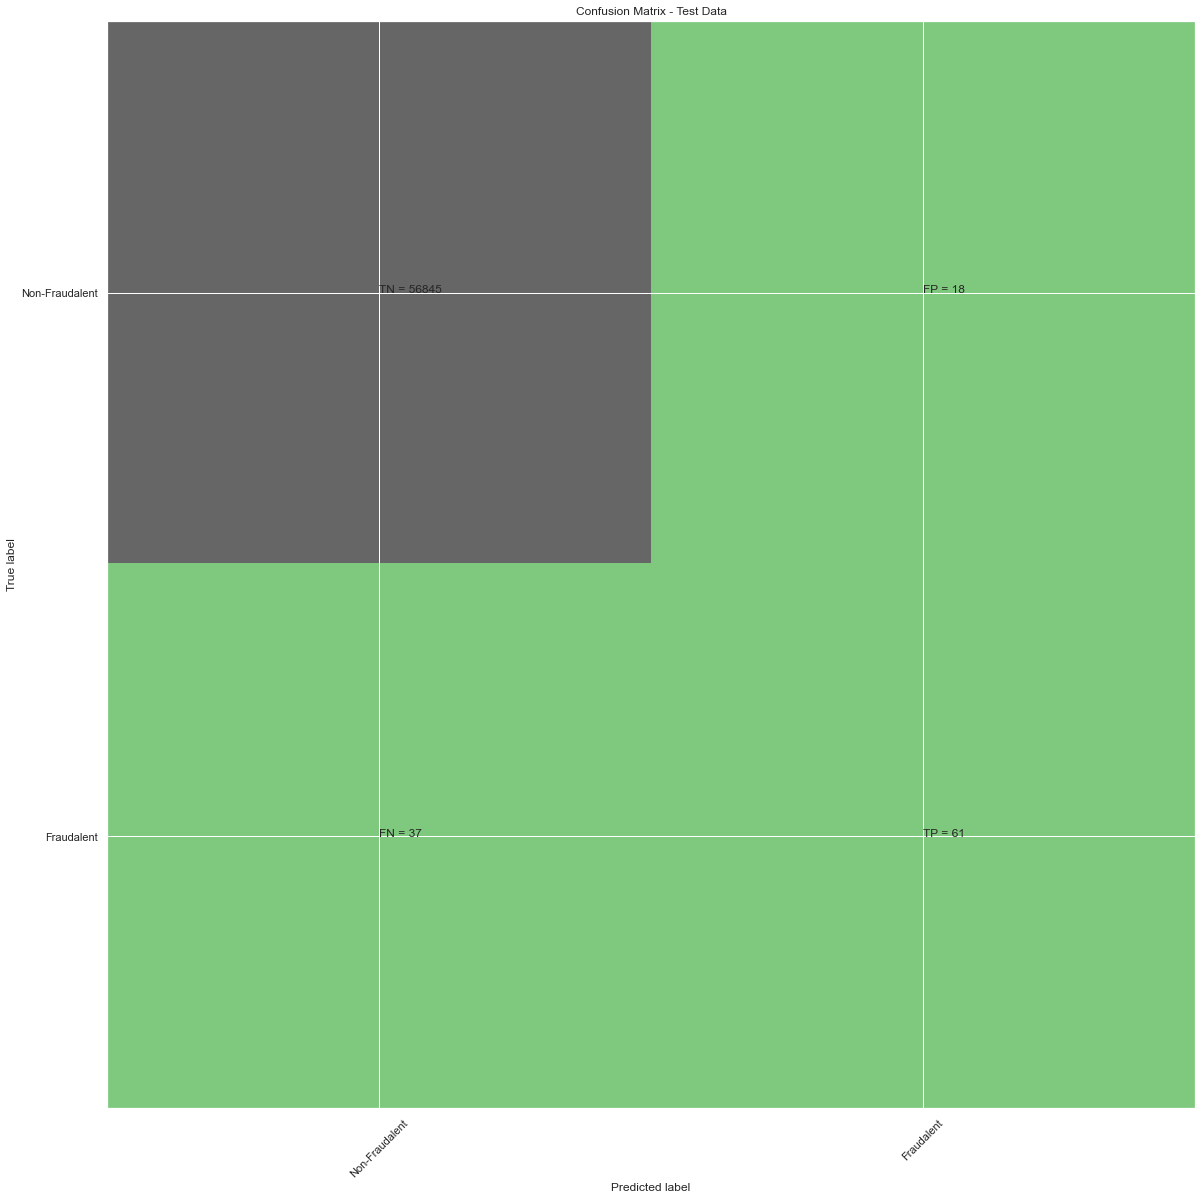

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.77      0.62      0.69        98

    accuracy                           1.00     56961
   macro avg       0.89      0.81      0.84     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8110662146433588
Tree threshold: 1.0
ROC for the test dataset 81.1%


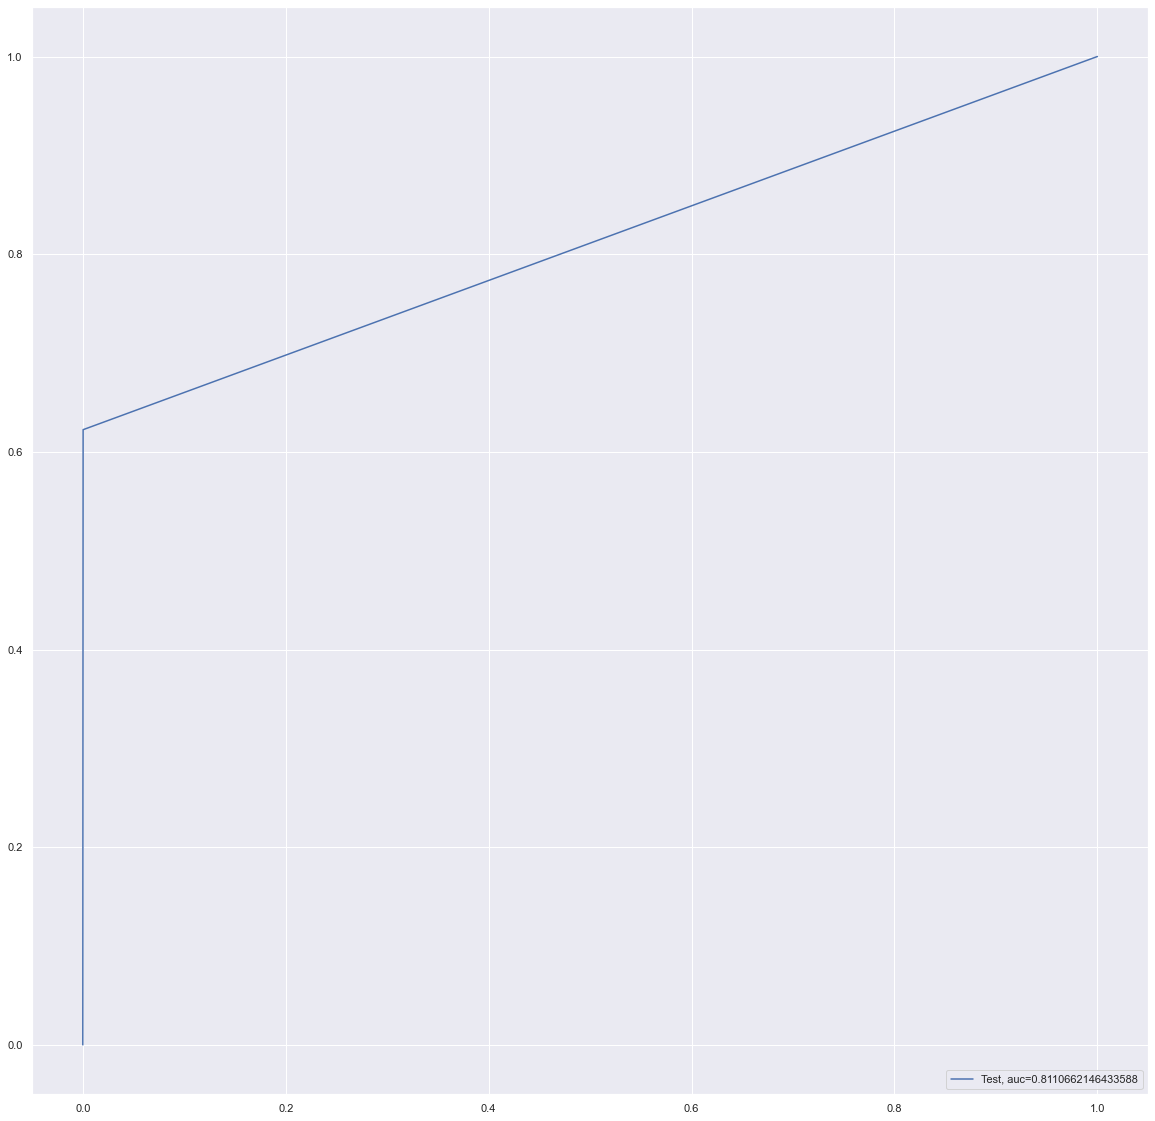

entropy score: 0.9990695388072541
Confusion Matrix


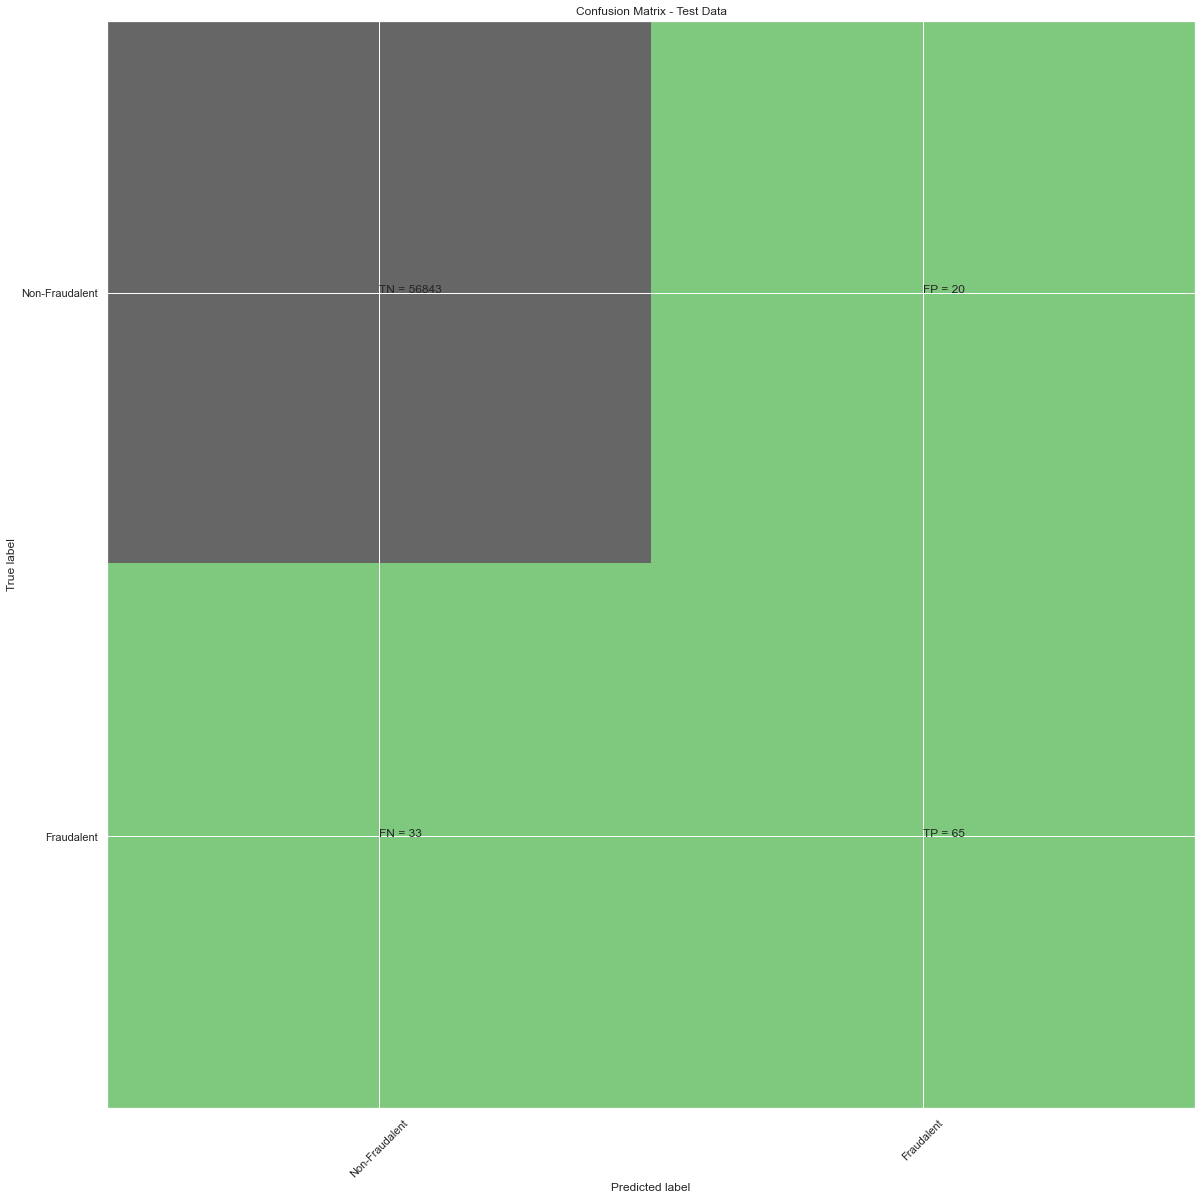

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.76      0.66      0.71        98

    accuracy                           1.00     56961
   macro avg       0.88      0.83      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8314567917806026
Tree threshold: 1.0
ROC for the test dataset 83.1%


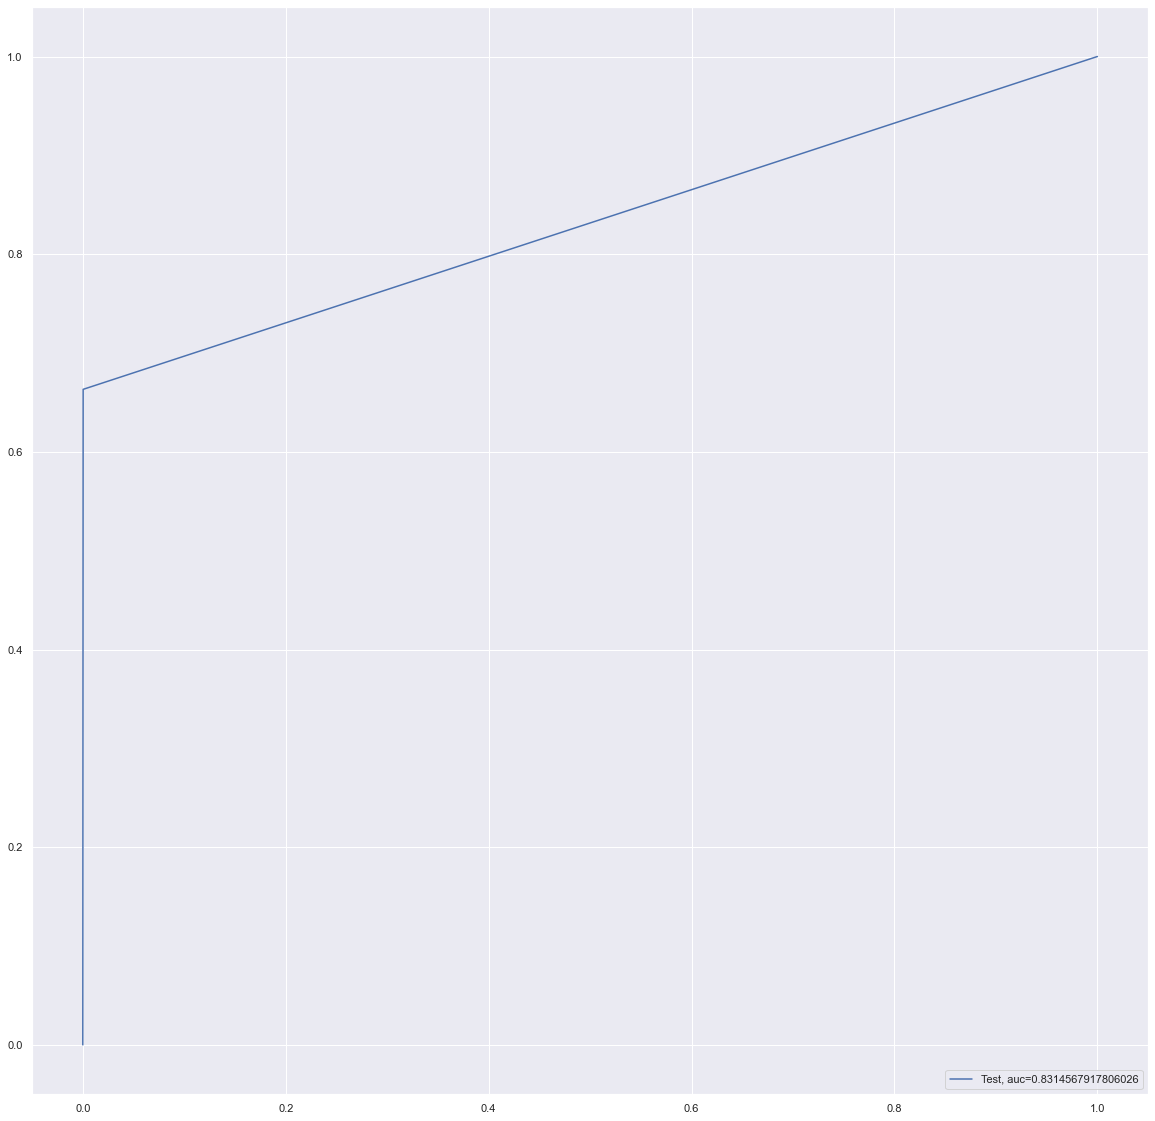

In [113]:


print('-'*80 )
#Run KNN Model
print("KNN Model")
df_Results = KNNModels(df_Results,"Random Oversampling with StratifiedKFold CV ",X_over, y_over, X_test, y_test)

print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = TreeModels(df_Results,"Random Oversampling with StratifiedKFold CV ",X_over, y_over, X_test, y_test)


Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


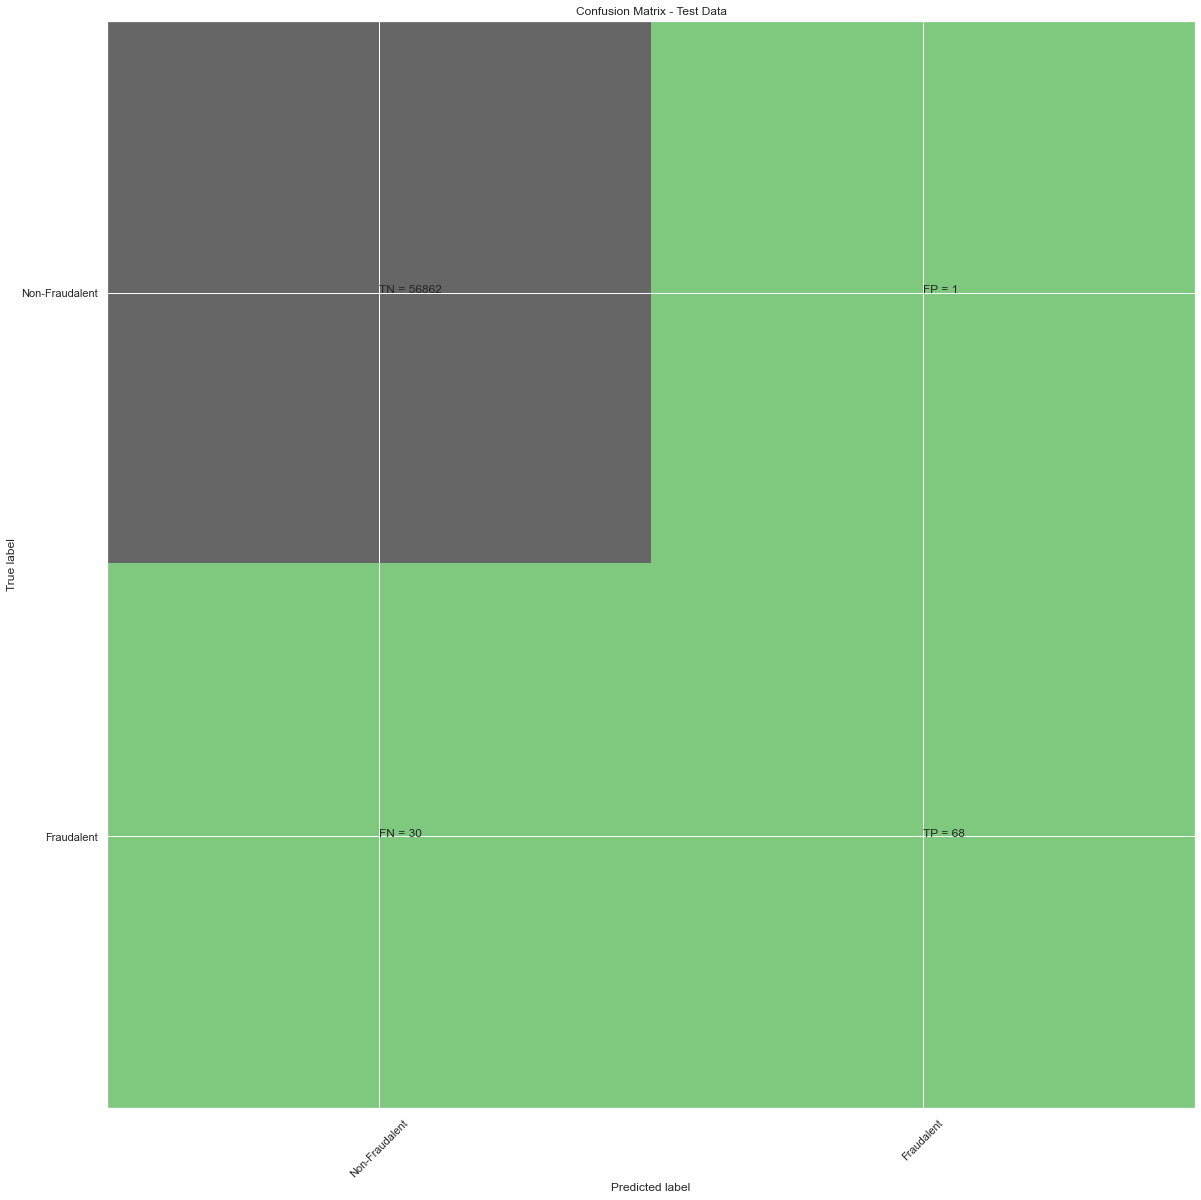

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.947172437728059
Random Forest threshold: 0.01
ROC for the test dataset 94.7%


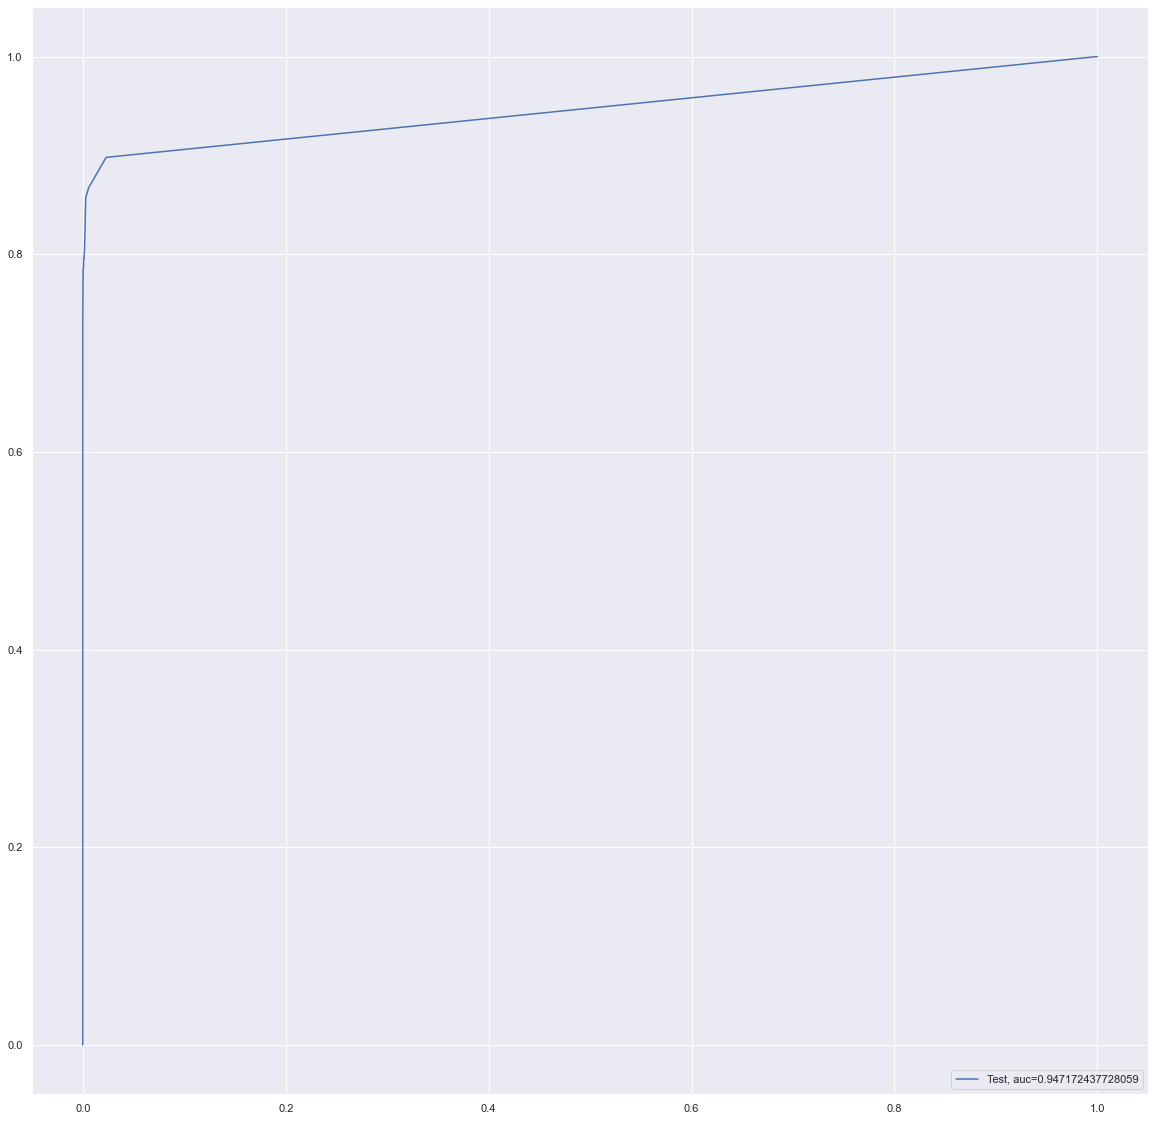

--------------------------------------------------------------------------------
XGBoost Model
[13:36:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.999490879724724
Confusion Matrix


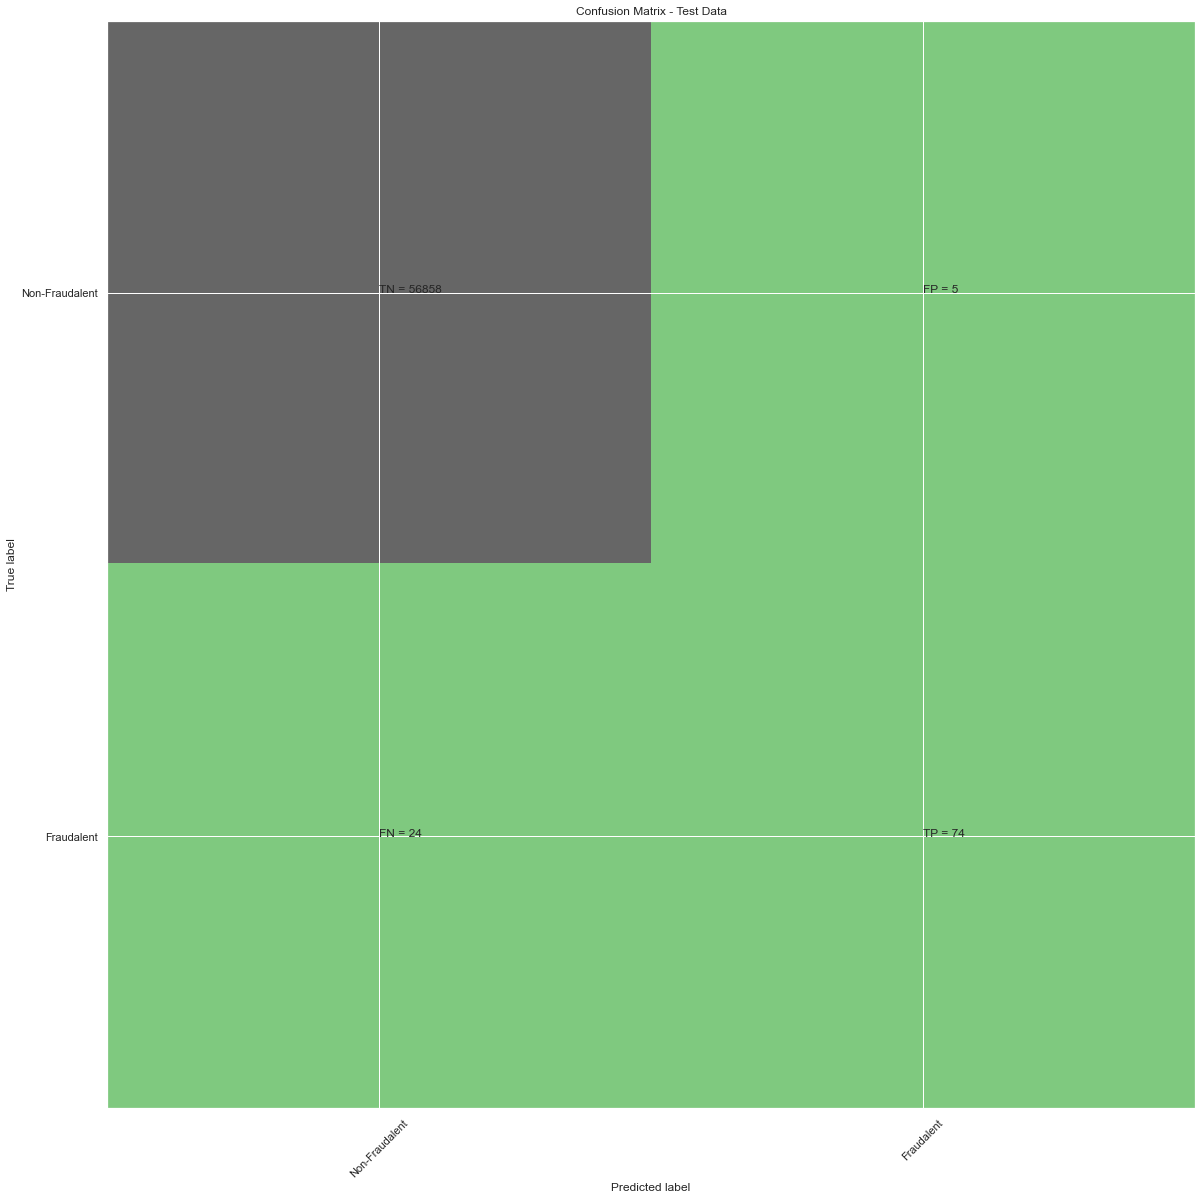

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9773225084135266
XGBoost threshold: 2.5608753276173957e-05
ROC for the test dataset 97.7%


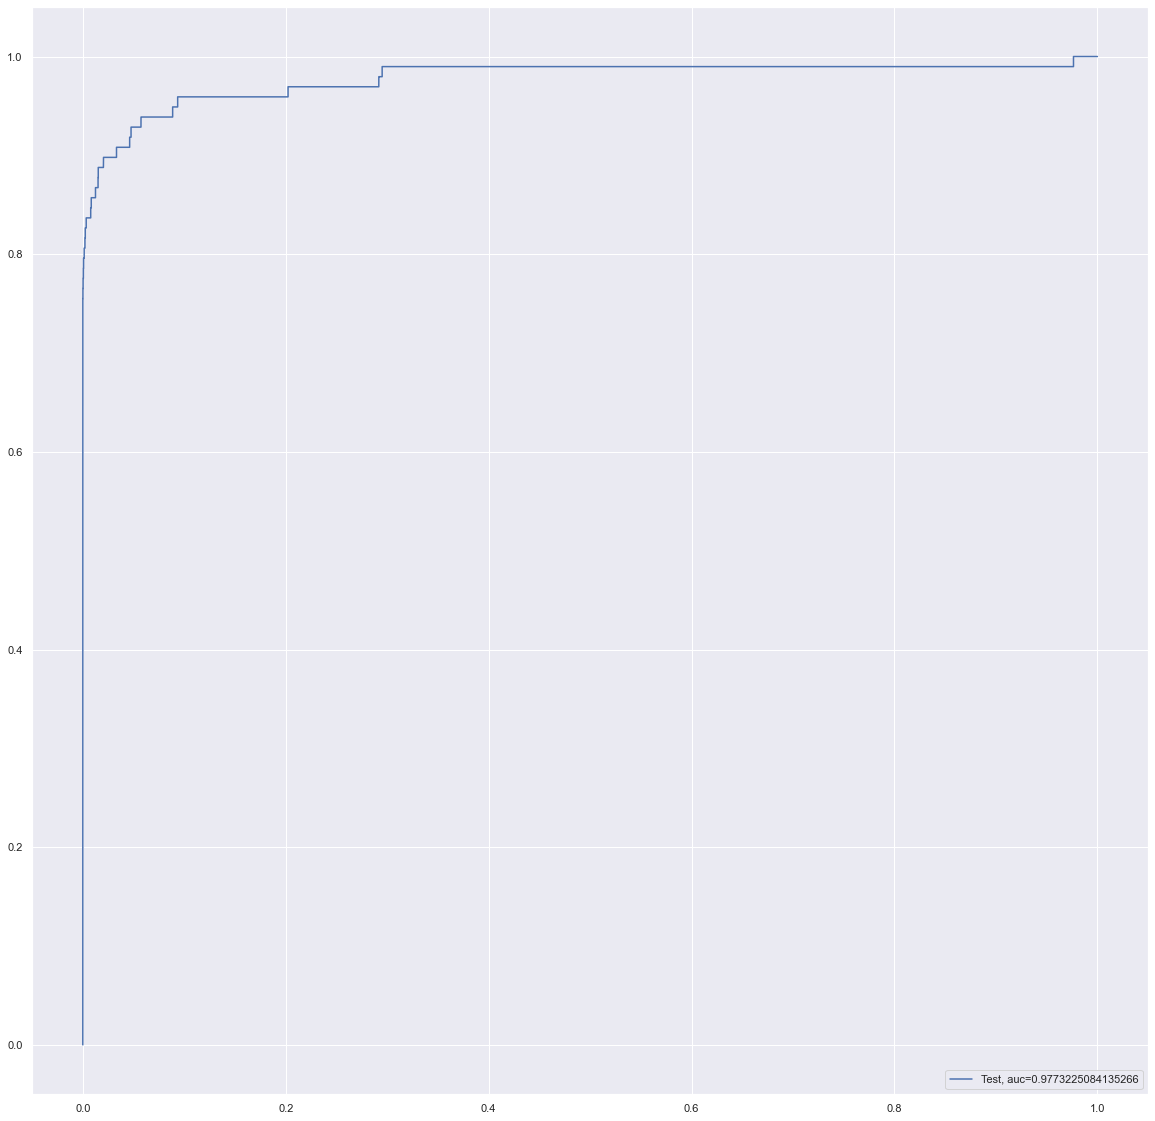

--------------------------------------------------------------------------------


In [114]:
print("Random Forest Model")
df_Results = RandomForestModels(df_Results,"Random Oversampling with StratifiedKFold CV ",X_over, y_over, X_test, y_test)

print('-'*80 )
print("XGBoost Model")

df_Results = XGBoostModels(df_Results,"Random Oversampling with StratifiedKFold CV ",X_over, y_over, X_test, y_test)

print('-'*80 )

#print("SVM Model with Sigmoid Kernel")

#df_Results = SVMModels(df_Results,"Random Oversampling with StratifiedKFold CV ",X_over, y_over, X_test, y_test)


### Print the class distribution after applying SMOTE 

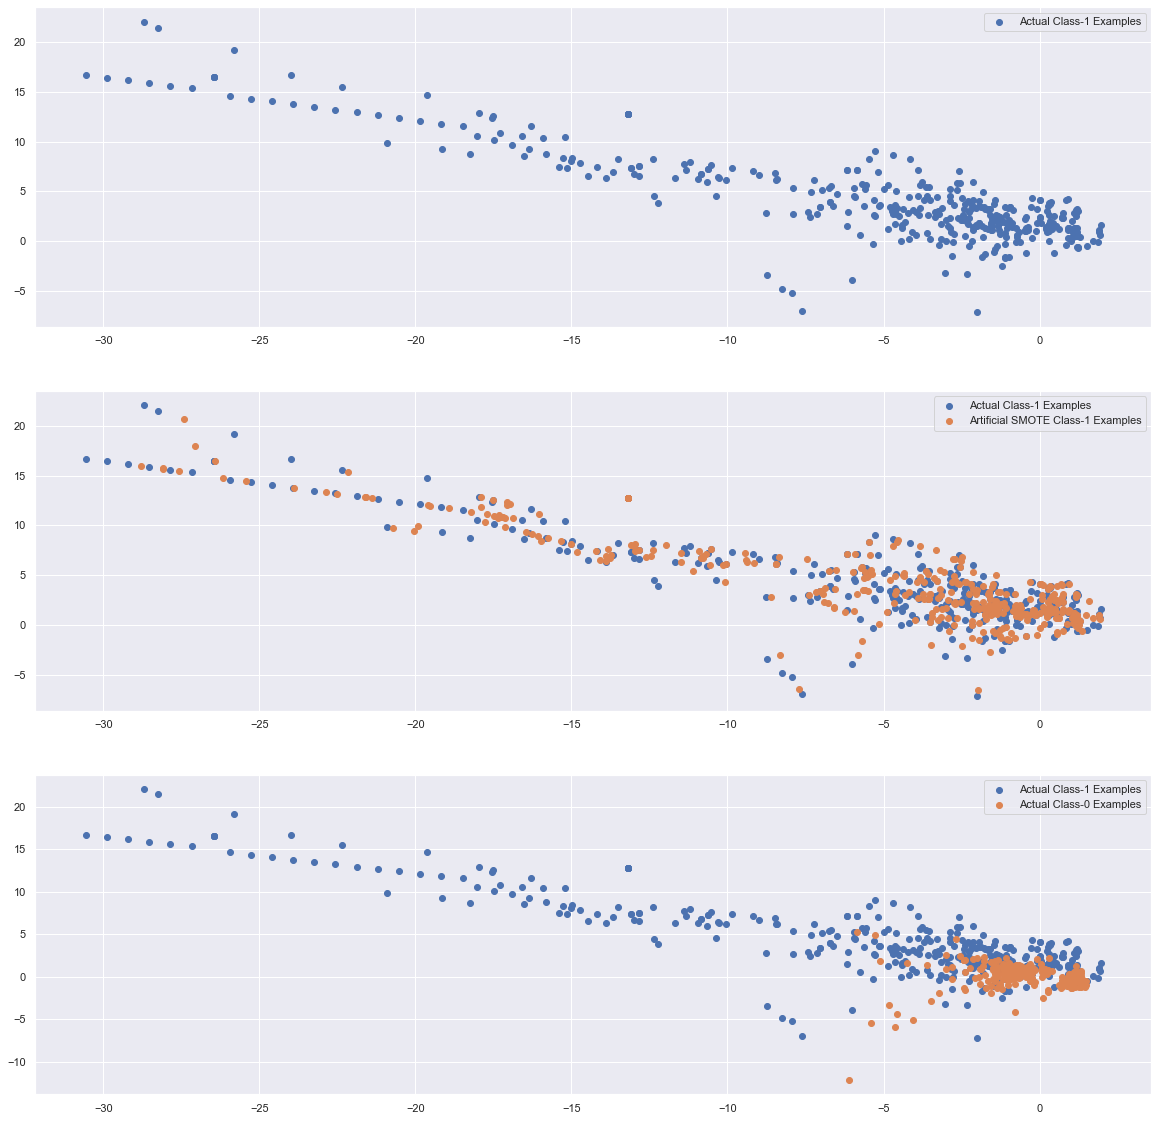

In [115]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [116]:

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)
#create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [117]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

y_pred_smote = logreg.predict(X_test)


print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_smote))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_smote)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_smote)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_smote)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_smote)))

Accuracy :0.97839
AUC : 0.93315
Precision : 0.06656
Recall : 0.88776
F1 : 0.12384


AUC -  0.9331500129024756 



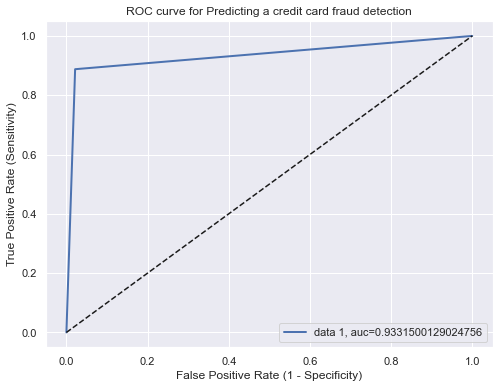

In [118]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_smote)

auc = metrics.roc_auc_score(y_test, y_pred_smote)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

f1=0.124


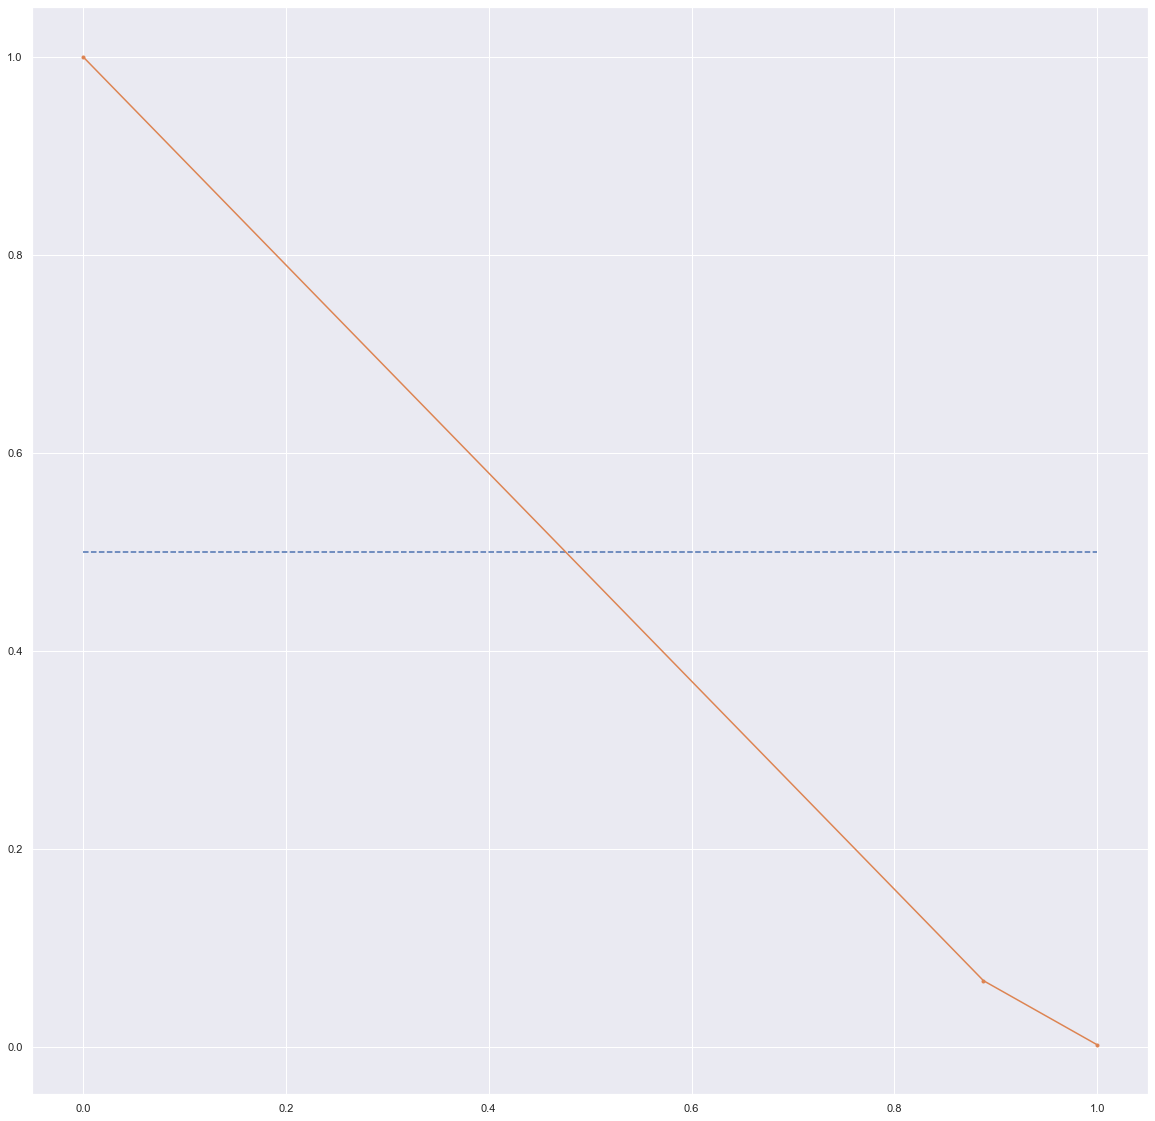

In [119]:
# calculate precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_smote)

# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred_smote)
print('f1=%.3f' % (f1))

# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')

# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

# show the plot
plt.show()

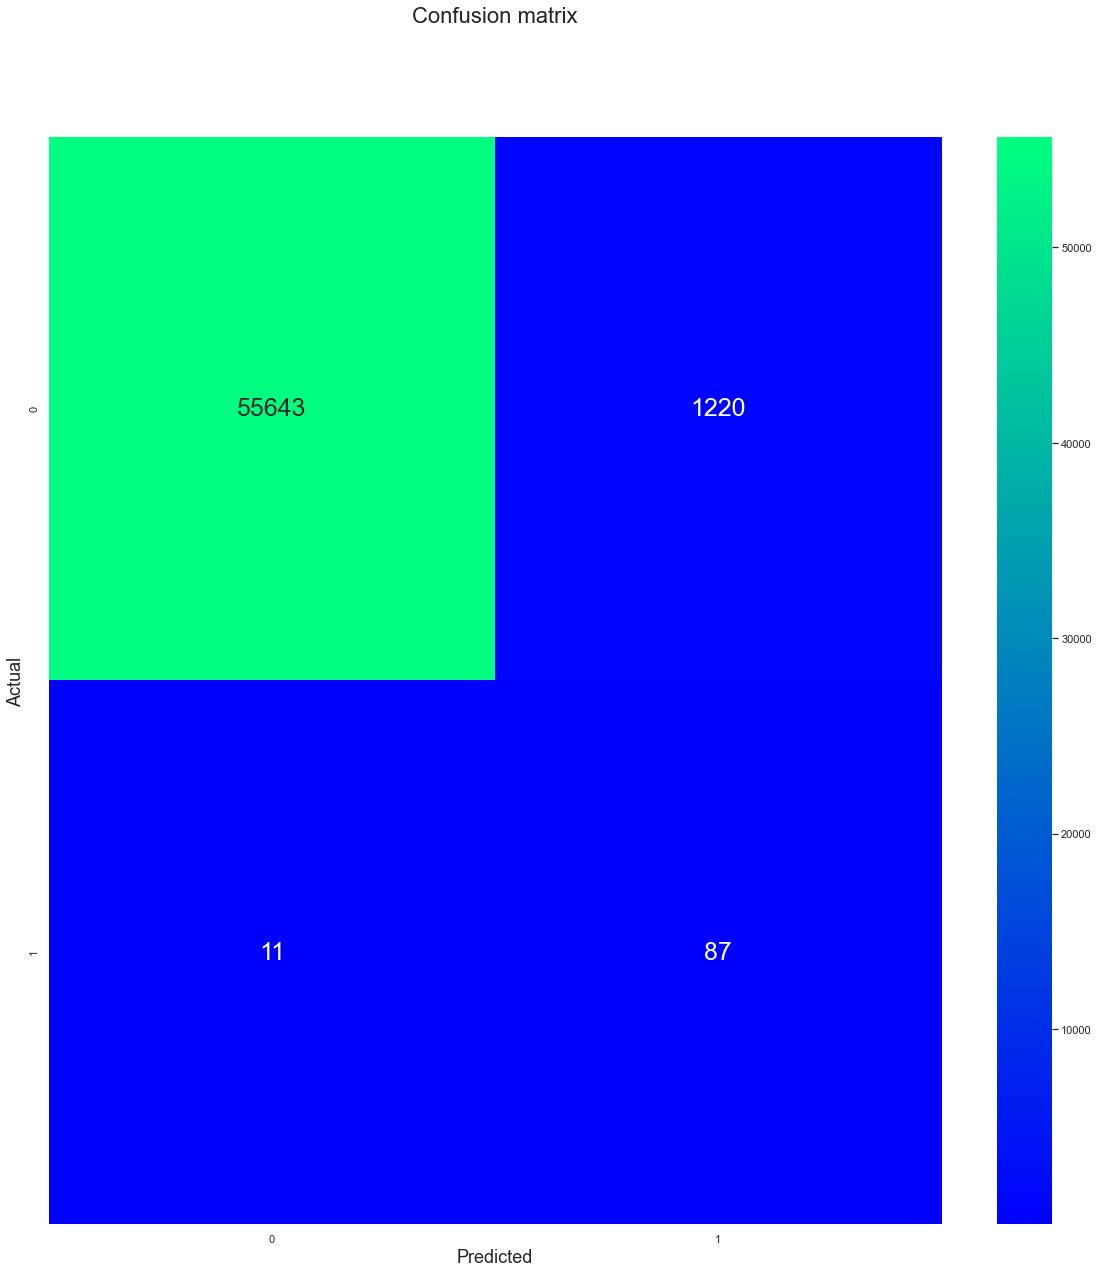

In [120]:
# Heatmap for Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test , y_pred_smote)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


plt.show()

KNN Model
model score
0.9984726391741718
Confusion Matrix


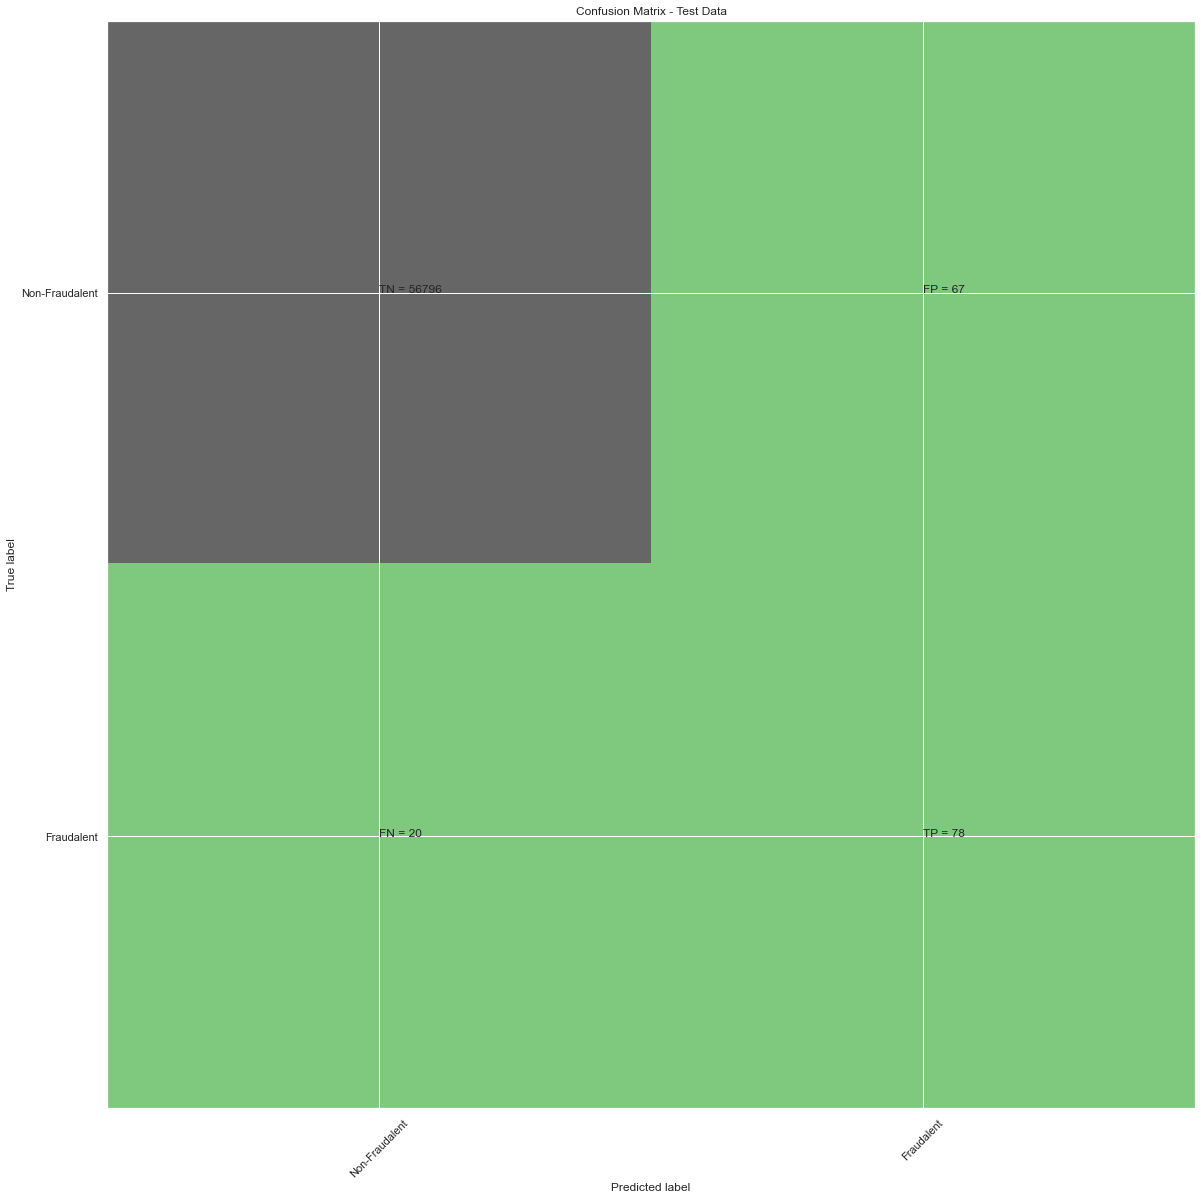

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.54      0.80      0.64        98

    accuracy                           1.00     56961
   macro avg       0.77      0.90      0.82     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9077900087105168
KNN threshold: 0.2
ROC for the test dataset 90.8%


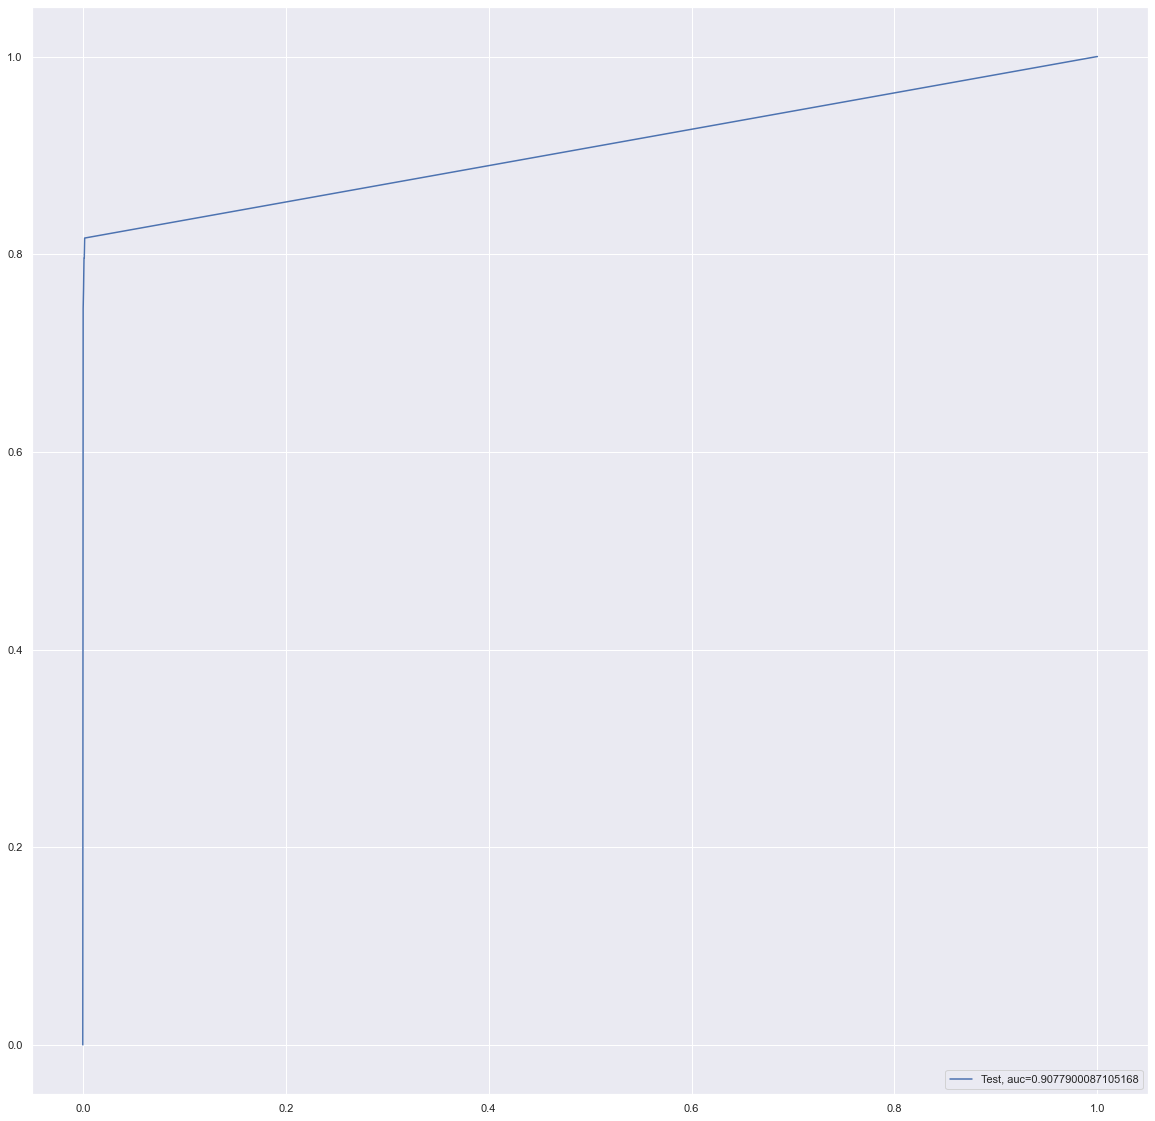

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9973841751373747
Confusion Matrix


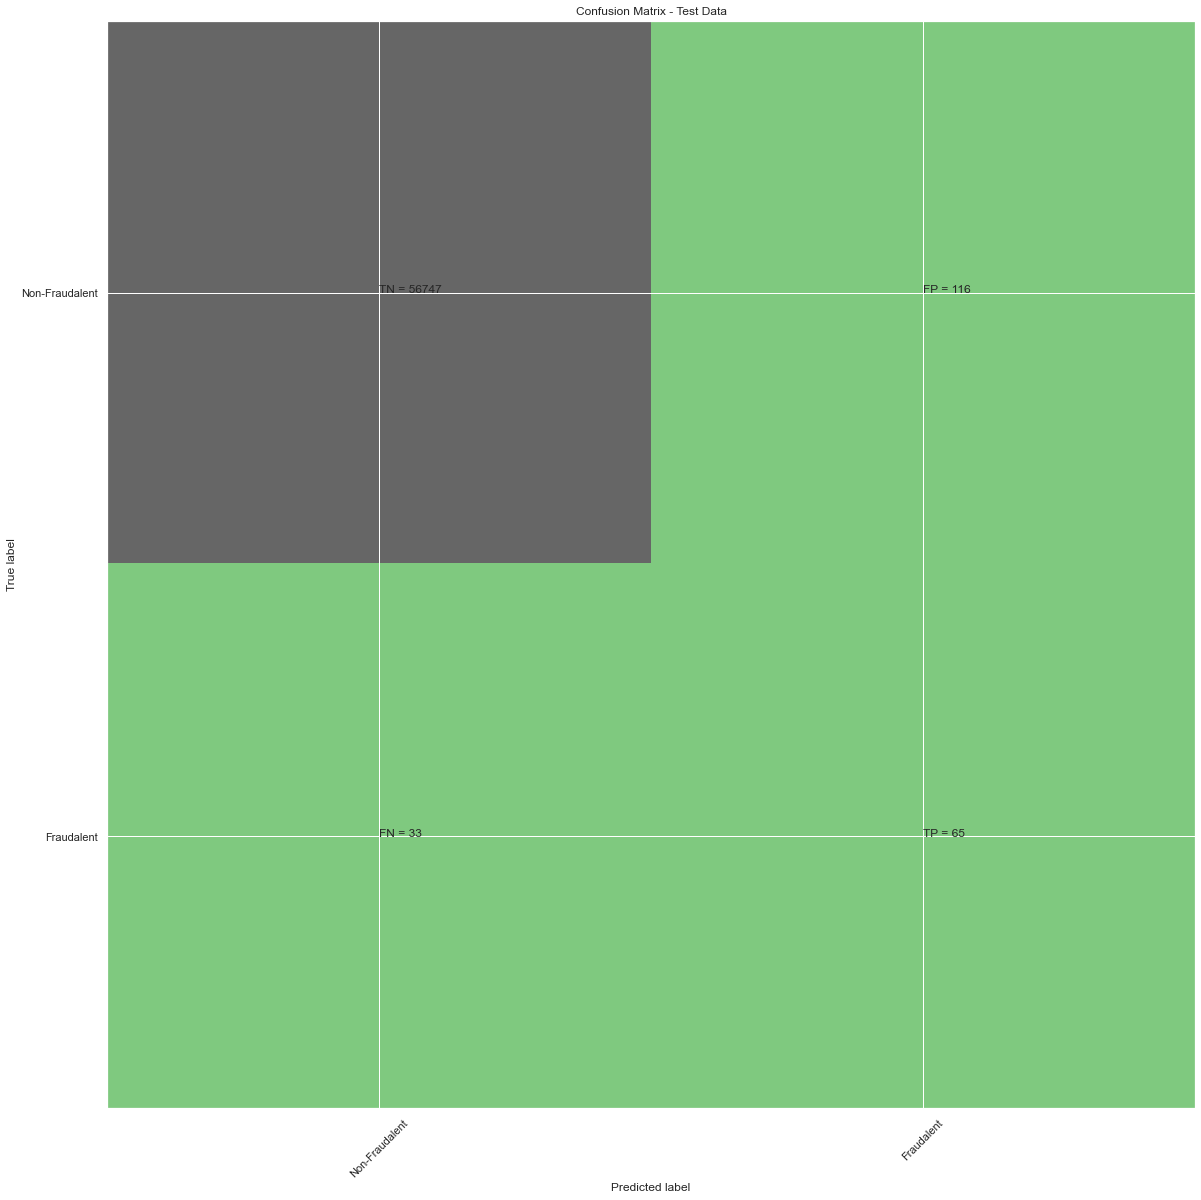

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.36      0.66      0.47        98

    accuracy                           1.00     56961
   macro avg       0.68      0.83      0.73     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8306126576336177
Tree threshold: 1.0
ROC for the test dataset 83.1%


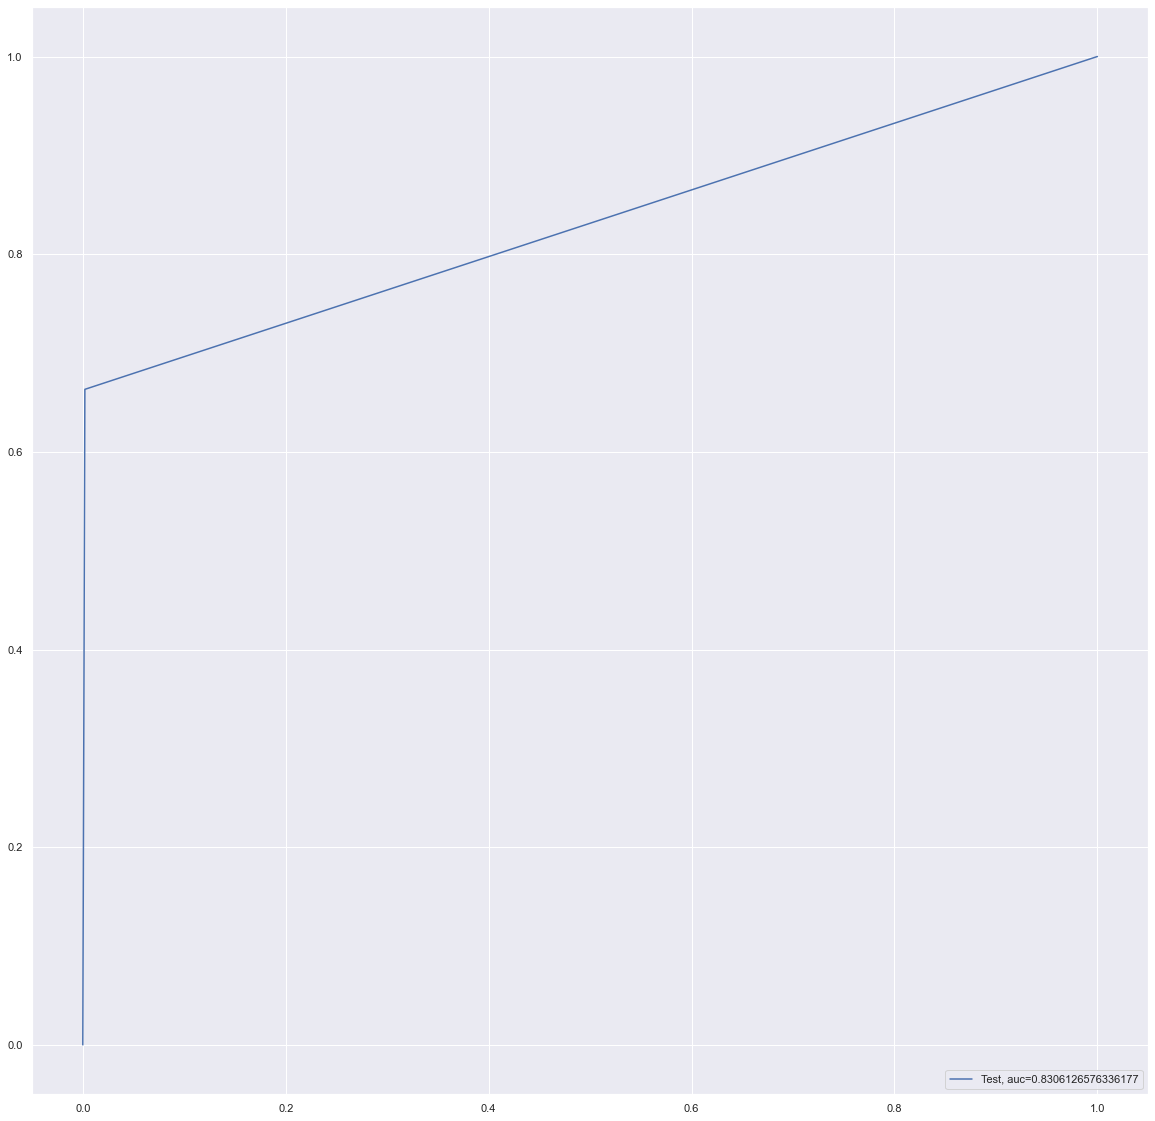

entropy score: 0.9979459630273345
Confusion Matrix


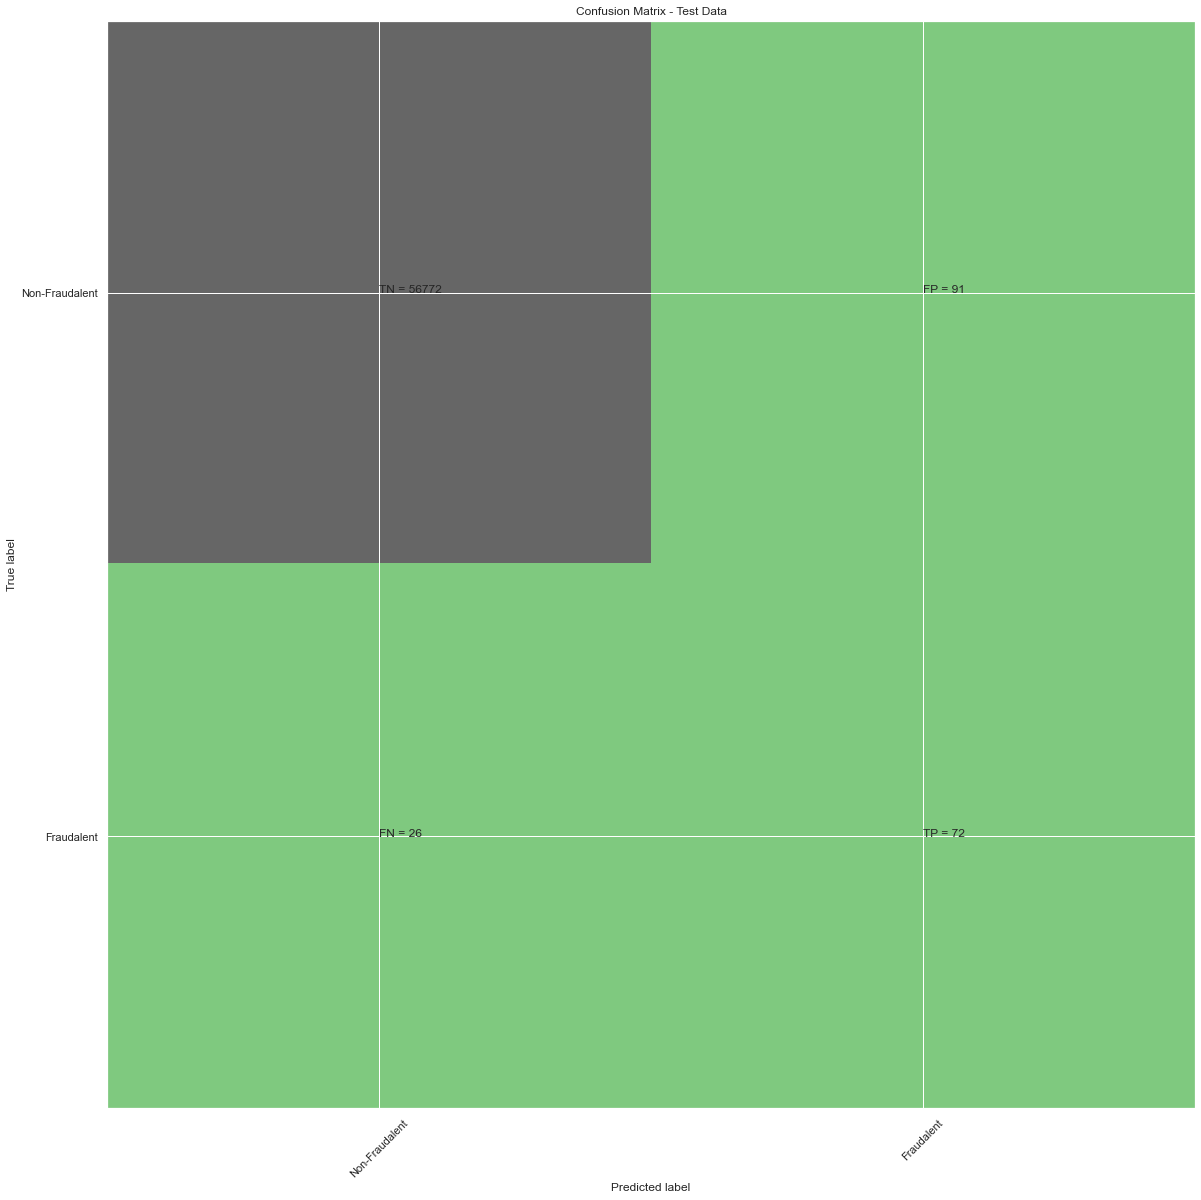

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.44      0.73      0.55        98

    accuracy                           1.00     56961
   macro avg       0.72      0.87      0.78     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8665467699486809
Tree threshold: 1.0
ROC for the test dataset 86.7%


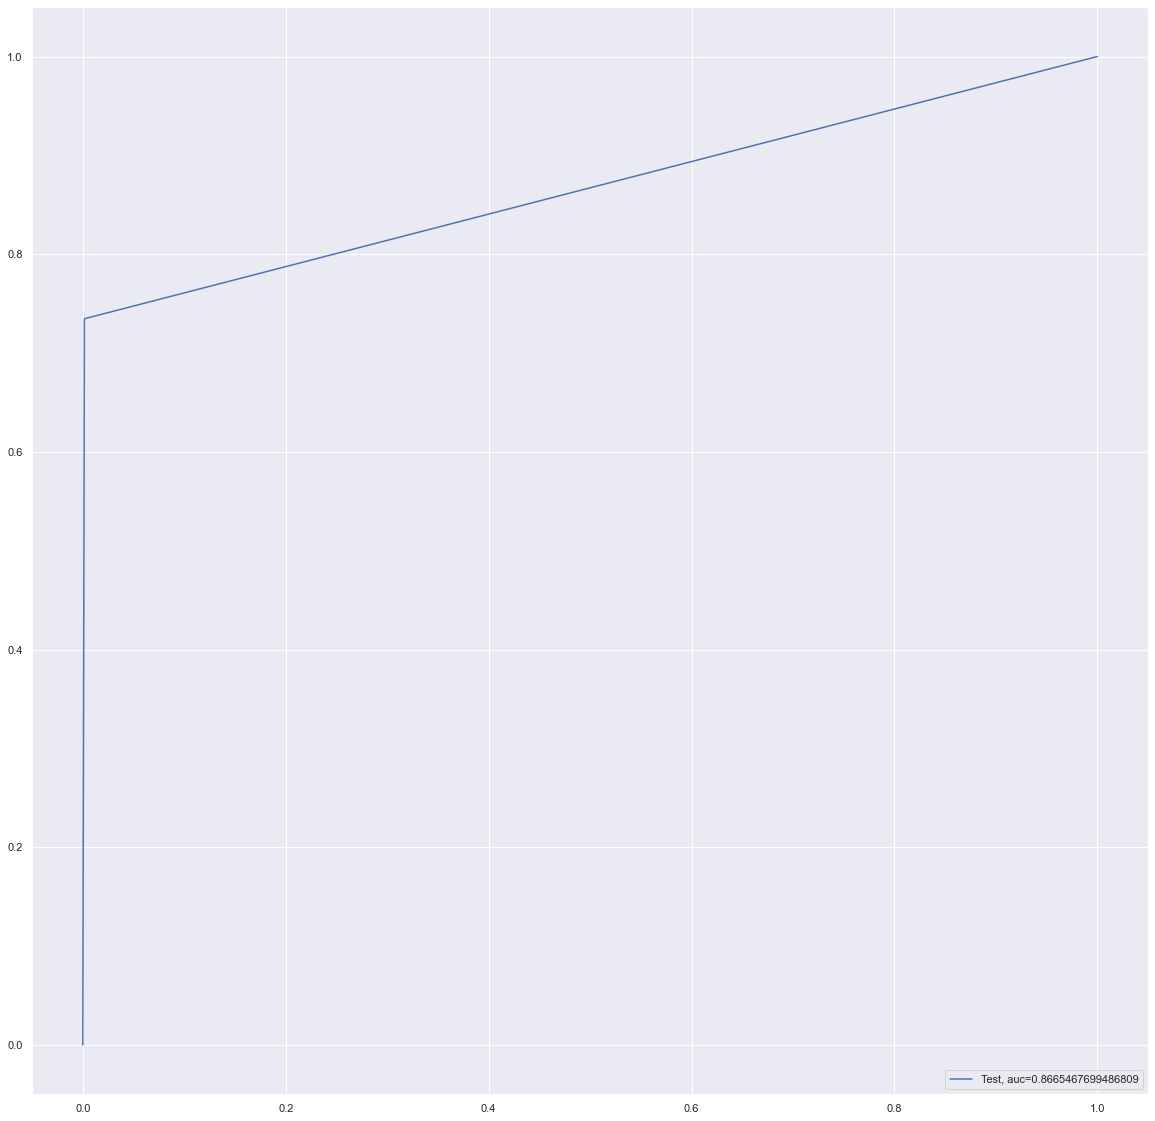

--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999420656238479
Confusion Matrix


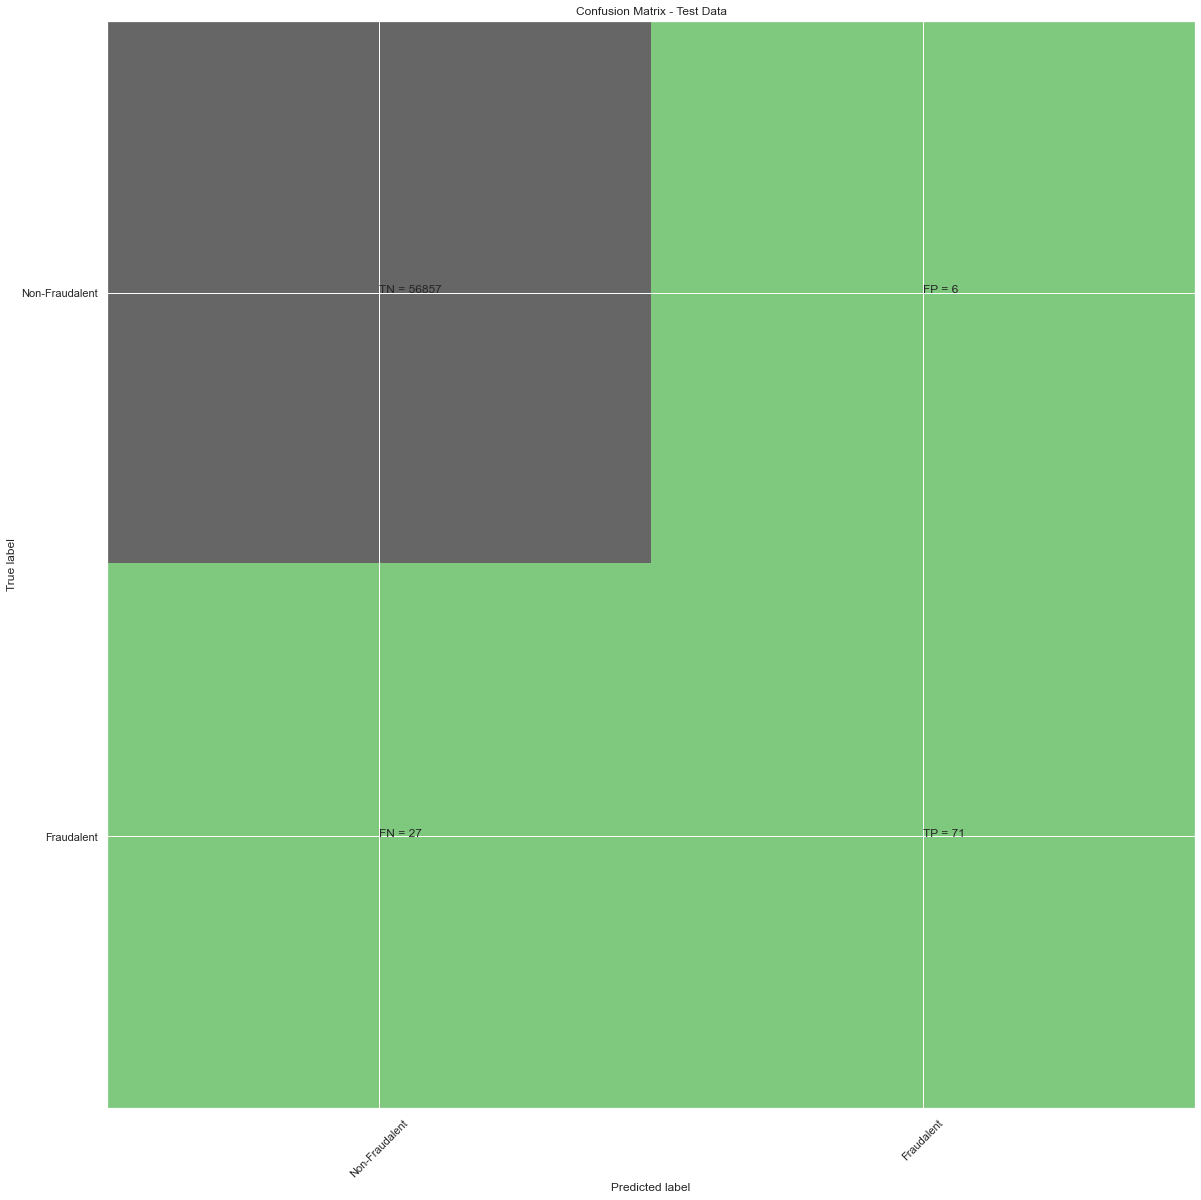

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.72      0.81        98

    accuracy                           1.00     56961
   macro avg       0.96      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9569166780019431
Random Forest threshold: 0.03
ROC for the test dataset 95.7%


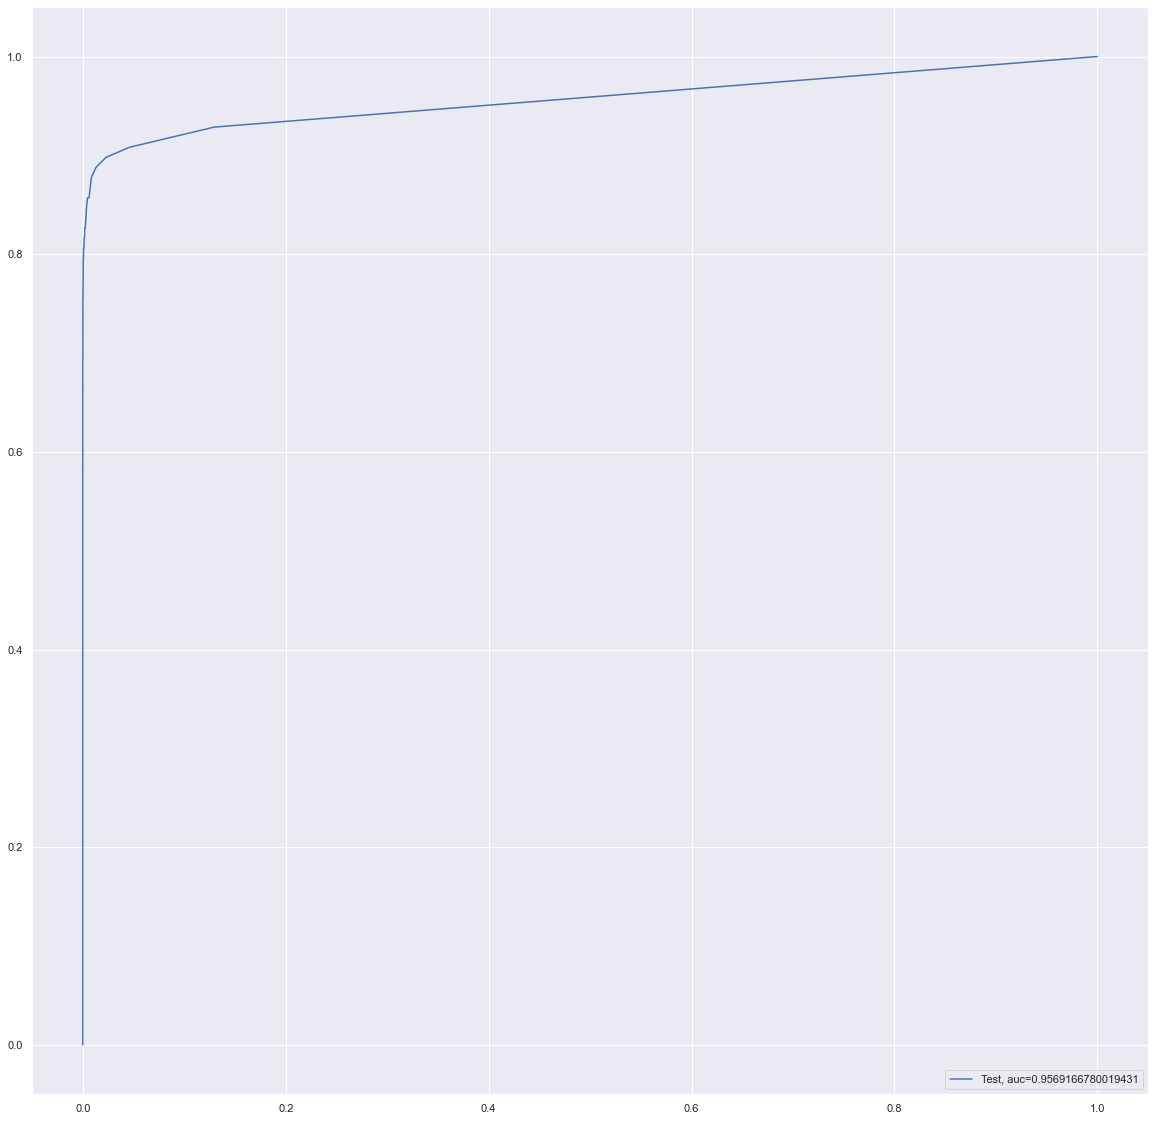

--------------------------------------------------------------------------------
XGBoost Model
[14:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9992626533944278
Confusion Matrix


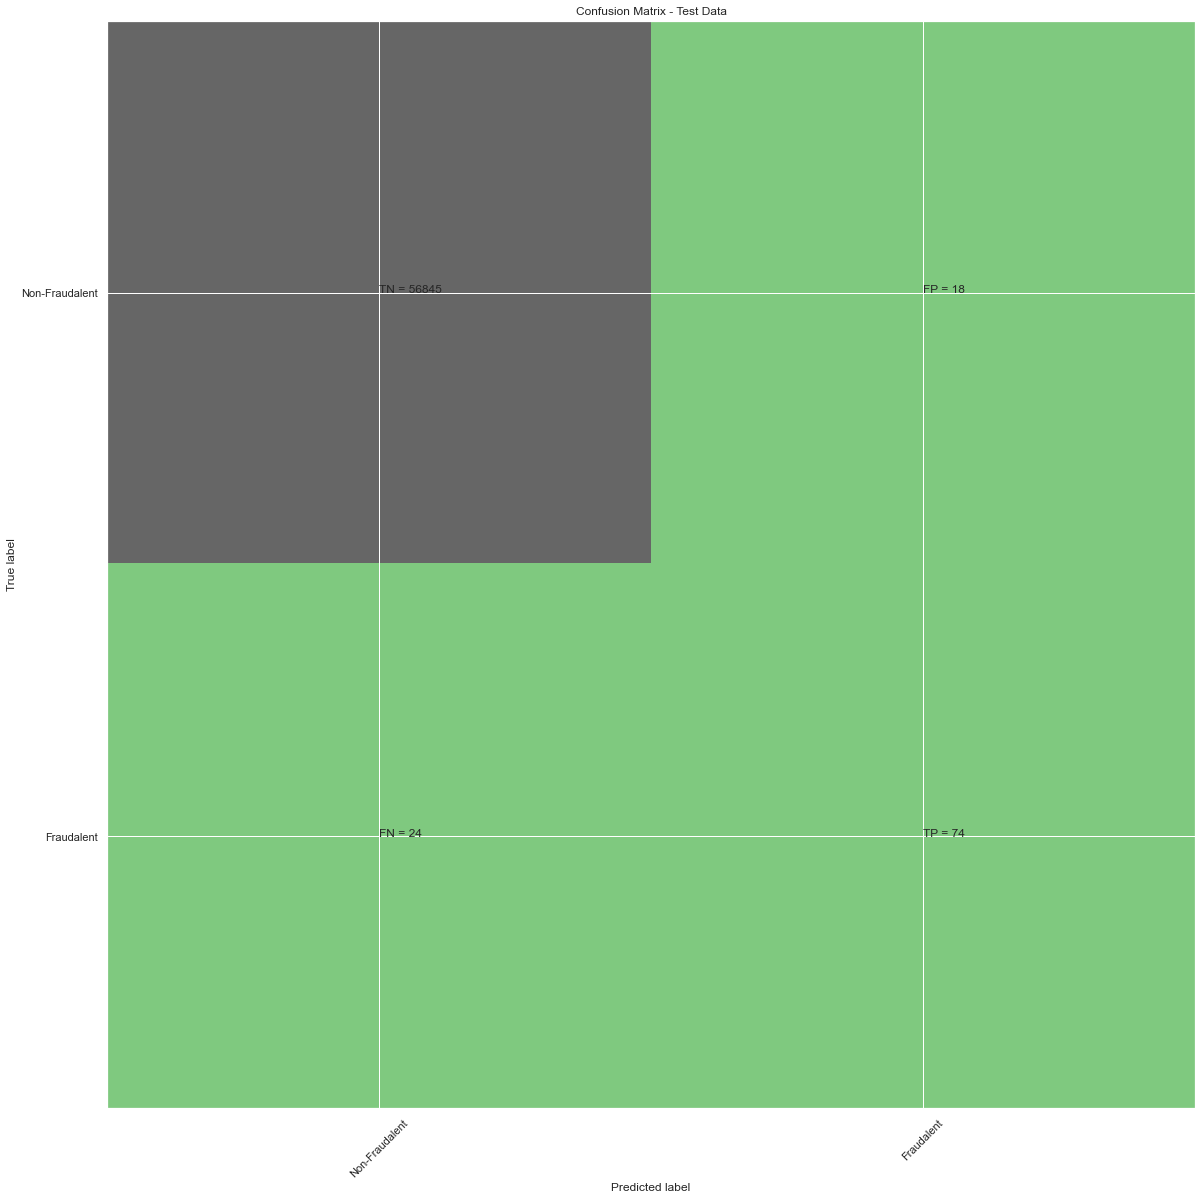

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.80      0.76      0.78        98

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9651694172208389
XGBoost threshold: 0.0002420855307718739
ROC for the test dataset 96.5%


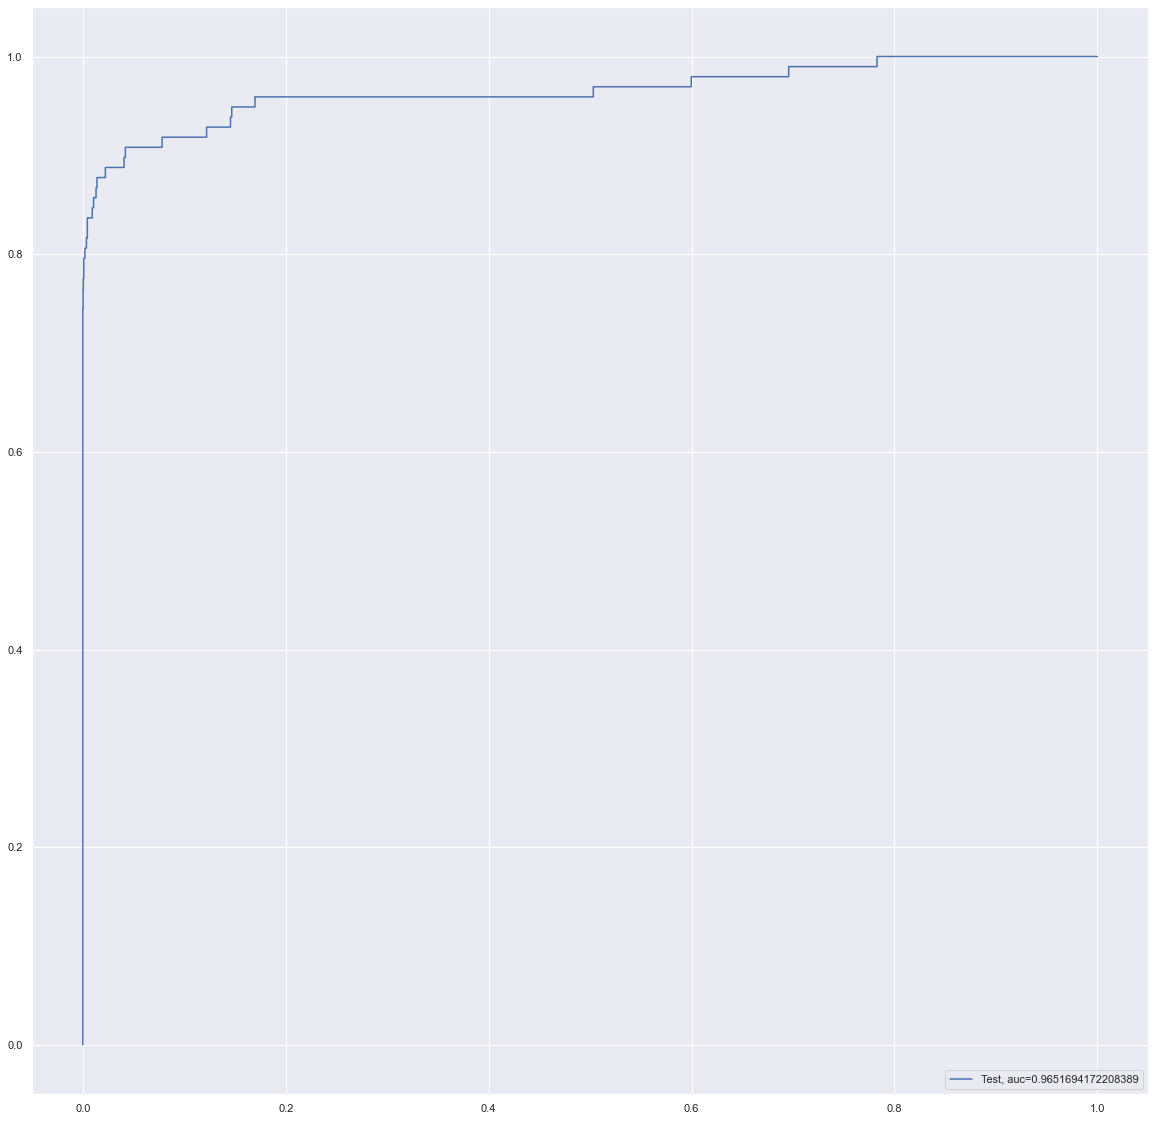

--------------------------------------------------------------------------------


In [121]:


print("KNN Model")
df_Results = KNNModels(df_Results,"smote Oversampling with StratifiedKFold CV ",X_train_Smote, y_train_Smote , X_test, y_test)

print('-'*80 )
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = TreeModels(df_Results,"smote Oversampling with StratifiedKFold CV ",X_train_Smote, y_train_Smote , X_test, y_test)

print('-'*80 )

print("Random Forest Model")
df_Results = RandomForestModels(df_Results,"smote Oversampling with StratifiedKFold CV ",X_train_Smote, y_train_Smote , X_test, y_test)

print('-'*80 )
print("XGBoost Model")

df_Results = XGBoostModels(df_Results,"smote Oversampling with StratifiedKFold CV ",X_train_Smote, y_train_Smote , X_test, y_test)

print('-'*80 )
#Run SVM Model with Sigmoid Kernel
#print("SVM Model with Sigmoid Kernel")

##### Build models on other algorithms to see the better performing on SMOTE

In [122]:
df_Results

Data_Imbalance_Handiling  \
0                                      imbalance   
1                                      imbalance   
2                                      imbalance   
3                                      imbalance   
4                                      imbalance   
5                                      imbalance   
6                              power Transformer   
7                              power Transformer   
8                              power Transformer   
9                              power Transformer   
10                             power Transformer   
11                             power Transformer   
12  Random Oversampling with StratifiedKFold CV    
13  Random Oversampling with StratifiedKFold CV    
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16  Random Oversampling with StratifiedKFold CV    
17   smote Oversampling with StratifiedKFold CV    
18   smote Oversampling with StratifiedKFold CV    
19   smote Oversampling with StratifiedKFold CV    
20   smote Oversampling with StratifiedKFold CV    
21   smote Oversampling with StratifiedKFold CV    

                               Model  Accuracy  roc_value  threshold  
0                                KNN  0.999649   0.947283   0.200000  
1      Tree Model with gini criteria  0.999298   0.933969   1.000000  
2   Tree Model with entropy criteria  0.999166   0.907631   1.000000  
3                      Random Forest  0.999737   0.959377   0.020000  
4                            XGBoost  0.999693   0.998349   0.000264  
5                                SVM  0.997805   0.750547   0.000992  
6                                KNN  0.999333   0.900839   0.200000  
7      Tree Model with gini criteria  0.998999   0.874710   1.000000  
8   Tree Model with entropy criteria  0.999105   0.864364   1.000000  
9                      Random Forest  0.999350   0.925011   0.010000  
10                           XGBoost  0.999456   0.978537   0.000074  
11                               SVM  0.998578   0.884296   0.001132  
12                               KNN  0.999245   0.882534   0.400000  
13     Tree Model with gini criteria  0.999034   0.811066   1.000000  
14  Tree Model with entropy criteria  0.999070   0.831457   1.000000  
15                     Random Forest  0.999456   0.947172   0.010000  
16                           XGBoost  0.999491   0.977323   0.000026  
17                               KNN  0.998473   0.907790   0.200000  
18     Tree Model with gini criteria  0.997384   0.830613   1.000000  
19  Tree Model with entropy criteria  0.997946   0.866547   1.000000  
20                     Random Forest  0.999421   0.956917   0.030000  
21                           XGBoost  0.999263   0.965169   0.000242

### Print the class distribution after applying ADASYN

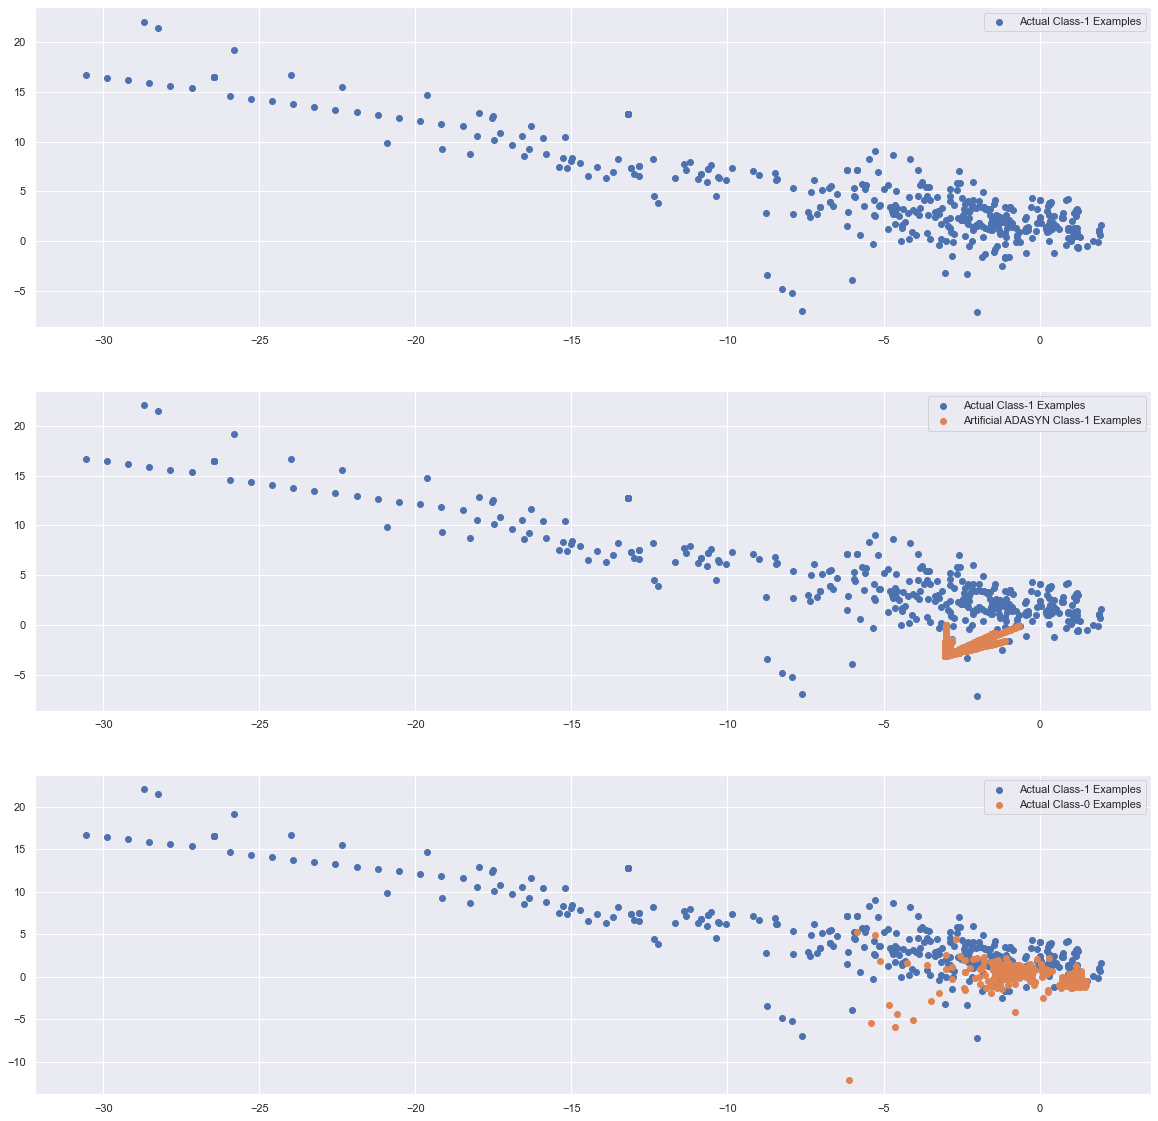

In [123]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##### Build models on other algorithms to see the better performing on ADASYN

In [126]:
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ada = over_sampling.ADASYN(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ada.fit_resample(X_train,y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

KNN Model
model score
0.9984726391741718
Confusion Matrix


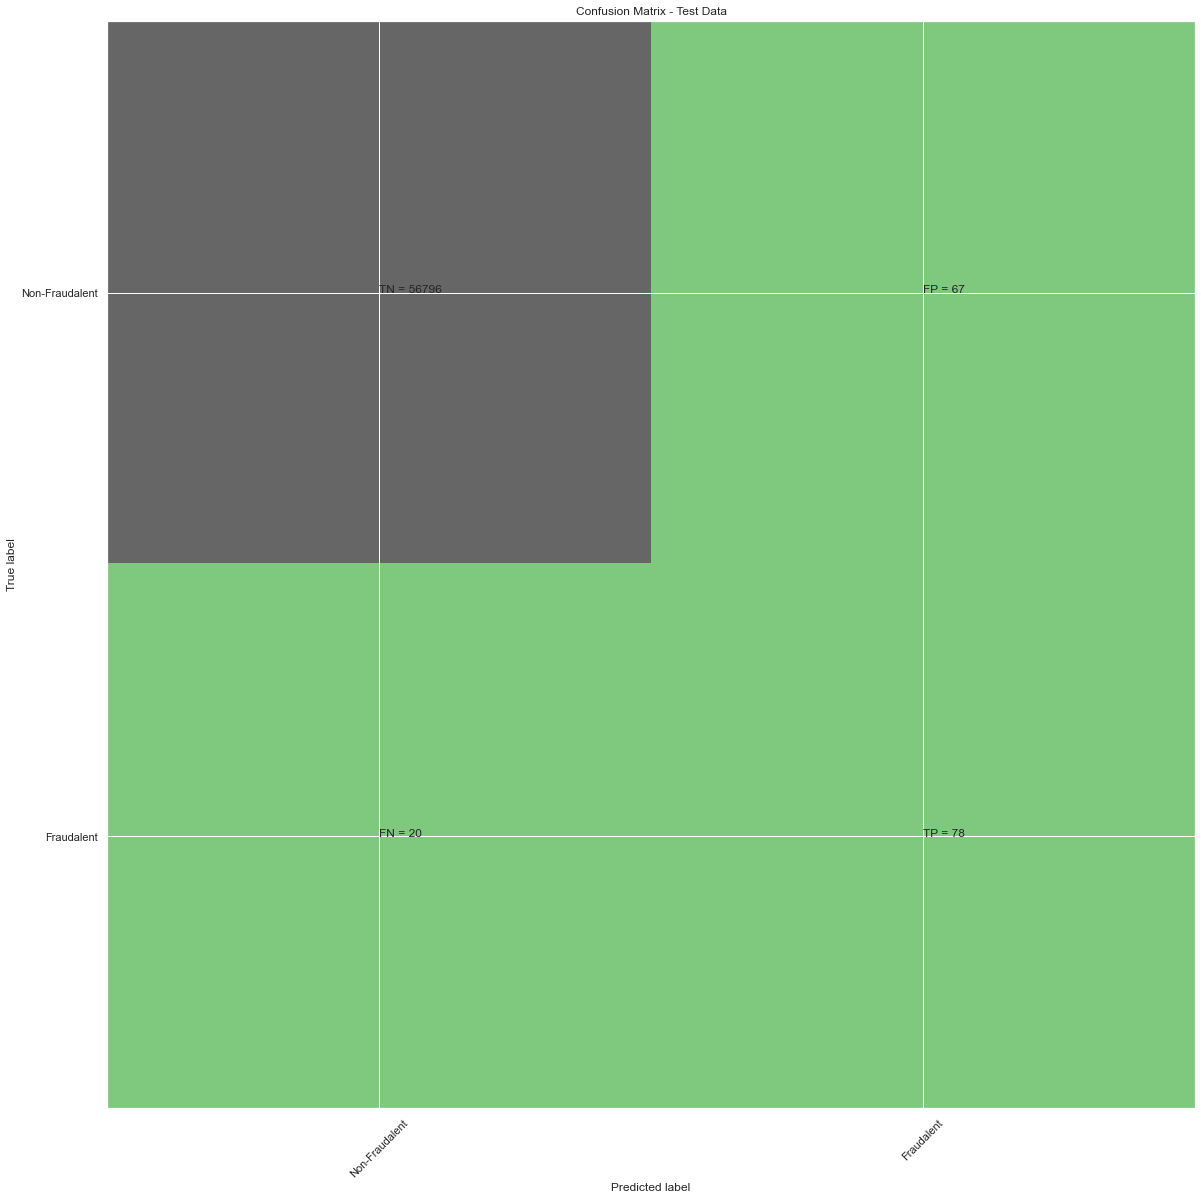

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.54      0.80      0.64        98

    accuracy                           1.00     56961
   macro avg       0.77      0.90      0.82     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.9077813950967721
KNN threshold: 0.2
ROC for the test dataset 90.8%


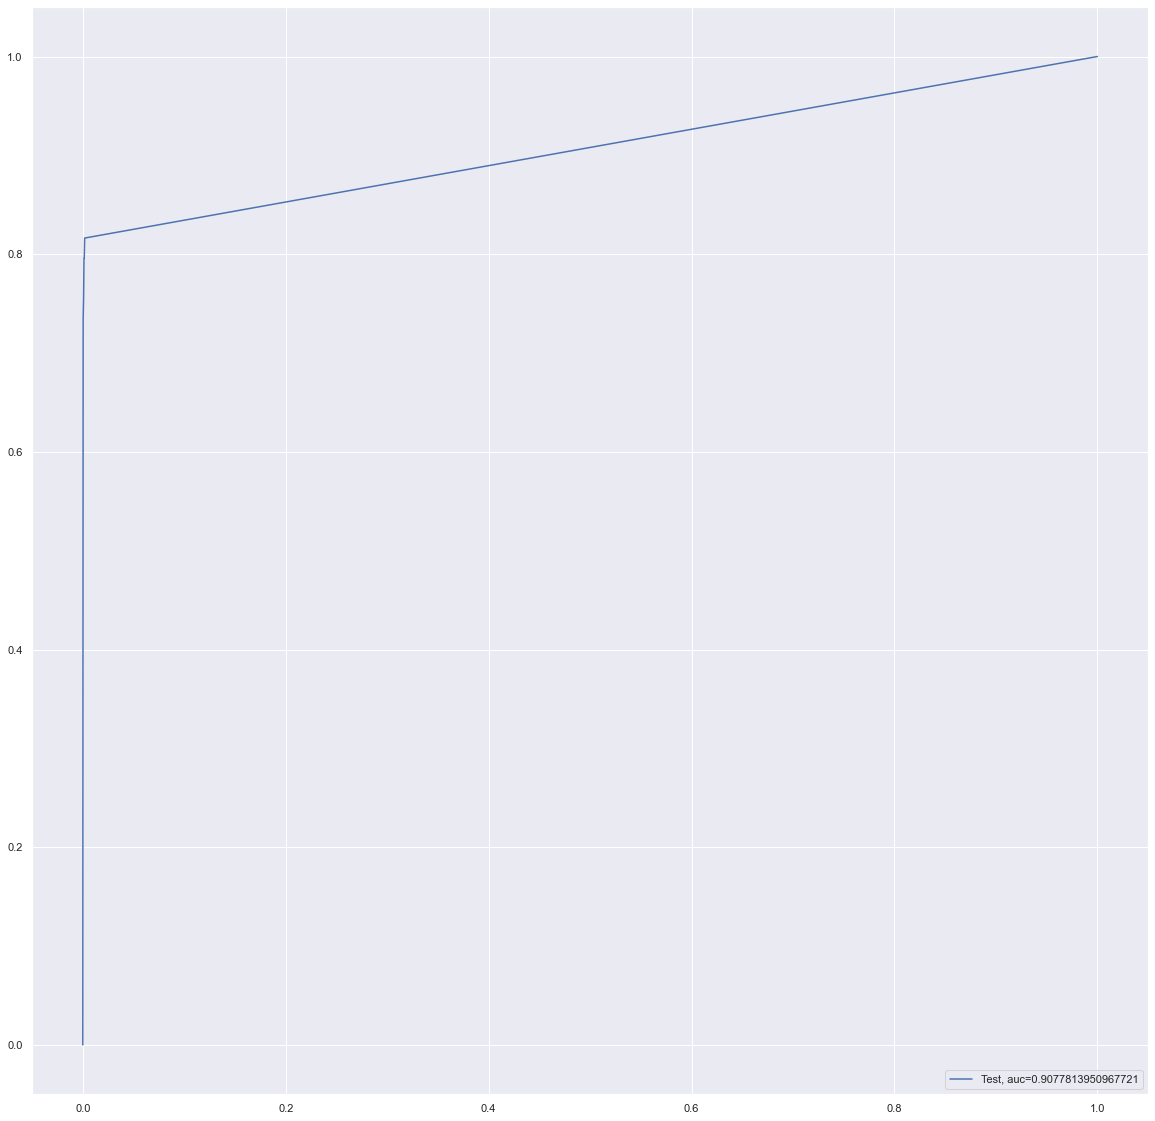

--------------------------------------------------------------------------------
Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9978055160548446
Confusion Matrix


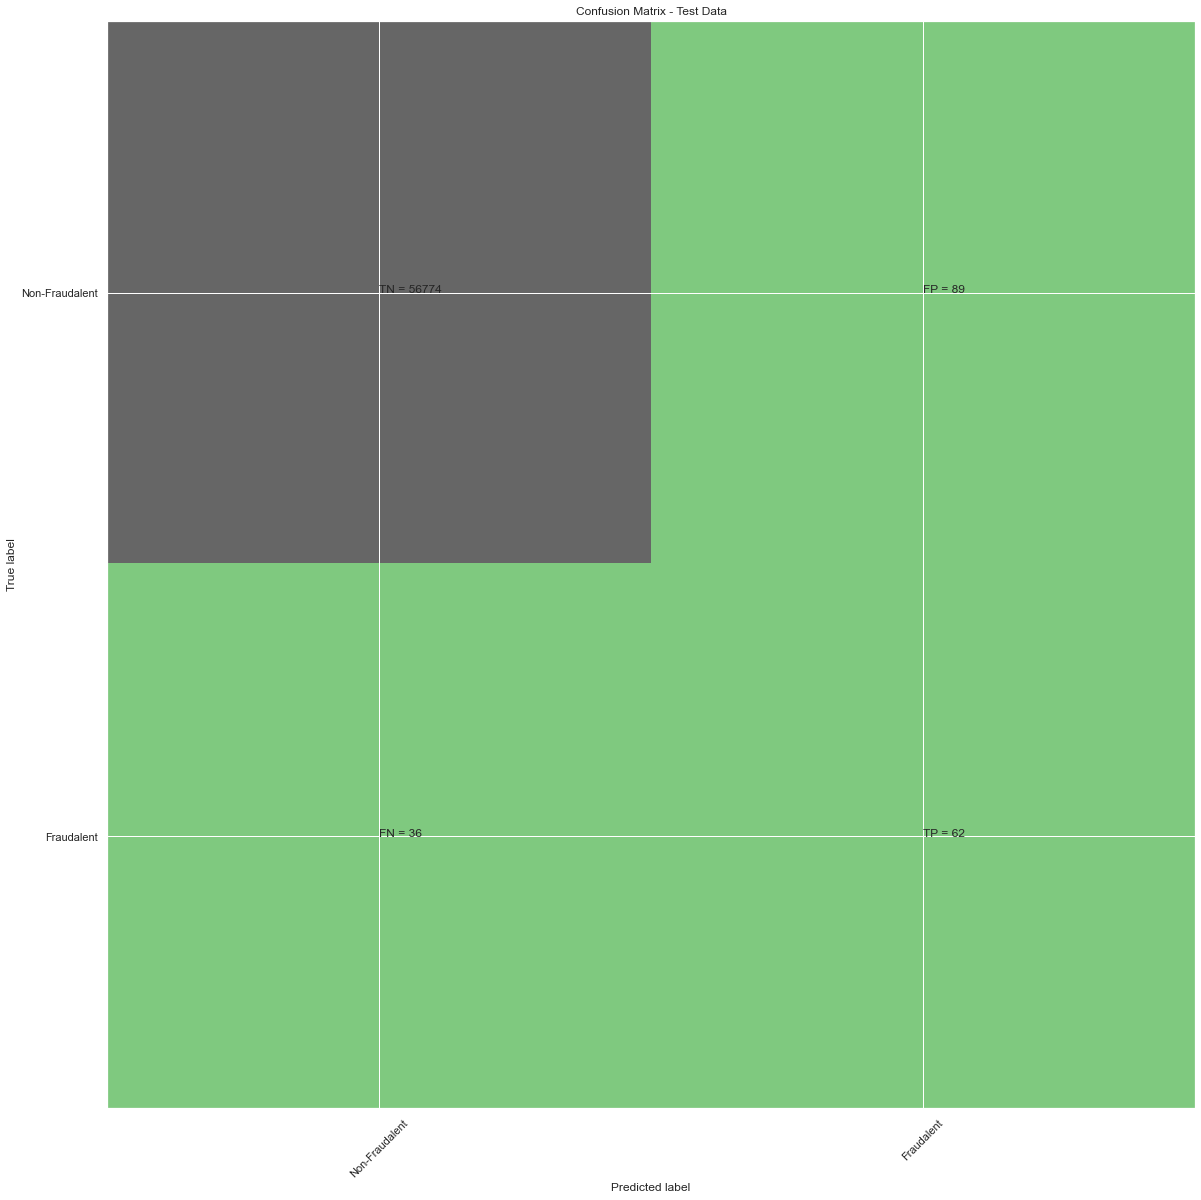

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.63      0.50        98

    accuracy                           1.00     56961
   macro avg       0.70      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8155439479134778
Tree threshold: 1.0
ROC for the test dataset 81.6%


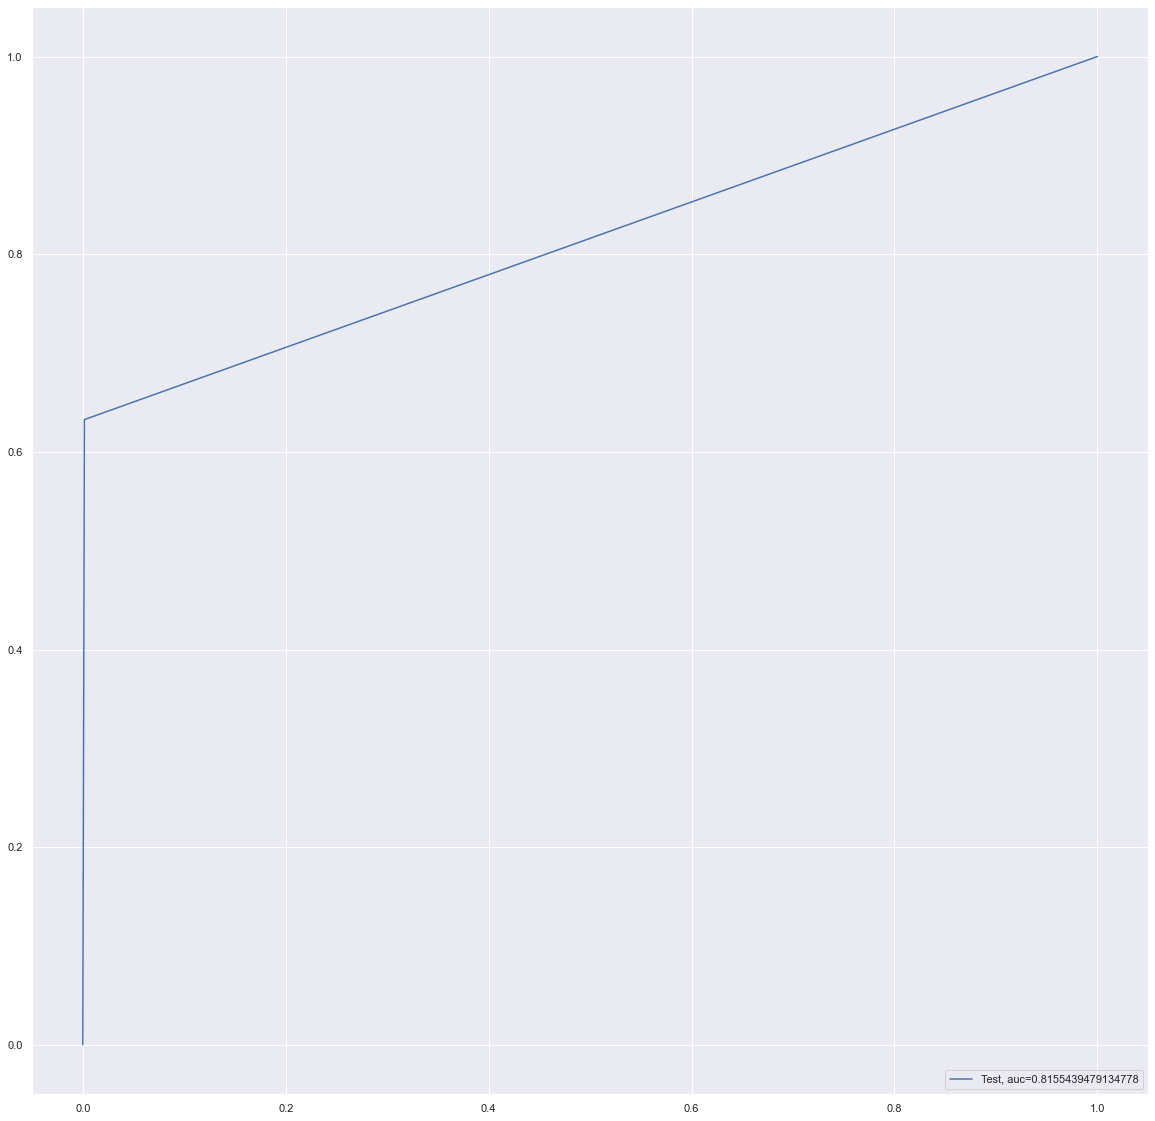

entropy score: 0.9978230719264057
Confusion Matrix


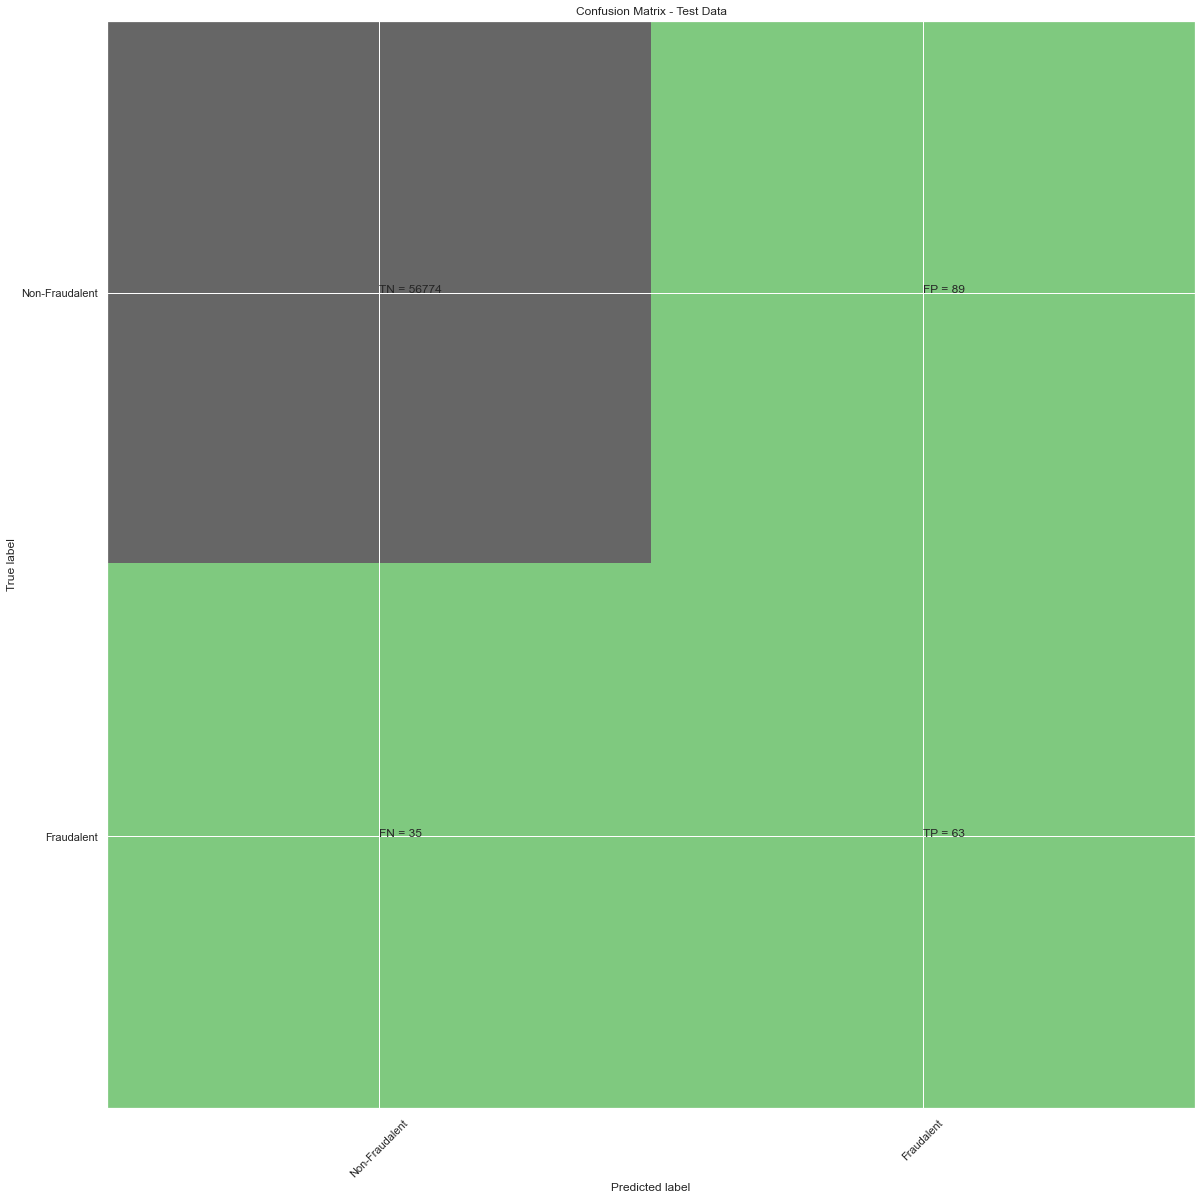

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.64      0.50        98

    accuracy                           1.00     56961
   macro avg       0.71      0.82      0.75     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8206459887298042
Tree threshold: 1.0
ROC for the test dataset 82.1%


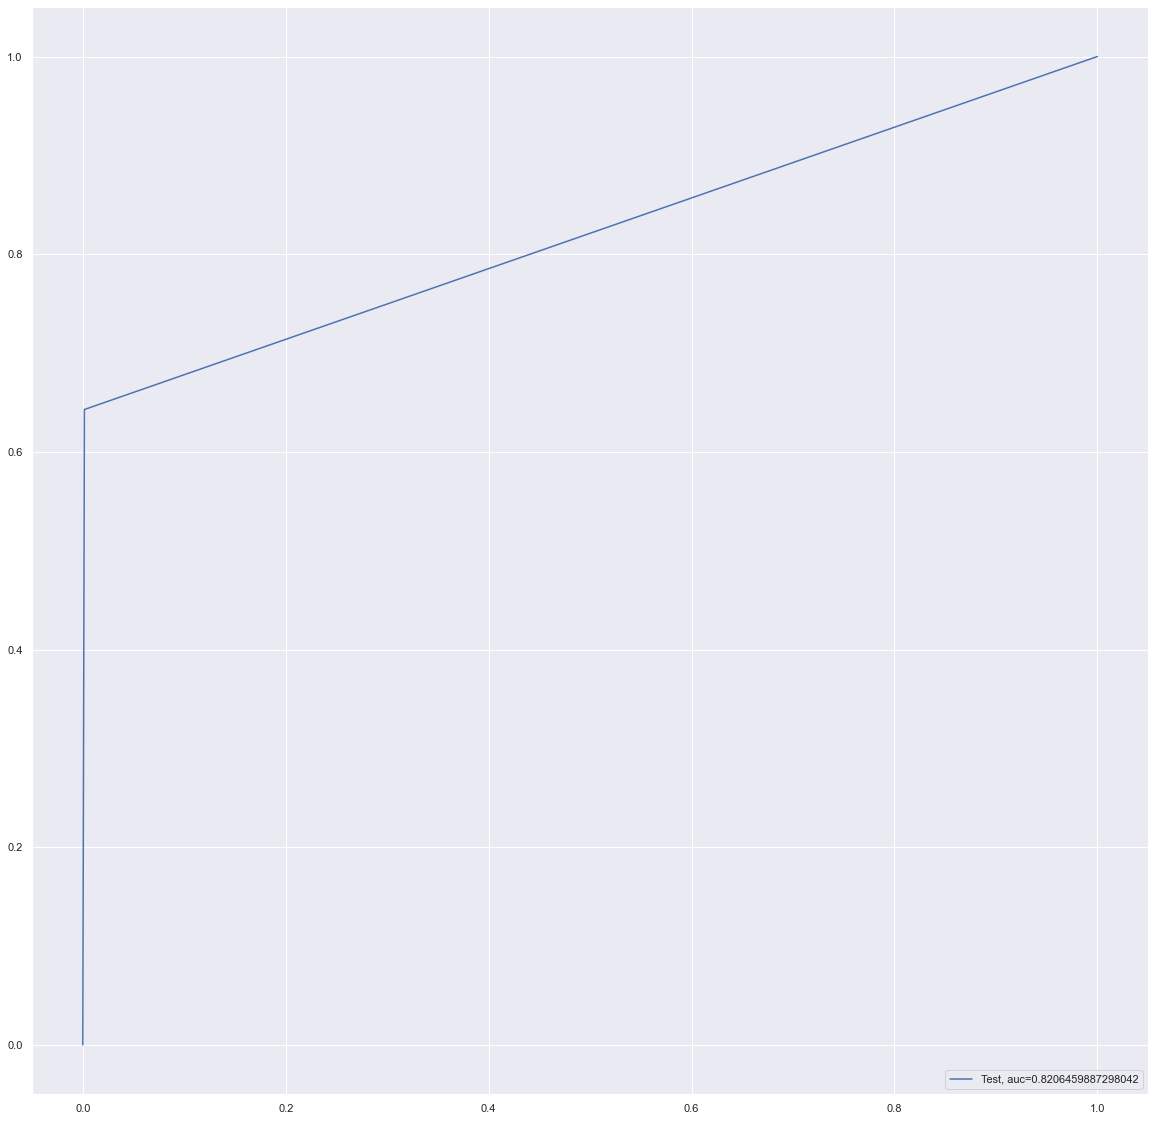

--------------------------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


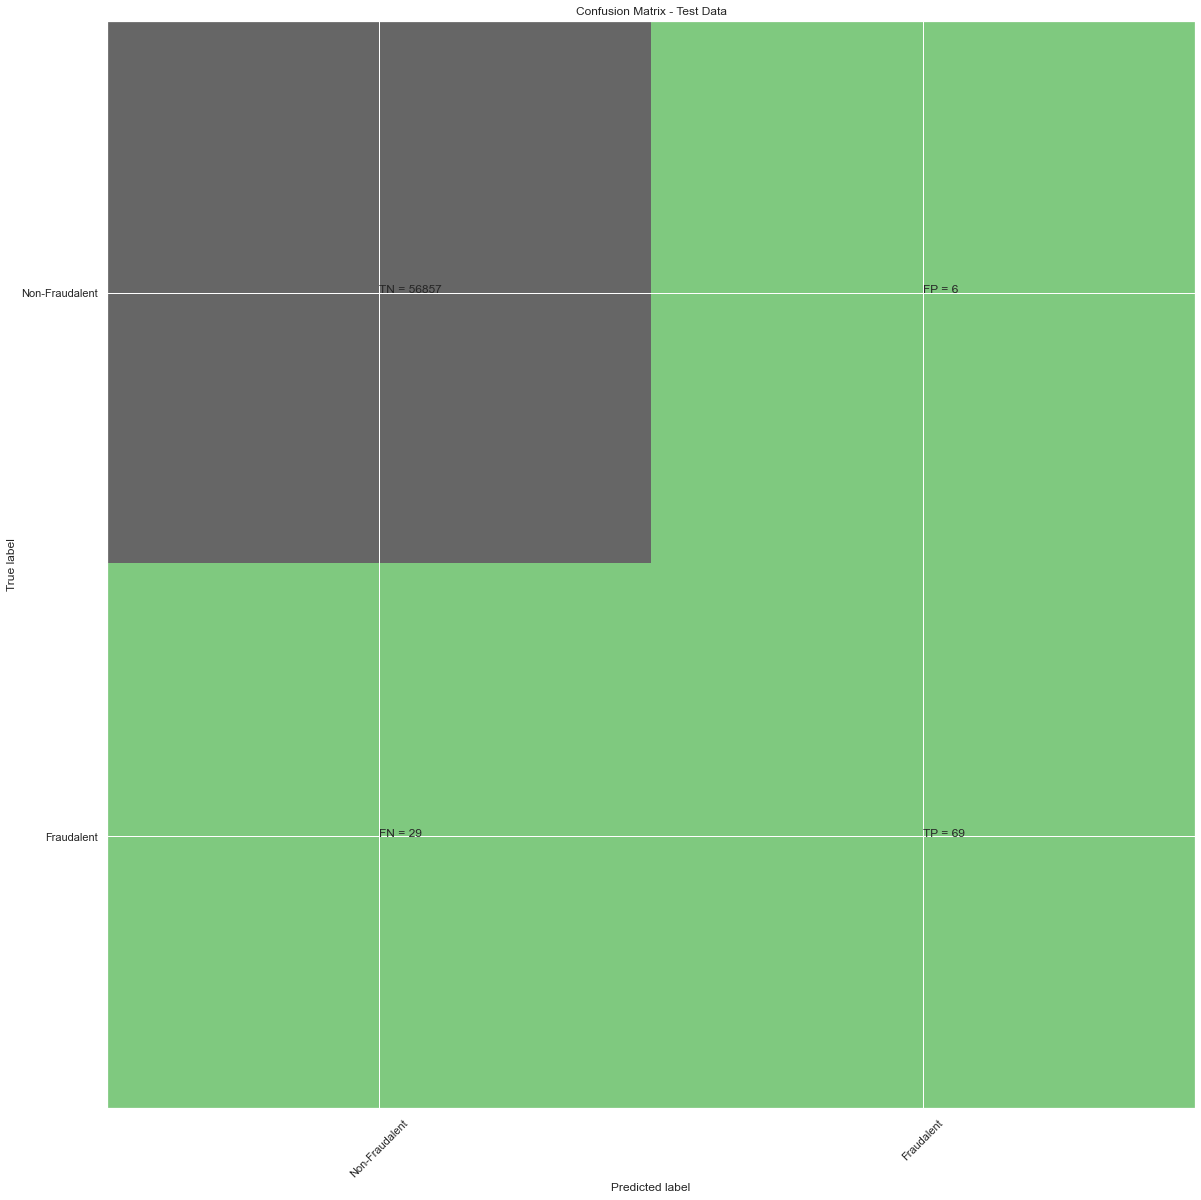

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.92      0.70      0.80        98

    accuracy                           1.00     56961
   macro avg       0.96      0.85      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9423663104339216
Random Forest threshold: 0.03
ROC for the test dataset 94.2%


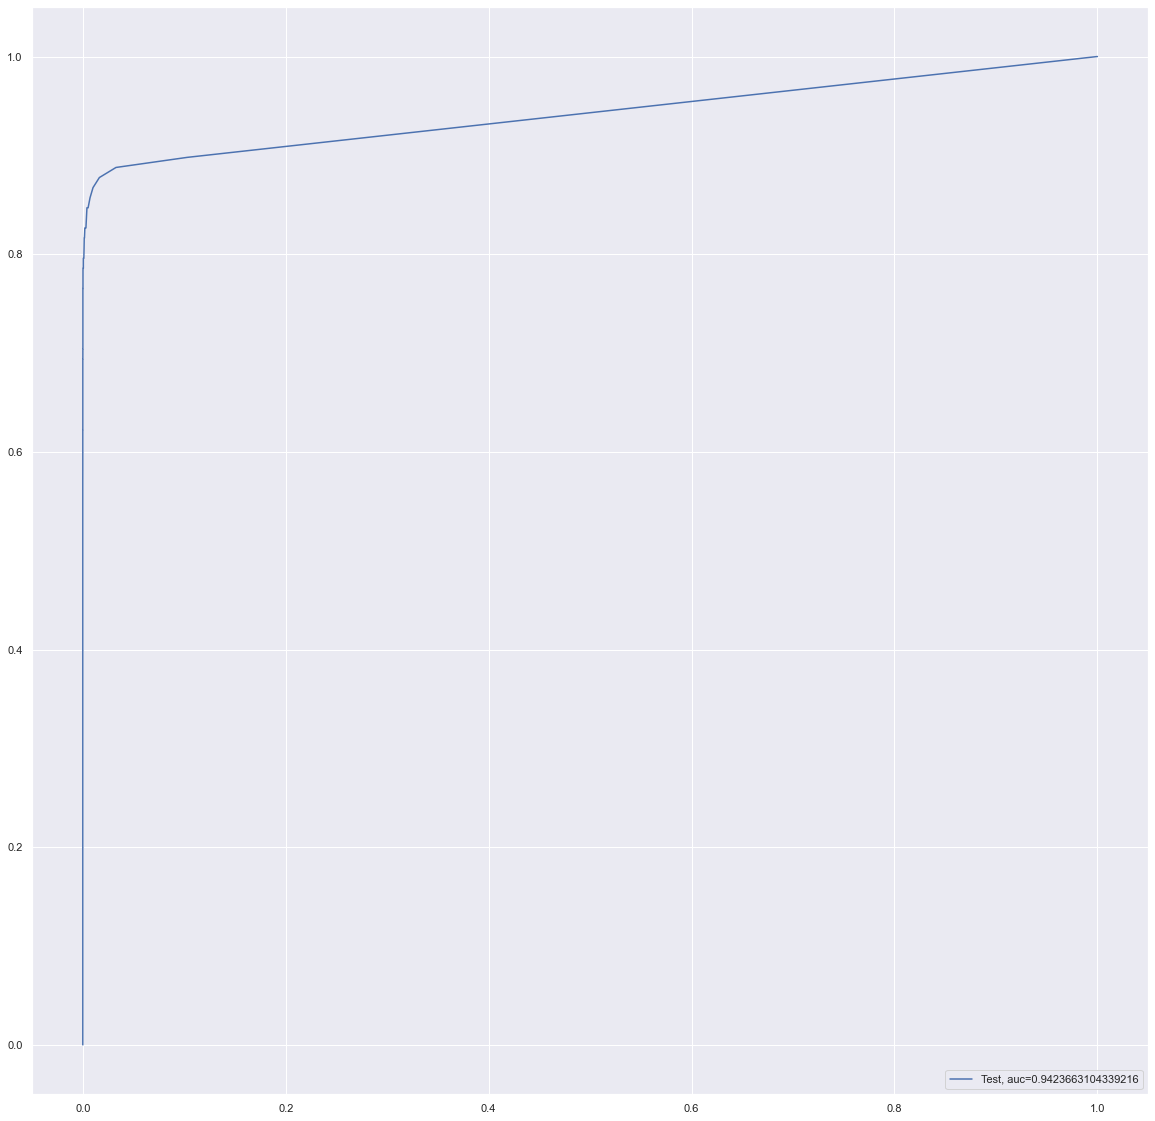

--------------------------------------------------------------------------------
XGBoost Model
[14:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9991573181650603
Confusion Matrix


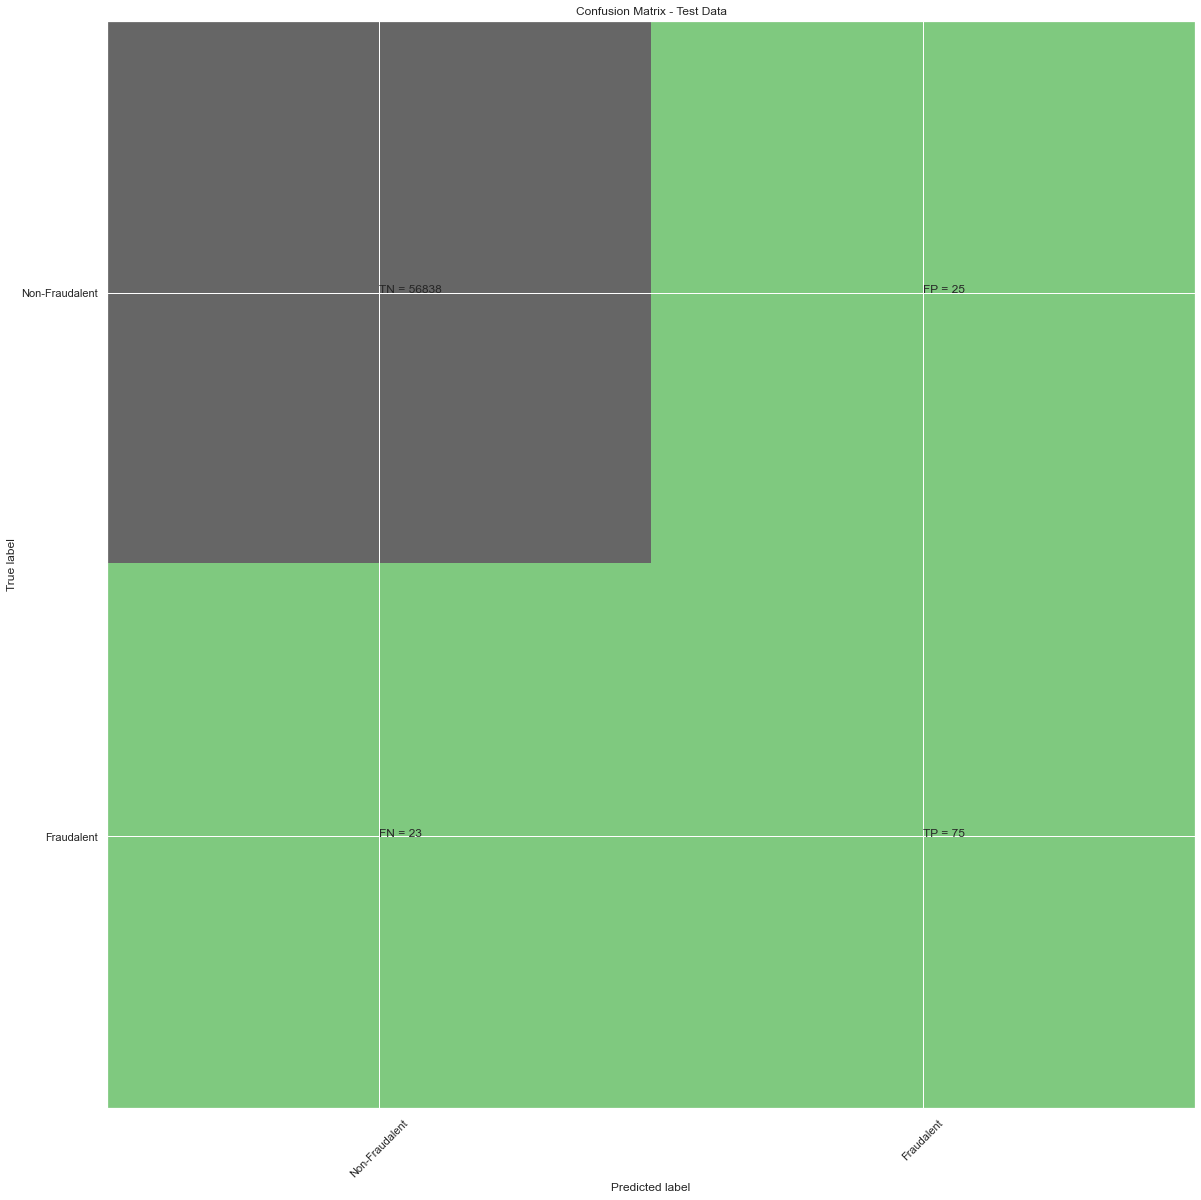

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.77      0.76        98

    accuracy                           1.00     56961
   macro avg       0.87      0.88      0.88     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9660232416832868
XGBoost threshold: 0.0003813733346760273
ROC for the test dataset 96.6%


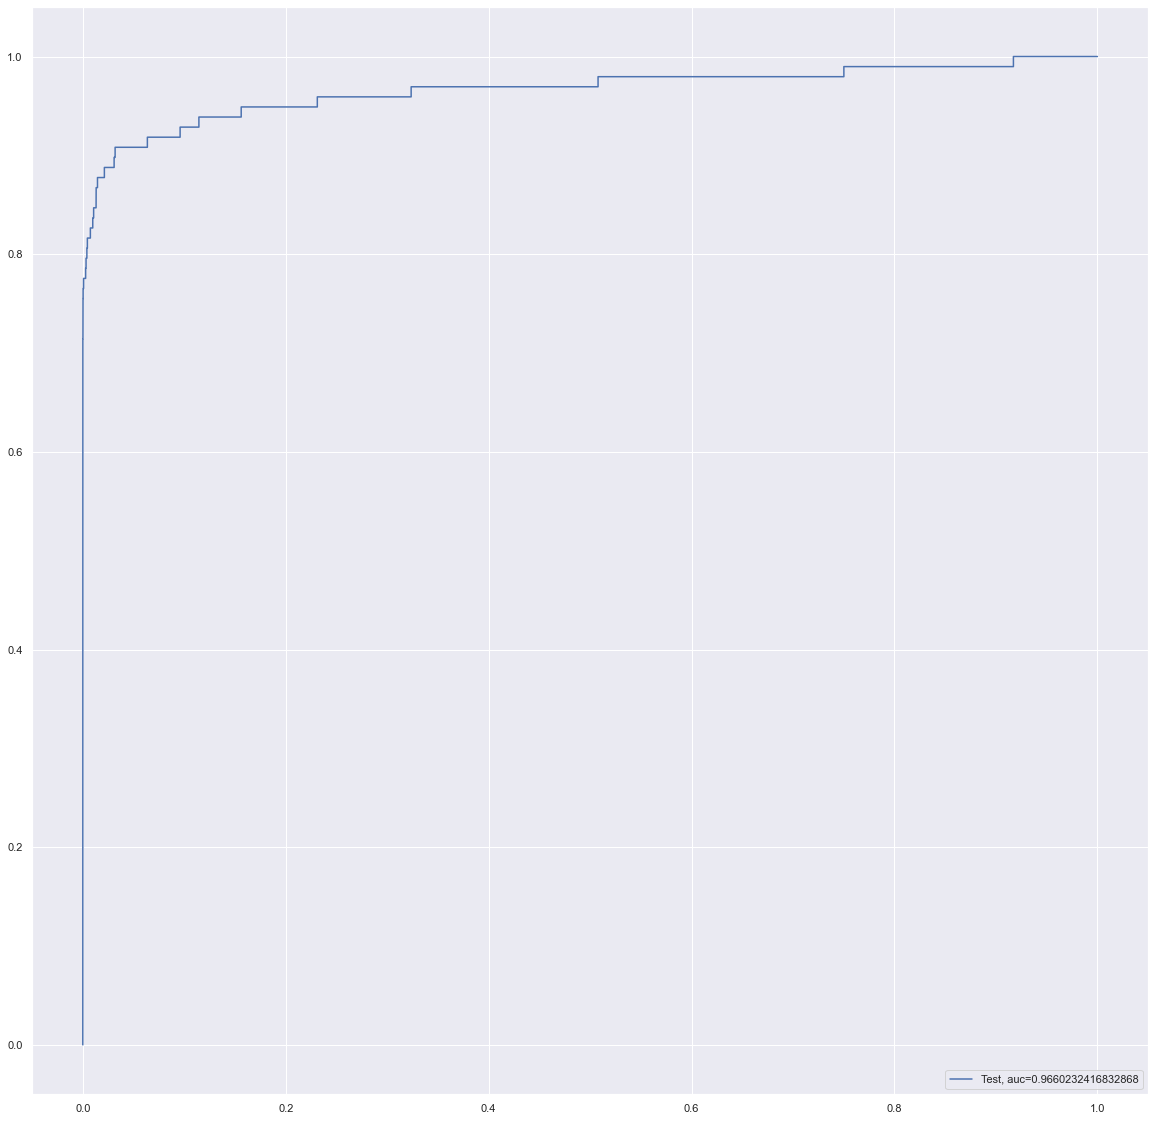

In [127]:

print("KNN Model")
df_Results = KNNModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV ",X_train_ADASYN, y_train_ADASYN , X_test, y_test)

print('-'*80 )

print("Decision Tree Models with  'gini' & 'entropy' criteria")

df_Results = TreeModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV ",X_train_ADASYN, y_train_ADASYN , X_test, y_test)

print('-'*80 )

print("Random Forest Model")
df_Results = RandomForestModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV ",X_train_ADASYN, y_train_ADASYN , X_test, y_test)

print('-'*80 )

print("XGBoost Model")

df_Results = XGBoostModels(df_Results,"ADASYN Oversampling with StratifiedKFold CV ",X_train_ADASYN, y_train_ADASYN , X_test, y_test)


### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [128]:
df_Results

Data_Imbalance_Handiling  \
0                                      imbalance   
1                                      imbalance   
2                                      imbalance   
3                                      imbalance   
4                                      imbalance   
5                                      imbalance   
6                              power Transformer   
7                              power Transformer   
8                              power Transformer   
9                              power Transformer   
10                             power Transformer   
11                             power Transformer   
12  Random Oversampling with StratifiedKFold CV    
13  Random Oversampling with StratifiedKFold CV    
14  Random Oversampling with StratifiedKFold CV    
15  Random Oversampling with StratifiedKFold CV    
16  Random Oversampling with StratifiedKFold CV    
17   smote Oversampling with StratifiedKFold CV    
18   smote Oversampling with StratifiedKFold CV    
19   smote Oversampling with StratifiedKFold CV    
20   smote Oversampling with StratifiedKFold CV    
21   smote Oversampling with StratifiedKFold CV    
22  ADASYN Oversampling with StratifiedKFold CV    
23  ADASYN Oversampling with StratifiedKFold CV    
24  ADASYN Oversampling with StratifiedKFold CV    
25  ADASYN Oversampling with StratifiedKFold CV    
26  ADASYN Oversampling with StratifiedKFold CV    

                               Model  Accuracy  roc_value  threshold  
0                                KNN  0.999649   0.947283   0.200000  
1      Tree Model with gini criteria  0.999298   0.933969   1.000000  
2   Tree Model with entropy criteria  0.999166   0.907631   1.000000  
3                      Random Forest  0.999737   0.959377   0.020000  
4                            XGBoost  0.999693   0.998349   0.000264  
5                                SVM  0.997805   0.750547   0.000992  
6                                KNN  0.999333   0.900839   0.200000  
7      Tree Model with gini criteria  0.998999   0.874710   1.000000  
8   Tree Model with entropy criteria  0.999105   0.864364   1.000000  
9                      Random Forest  0.999350   0.925011   0.010000  
10                           XGBoost  0.999456   0.978537   0.000074  
11                               SVM  0.998578   0.884296   0.001132  
12                               KNN  0.999245   0.882534   0.400000  
13     Tree Model with gini criteria  0.999034   0.811066   1.000000  
14  Tree Model with entropy criteria  0.999070   0.831457   1.000000  
15                     Random Forest  0.999456   0.947172   0.010000  
16                           XGBoost  0.999491   0.977323   0.000026  
17                               KNN  0.998473   0.907790   0.200000  
18     Tree Model with gini criteria  0.997384   0.830613   1.000000  
19  Tree Model with entropy criteria  0.997946   0.866547   1.000000  
20                     Random Forest  0.999421   0.956917   0.030000  
21                           XGBoost  0.999263   0.965169   0.000242  
22                               KNN  0.998473   0.907781   0.200000  
23     Tree Model with gini criteria  0.997806   0.815544   1.000000  
24  Tree Model with entropy criteria  0.997823   0.820646   1.000000  
25                     Random Forest  0.999386   0.942366   0.030000  
26                           XGBoost  0.999157   0.966023   0.000381

## from all the model xgboost performs well on the data

## hypertuning the Xgboost of random oversampling with statifiedKFfold

In [129]:
XGBmodel = XGBClassifier(random_state=42)

In [143]:
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
param_grid = param_test, scoring='roc_auc',n_jobs=4,error_score="raise", cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

[20:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'mean_fit_time': array([ 62.59221649,  62.21995788,  62.2386982 , 102.32133346,
         100.84794693, 329.2357748 , 366.63685732, 135.07065635,
         133.43654675, 157.28707542, 153.306357  , 147.32972565]),
  'std_fit_time': array([3.04857716e-01, 2.28128331e-01, 2.18263046e-01, 7.46220973e-02,
         4.48482348e-01, 2.80431793e+02, 2.79728322e+02, 5.82065854e-01,
         9.22751643e-01, 1.04417800e+00, 8.40616603e-01, 3.42075825e+00]),
  'mean_score_time': array([0.09573874, 0.09154897, 0.09236245, 0.13563795, 0.13443398,
         0.13563972, 0.19229255, 0.19648528, 0.19647927, 0.22221141,
         0.2247921 , 0.2168149 ]),
  'std_score_time': array([0.00294782, 0.00117383, 0.00119822, 0.00109303, 0.00181191,
         0.00141051, 0.00390878, 0.00480253, 0.00451562, 0.00977529,
         0.00723242, 0.00778674]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
            

In [149]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=1, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [150]:
clf.fit(X_over,y_over)

[20:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=4, missing=1,
              monotone_constraints='()', n_estimators=130, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              silent=None, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

In [151]:
XGB_test_score = clf.score(X_test, y_test)

In [152]:
print('Model Accuracy: {0}'.format(XGB_test_score))

Model Accuracy: 0.9994031003669177


In [153]:
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9820655589320124
XGBoost threshold: 0.0029140606056898832


## finally we got amodel with good accuarcy=0.99 and roc =0.98

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 17


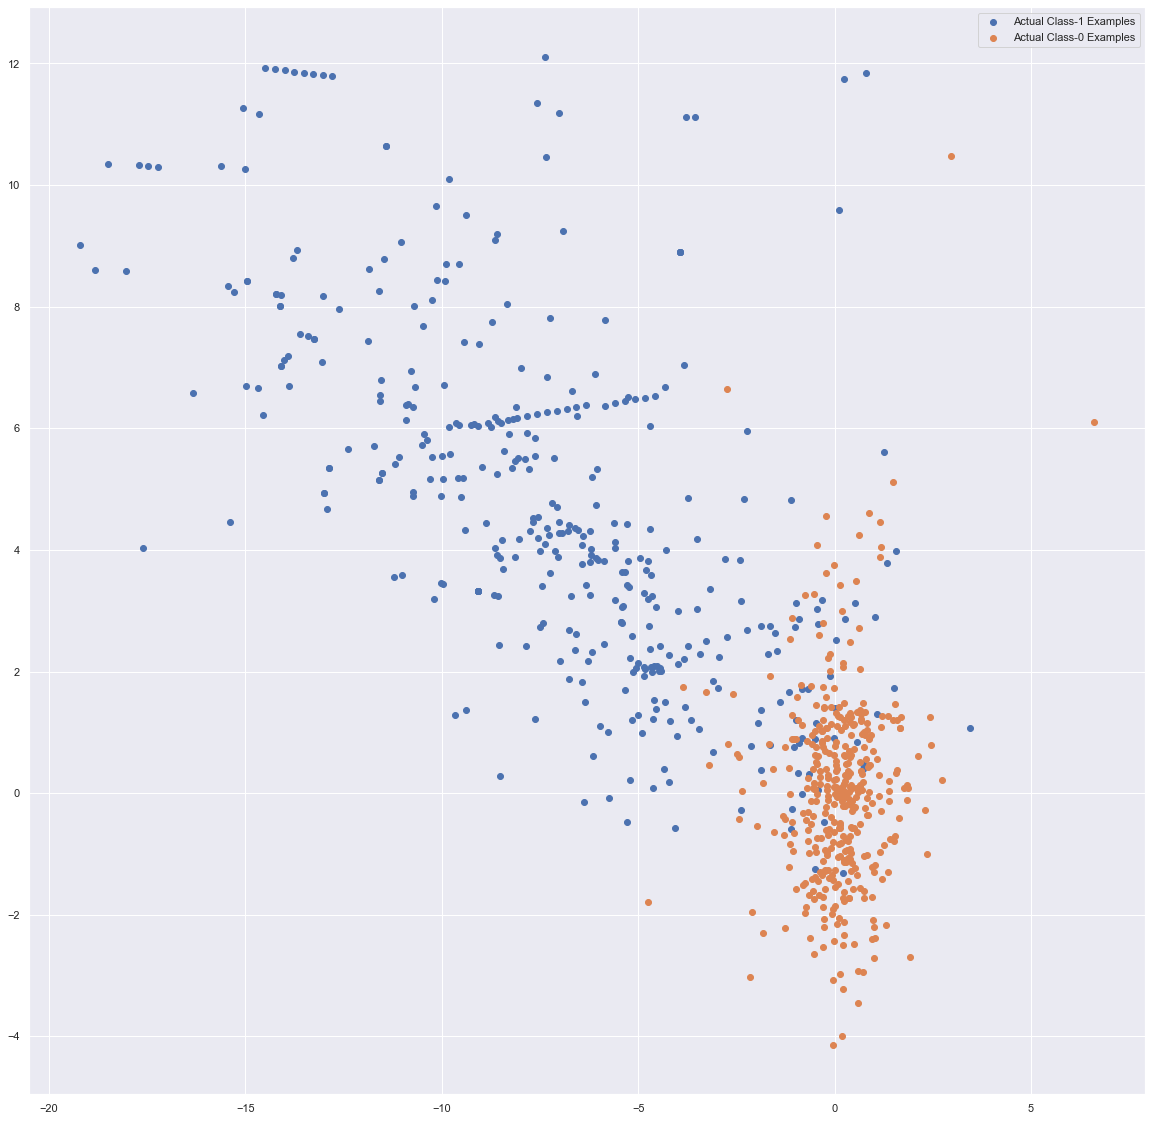

In [154]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()